In [1]:
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
from IPython import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 104data

### 職缺清單

In [3]:
x=pd.read_excel("data/104/(機密)PMO-1732_職缺清單_20200915.xlsx")
x.head(5)

yyyymm  jobno_new degree_request job_area     jobcat   industry  empno  \
0  201501          8             專科      苗栗縣  財務∕會計∕稅務類   軟體及網路相關業     40   
1  201501         12          高中(職)      台北市    客戶服務類人員        保險業  20000   
2  201501         17          高中(職)      新北市    運輸物流類人員      印刷相關業      0   
3  201501         19             專科      新北市    人力資源類人員  機械設備製造修配業     50   
4  201501         20             專科     新竹縣市    工程研發類人員   電信及通訊相關業    100   

            jobname  
0              會計人員  
1  保險行銷人員（提供優質客戶名單）  
2           印刷工務/外務  
3              人資專員  
4           資深機構工程師

In [4]:
x["jobno_new"]=pd.Series(x["jobno_new"], dtype="int64")

### 工作編號-技能編號

In [5]:
x1=pd.read_csv("data/104/(機密)PMO-1732_職務要求技能清單_20200915.csv")
x1.head(5)

jobno_new  careerskill_no
0     178448     11010001003
1    1077544     11010001003
2     303369     11009004001
3     303369     11009004002
4     303369     11009004003

In [6]:
x1["jobno_new"]=pd.Series(x1["jobno_new"], dtype="int64")
x1["careerskill_no"]=pd.Series(x1["careerskill_no"], dtype="int64")

### 技能編號-技能名稱

In [7]:
x2=pd.read_excel("data/104/資策會教育數據應用黑客松合作案schema.xlsx", sheet_name="careerskill_mapping")
x2["careerskill_no"]=pd.Series(x2["careerskill_no"], dtype="int64")
x2.head(5)

careerskill_no      類目名稱
0     11000000000        技能
1     11001002000     招募與徵選
2     11001002002  召募任用制度設計
3     11001002003  執行日常招募業務
4     11001003000     訓練與發展

### 合併上述三表

In [8]:
tt=[]
jj=[]
cc=[]
time_list=set(x["yyyymm"])
for t in time_list:
    df=x[x["yyyymm"]==t]
    cat_list=set(df["jobcat"])
    for c in cat_list:
        df2=df[df["jobcat"]==c]
        count=len(df2)
        tt.append(t)
        jj.append(c)
        cc.append(count)
dfx=pd.DataFrame({"year":tt,"job":jj,"number":cc})

In [9]:
xx=pd.merge(x, x1, on="jobno_new", how="inner")
xx=pd.merge(xx, x2, on="careerskill_no", how="left")

In [10]:
xx.head(100)

yyyymm  jobno_new degree_request job_area     jobcat     industry empno  \
0   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
1   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
2   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
3   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
4   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
5   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
6   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
7   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
8   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
9   201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
10  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
11  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
12  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
13  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
14  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
15  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
16  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
17  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
18  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
19  201501         29             大學     新竹縣市      行銷類人員     軟體及網路相關業     0   
20  201501        119        國中(含)以下      台中市    業務銷售類人員     軟體及網路相關業    10   
21  201501        119        國中(含)以下      台中市    業務銷售類人員     軟體及網路相關業    10   
22  201501        119        國中(含)以下      台中市    業務銷售類人員     軟體及網路相關業    10   
23  201501        243             專科      桃園市   軟體∕工程類人員  電腦及消費性電子製造業     9   
24  201501        243             專科      桃園市   軟體∕工程類人員  電腦及消費性電子製造業     9   
25  201501        276             專科      彰化縣    工程研發類人員     電子零組件相關業     0   
26  201501        276             專科      彰化縣    工程研發類人員     電子零組件相關業     0   
27  201501        279          高中(職)      高雄市    門市營業類人員          零售業    20   
28  201501        279          高中(職)      高雄市    門市營業類人員          零售業    20   
29  201501        279          高中(職)      高雄市    門市營業類人員          零售業    20   
30  201501        279          高中(職)      高雄市    門市營業類人員          零售業    20   
31  201501        279          高中(職)      高雄市    門市營業類人員          零售業    20   
32  201501        279          高中(職)      高雄市    門市營業類人員          零售業    20   
33  201501        323             專科      台北市  財務∕會計∕稅務類          餐飲業   100   
34  201501        402             專科     新竹縣市    營建施作類人員     建築或土木工程業    16   
35  201501        402             專科     新竹縣市    營建施作類人員     建築或土木工程業    16   
36  201601        402             專科     新竹縣市    營建施作類人員     建築或土木工程業    16   
37  201601        402             專科     新竹縣市    營建施作類人員     建築或土木工程業    16   
38  201701        402             專科     新竹縣市    營建施作類人員     建築或土木工程業    16   
39  201701        402             專科     新竹縣市    營建施作類人員     建築或土木工程業    16   
40  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
41  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
42  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
43  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
44  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
45  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
46  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
47  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
48  201501        444             大學      彰化縣  MIS∕網管類人員    電力機械設備製造業   190   
49  201501        444             大學      彰化縣  MIS∕網管類

### 同類別工作技能總匯

In [295]:
tt=[]
jj=[]
ss=[]
time_list=set(xx["yyyymm"])
for t in time_list:
    df=xx[xx["yyyymm"]==t]
    cat_list=set(df["jobcat"])
    for c in cat_list:
        df2=df[df["jobcat"]==c]
        
        skill_list=list(set(df2["類目名稱"]))
        key_skill=[]
        key_skill_nb=[]
        for skill in skill_list:
            n=0
            for j in list(df2["類目名稱"]):
                if j==skill:
                    n+=1
            key_skill.append(skill)
            key_skill_nb.append(n)
            print(skill, n)
        skills=[]
        for i in range(len(key_skill_nb)):
            if key_skill_nb[i]>5:
                skills.append(key_skill[i])
                
        tt.append(t)
        jj.append(c)
        ss.append(",".join(skills))
        
dfx2=pd.DataFrame({"year":tt,"job":jj,"skill":ss})        

景觀研究分析與設計規劃 1
秤量測定與校正 1
設計及使用各種教學媒體 1
業務或通路開發 3
食材貯存管理 1
客戶情報蒐集 3
認識各種烘焙食品 1
專案規劃執行╱範圍管理 3
勞工安全相關法規 1
景觀相關設施維護管理 2
工作安全與環保衛生 1
系統架構規劃與維護 2
市場調查資料分析與報告撰寫 2
繪圖工具與軟體操作 1
熟悉食物性質與營養知識 1
ISO文件發行管理 2
報表彙整與管理 1
素材辨識與處理 1
汽車底盤修護 2
電腦輔助設計軟體操作 1
專案溝通╱整合管理 3
櫃檯門市接待與需求服務 2
烘焙食品作業規範 1
汽車檢驗與品質鑑定 2
冷凍空調工程之規劃施工 1
電話接聽與人員接待事項 2
專案時間╱進度控管 4
日常生活及身體照顧 2
文書處理軟體操作 2
景觀工程管理 1
鑑定藝術品或珠寶品質與價值 1
專案採購管理 2
客戶資料更新維護 2
督導人員工作績效 1
操作控制及故障排除 1
廚房器具使用維護 1
汽車電系修護 2
汽車引擎機件檢查及修護 2
業績與管理報表撰寫 2
所有物或藝術品之鑑估報告 1
文件或資料輸入建檔處理 1
教案╱教材翻譯 1
客訴案件處理 2
企業資源規劃管理(ERP) 4
認識農藝作物 3
種植栽培能力 3
多媒體影像處理 2
食材成本控制 1
鑑定、分類及保存標本 1
文件檔案資料處理、轉換及整合工作 1
專案管理架構及專案說明 2
團體膳食管理 2
申請與執行研究計畫 1
部門績效目標管理 1
協助ISO∕OHSAS與環保相關認證工作 1
檢查及檢驗報告結果判讀 1
食物製前準備 1
網站流量成效追蹤 1
產品介紹及解說銷售 4
文件收發與檔案管理 1
整地作畦與田間管理 4
負責文件更新、發行、審核與跟催作業 1
展場設計規劃 1
初終與入殮服務 1
技術文件翻譯 1
景觀工程施工執行 1
電腦繪圖軟體操作 2
提案與簡報技巧 3
專案人力資源管理 2
專案成本╱品質╱風險管理 2
協商談判能力 3
辦理治喪協調與發喪作業 1
使用者介面設計 1
操作使用各式相機及週邊設備功能 1
行政事務處理 1
設計規劃教材及教具 1
作業系統基本操作 2
撰寫研究報告與論文 1
基本有性╱無性繁殖操作 3
視覺設計相關知識 2
簡報軟體操作 3
廚房設備維護管理 1
活動會場佈置 2
協助家務處理 3
數位攝

廣告企劃案╱文案撰寫 1
部門人力成本控制 4
倉庫貨物標示╱置放╱盤點 1
土木建築工程圖判讀 1
韌體程式設計 151
專案管理架構及專案說明 24
公關活動規劃與執行 1
部門績效目標管理 4
工作任務╱業績項目分配 12
規劃與管理入侵防護系統（IPS） 3
媒體動畫應用設計諮詢 2
產業分析與財務評估的能力 1
MES工廠執行系統規劃管理 25
測試環境建置規劃 48
高程測量 1
系統維護操作 169
建築圖識圖與繪圖 1
網站流量成效追蹤 3
無線通訊模組測試 8
電控╱感測迴路裝配 1
產品介紹及解說銷售 3
製作規格說明書 1
結構化程式設計 131
PCB產品認證作業 1
光學模擬分析作業 1
金融產品風險評估 2
規劃、維護自動控制系統 2
資料庫程式設計 468
文件收發與檔案管理 3
壓力測試(stress test) 42
業績目標達成 2
電子設備操作簡修 1
問題追蹤處理(Bug tracking) 127
網路資料傳輸 77
模擬類比IC電路 1
系統整合分析 337
負責文件更新、發行、審核與跟催作業 5
光學元件檢測儀器設計 1
網路架設佈線 4
專利申請之事前調查分析 1
多媒體簡報製作 2
安裝與維護網路安全系統 25
實體活動規劃與執行 2
專案成本╱品質╱風險管理 23
專案人力資源管理 14
整合無線通訊模組 6
流程圖軟體操作 33
提案與簡報技巧 4
電腦繪圖軟體操作 2
文件管理中心之建立與維護 1
數位電路分析設計 4
自動化設備∕系統介面之維護改善 5
協商談判能力 3
光電工程技術開發 1
產品規格書編制管理 1
主機板相關零件控制 2
培育人員職涯發展 2
數位通訊技術訊號處理 7
使用者介面設計 21
基礎數位電路 4
了解全球租稅規定 1
電子圖表繪製 1
統計軟體操作 2
結帳作業與帳務處理 2
網路應用軟體操作 29
軟體品質與保證 141
類比IC電路設計 2
調查樣本統計分析 1
有線電視工程架設 1
食品加工相關知識 1
信號與系統設計 8
動畫程式撰寫 5
新產品檢驗 1
行銷策略擬定 2
產品生產製程規劃及工時估算 1
平面設計理論 1
軟硬體設備預算與採買規劃 9
行政事務處理 5
設計規劃教材及教具 1
軟體工程系統開發 586
作業系統基本操作 143
產品諮詢與服務 1
BIOS

技術文件翻譯 3
消防相關法規 1
文件管理中心之建立與維護 13
吧台前置作業準備 1
高分子材料設計與合成 2
繪製電腦相關配圖 1
光電工程技術開發 1
工程估驗與計價 1
培育人員職涯發展 2
統計軟體操作 2
工程施工監督管理 3
產品諮詢與服務 3
監工日報表填寫 3
制定與管理部門各類績效指標 1
光學系統測試分析 2
簡報軟體操作 6
產品機構設計 1
國際貿易基本概念 1
工程驗收資料管理 6
軟硬體設備成本控制 2
混凝土驗收作業 2
PCB樣品測試檢驗 1
資料備份與復原 2
化學製程研發 2
尺寸測量 2
玻璃器具裝配與操作 4
食品包裝作業 2
新技術製程開發 1
系統架構規劃 1
協助產線自動化系統推展 2
PCB Layout軟體操作 2
商品調撥作業 1
秤量測定與校正 7
混凝土作業工具使用 1
資料庫軟體應用 2
機械零組件使用 1
機械相關圖表繪製 1
系統架構規劃與維護 1
金屬管裝置及配線 1
標準作業流程規劃 8
藥物分析與生藥學 3
自動化系統設計整合 1
食品研發技術 6
建立標準生產流程 7
報表彙整與管理 4
專案溝通╱整合管理 13
客戶服務品保程序規劃 76
資訊設備操作檢修 1
產品模具開發設計 1
文書處理軟體操作 29
零用金管理 1
會議╱談判即時口譯 3
工程材料之研究與分析 1
電動機操作使用 1
文件或資料輸入建檔處理 8
擬定各項安全衛生管理辦法 1
使用者測試(Usability test) 29
試藥配製作業 5
設計機台設備自動化 1
新產品封裝導入及封裝良率改善 1
高頻電路產品故障分析 2
工廠設備設計與改善 1
機電儀表工具使用 1
提供化學工程技術服務 1
認識農藝作物 1
產品驗證作業 136
規劃測試機台運作流程與排程 12
生產程序改良與開發 2
混凝土品質管制 1
土木建築工程圖判讀 1
教育訓練總體規劃與績效評估 1
工作任務╱業績項目分配 6
電腦圖示辨認 5
協助ISO∕OHSAS與環保相關認證工作 20
提昇設備產能稼動率與生產效率 3
改善及預防衛生品質與環境污染 3
製作規格說明書 2
光學模擬分析作業 1
壓力測試(stress test) 25
網路資料傳輸 1
化學檢測儀器操作 21
負責生產製程管制與調配 2
專案成本╱品質╱風險管理 10
專案人力資源

微機電系統設計 4
建立產品專利地圖及專利資料庫 1
協助改善產品良率 18
安裝與維護網路安全系統 2
高頻電路產品管控 3
技術文件翻譯 6
文件管理中心之建立與維護 3
機務維修保養 14
光學設備採購作業 2
高分子材料設計與合成 2
繪製電腦相關配圖 52
光電工程技術開發 16
工程估驗與計價 2
電源供應器檢驗 2
色彩調配設計 1
產品外型設計 8
工程施工監督管理 11
有線電視工程架設 1
結構體工程執行 2
產品諮詢與服務 9
監工日報表填寫 2
硬體系統研發設計 77
光學系統測試分析 16
IC版圖佈局佈線 17
產品機構設計 81
簡報軟體操作 4
國際貿易基本概念 1
工程驗收資料管理 4
軟硬體設備成本控制 13
PCB樣品測試檢驗 41
金屬建材組立預裝 3
資料備份與復原 2
化學製程研發 3
尺寸測量 1
承辦商計價 2
BIOS程式研發 1
網路規劃管理 4
微機電製程研發 3
新技術製程開發 13
高介電材料與金屬閘極整合 1
系統架構規劃 3
協助產線自動化系統推展 10
PCB Layout軟體操作 108
動力系統操作與維護 2
網路配線工具使用 1
熟悉化學工程原理 3
建築工地與外牆清理 1
類比IC電路驗證 8
網路安全架構分析與設計 1
客戶情報蒐集 2
資料庫軟體應用 7
機械零組件使用 16
機械相關圖表繪製 49
廠商樣品管理建檔 1
系統架構規劃與維護 1
模板檢視作業 1
標準作業流程規劃 13
車床∕銑床維護及調整校正 7
自動化系統設計整合 34
負責空調和機電設備系統異常處理 9
建立標準生產流程 14
報表彙整與管理 2
模組化系統設計 3
專案溝通╱整合管理 24
客戶服務品保程序規劃 1
品牌知名度推廣 1
國內外專利申請相關業務處理 1
資訊設備操作檢修 5
產品模具開發設計 25
文書處理軟體操作 20
微電腦軟體設計 2
客戶資料更新維護 1
電動機操作使用 5
汽車電系修護 5
文件或資料輸入建檔處理 3
準備及操作車床∕銑床 7
使用者測試(Usability test) 7
試藥配製作業 1
類比電路設計 20
設計機台設備自動化 44
裝修工程圖識圖 1
CNC加工機及相關機械操作 14
高頻電路產品故障分析 2
新產品封裝導入及封裝良率改善 2
工廠設備設計與改善 18
機

生產程序改良與開發 11
土木建築工程圖判讀 1
CIS企畫設計 2
教育訓練總體規劃與績效評估 3
工作任務╱業績項目分配 91
市場供應資訊蒐集評估分析 8
電腦圖示辨認 1
MES工廠執行系統規劃管理 1
擬訂教學計畫 2
房屋租賃仲介服務 12
估算生產裝設工料量價 1
廣告預算控管 16
問卷設計 11
網路資料傳輸 1
化學檢測儀器操作 2
電信設備安裝 1
團體旅遊業務銷售 22
食材選購採買 1
建物測量 1
執行影片拍攝作業 3
辦理貸款業務的能力 1
編製帳務報表 5
美髮機器與器具使用 1
電腦印前設計 1
專案成本╱品質╱風險管理 32
專案人力資源管理 4
電腦繪圖軟體操作 12
新產品導入的材料評核與確認 1
現場測量 1
熟悉文件管制作業程序（DCC） 4
產品規格書編制管理 1
運送費用報價與收費 3
工程現況描繪 1
色彩應用繪製 2
建立並推動法務規章制度 1
貸款專業諮詢服務 1
軟硬體設備預算與採買規劃 2
房屋買賣仲介服務 19
資料庫系統管理維護 1
交通工程規劃與設計 1
車輛清潔保管與檢修 1
執行藥物管理業務 1
活動會場佈置 2
倉儲系統維護與管理 2
業績目標分配與績效達成 994
服裝配搭技巧 1
電子儀表設備測試 1
不動產分析與資料蒐集 12
廣告業務銷售能力 312
材料識別與應用 1
熟悉包裝材料與結構 1
移交清冊製作 1
電腦設備裝配 8
代擬契約、簡單申請狀、仲介土地業務 1
用人管理 2
理貨╱揀貨╱補貨作業 3
健康問題之護理評估 3
社區維安事件處理與協調 1
商品調撥作業 3
硬體整合測試 1
職涯探索 1
盤點作業規劃執行 1
設計表現能力 1
展場設計監工 1
危機與議題管理 16
業務或通路開發 38
食材貯存管理 46
客戶情報蒐集 255
認識各種烘焙食品 6
勞工安全相關法規 2
專案規劃執行╱範圍管理 44
美髮業經營概念 1
顧客關係管理 35
眼部彩妝設計 10
市場調查資料分析與報告撰寫 3
系統架構規劃與維護 1
臉部輪廓彩妝設計 6
財務報表製作 1
管理服務中心作業 1
貨品報廢處理 2
簽收╱驗收作業 2
繪圖工具與軟體操作 8
熟悉食物性質與營養知識 5
食品研發技術 1
報表彙整與管理 28
熟悉進出口業務 1
功能測試(function test) 1
規

烘焙食品包裝 1
規劃並執行品質管理系統 3
非金屬管裝置及配線 2
系統整合分析 2
生產工作日誌建檔管理 41
執行產品可靠度測試與問題分析 4
金屬或珠寶飾品焊接作業 2
協助改善產品良率 20
機務維修保養 39
繪製電腦相關配圖 3
工程估驗與計價 1
培育人員職涯發展 1
色彩調配設計 1
產品外型設計 1
工程施工監督管理 1
鋁合金外殼表面整修與拋光 4
結構體工程執行 3
產品諮詢與服務 1
監工日報表填寫 1
撰寫研究報告與論文 1
簡報軟體操作 1
產品機構設計 1
塗裝作業 8
PCB樣品測試檢驗 2
景觀工程水電系統管理 1
農業機械修護技術 1
尺寸測量 2
新技術製程開發 7
協助產線自動化系統推展 8
網路配線工具使用 1
動力系統操作與維護 2
PCB Layout軟體操作 2
熟悉化學工程原理 4
商品調撥作業 1
客戶情報蒐集 6
機械零組件使用 33
機械相關圖表繪製 4
金屬管裝置及配線 3
標準作業流程規劃 6
簽收╱驗收作業 1
車床∕銑床維護及調整校正 46
自動化系統設計整合 3
負責空調和機電設備系統異常處理 7
建立標準生產流程 10
報表彙整與管理 2
模板檢視 2
商品採購作業 1
專案溝通╱整合管理 2
污水處理設施操作維護相關法規 1
產品模具開發設計 9
文書處理軟體操作 15
各式禮服款式之開版及打樣 1
客戶資料更新維護 6
電動機操作使用 6
汽車電系修護 1
文件或資料輸入建檔處理 2
準備及操作車床∕銑床 27
使用者測試(Usability test) 1
設計機台設備自動化 7
裝修工程圖識圖 1
CNC加工機及相關機械操作 78
工廠設備設計與改善 6
機電儀表工具使用 9
電機設備研發 3
提供化學工程技術服務 1
產品驗證作業 7
規劃測試機台運作流程與排程 1
鍋爐設備保存 3
生產程序改良與開發 2
工作任務╱業績項目分配 8
市場供應資訊蒐集評估分析 1
電腦圖示辨認 5
協助ISO∕OHSAS與環保相關認證工作 1
申請室內裝修圖說審核作業 1
提昇設備產能稼動率與生產效率 8
面材舖貼作業 1
調整與維修視訊∕音訊器材 1
改善及預防衛生品質與環境污染 1
製作規格說明書 1
估算生產裝設工料量價 2
規劃、維護自動控制系統 8
蒸氣及熱媒系統之維護管理 1
化學檢測儀器操

提出生產標準改良方案 28
日常檢查及異常狀況初步研判 27
模具維修及保養作業 2
產品量產導入計劃 4
繪圖工具與軟體操作 1
產品或零件測試驗證 5
建立標準生產流程 28
ISO文件發行管理 2
負責空調和機電設備系統異常處理 2
半導體材料良率分析 1
PCB電路板設計 1
漏電保護裝置使用 2
車床∕銑床維護及調整校正 4
功能測試(function test) 2
測試計劃及測試報告書撰寫 6
素材辨識與處理 1
生產成本控制 16
模組化系統設計 1
電機設備設計開發 9
商品採購作業 1
電腦輔助設計軟體操作 5
專案溝通╱整合管理 6
客戶服務品保程序規劃 2
網路系統配置 1
冷凍空調工程之規劃施工 2
通訊工程技術開發 1
韌體整合測試 2
投資評估報告撰寫 1
基礎類比電路 3
專案時間╱進度控管 1
資訊設備操作檢修 3
統籌工廠之生產排程、交期及產量 1
電子產品技術轉移作業 3
產品模具開發設計 3
文書處理軟體操作 7
半導體元件設計製作 2
微電腦軟體設計 1
設備器材使用及維護 12
督導人員工作績效 4
操作控制及故障排除 30
電動機操作使用 3
產品開發預算與成本控管 2
五金配件使用 1
廚房器具使用維護 1
網路程式設計 2
研究、評估與建立封裝工程技術 6
電機設備保養修護 21
化學實驗室管理 2
金屬╱非金屬管裝置及配線 1
建立╱維護零件資料庫 2
硬體工程技術開發 2
測量儀器之檢驗與校正 4
準備及操作車床∕銑床 1
使用者測試(Usability test) 1
生產設備維護管理 6
配電裝修技能 3
母材加工及組合 1
提出製程計畫與產能分配掌握 14
機械加工設備之維護保養 7
機械產品╱材料測試 1
安排出貨管理及統計 3
試藥配製作業 1
試產∕量產時的產品異常分析改善 31
設計機台設備自動化 45
整理分析生產紀錄報告 19
供應商評鑑與開發 1
CNC加工機及相關機械操作 5
資訊設備環境設定 4
新產品封裝導入及封裝良率改善 9
PCB機台操作設定與維修 6
工程分包管理 1
電子儀表工具使用 10
撰寫IC電路佈局軟體 1
工廠設備設計與改善 31
改善設備問題及功能提昇 41
電路板測試 1
機電儀表工具使用 9
企業資源規劃管理(ERP) 2
電機設備研發 6
化學分析能力 8
提供

電動機及電氣相關知識 1
數位電路驗證 1
材料識別與應用 4
移交清冊製作 4
櫥窗設計規劃 5
植生工程規劃與執行 1
景觀研究分析與設計規劃 4
硬體整合測試 1
自動化機構裝配 1
設計表現能力 288
盤點作業規劃執行 1
展場設計監工 25
水文與水理分析 1
設計及使用各種教學媒體 1
業務或通路開發 10
資料庫軟體應用 3
客戶情報蒐集 1
專案規劃執行╱範圍管理 7
工程圖識圖與繪圖 10
工程標單估算 2
機械相關圖表繪製 2
製作工程樣品與管理 1
顧客關係管理 6
產品估價作業 1
資料通訊與網路應用 1
市場調查資料分析與報告撰寫 4
系統架構規劃與維護 1
男女鞋製配底樣板縫製 2
財務報表製作 1
產品操作文件製作 3
施工圖與裝配圖繪製 7
發包標單製作 1
金屬管裝置及配線 1
標準作業流程規劃 1
繪圖軟體安裝設定 50
網頁語法撰寫 133
提出生產標準改良方案 1
產品量產導入計劃 2
繪圖工具與軟體操作 471
研討會∕講座活動規劃與執行 4
ISO文件發行管理 2
產品或零件測試驗證 1
建立標準生產流程 2
報表彙整與管理 6
工程放樣 1
電繡技術 1
功能測試(function test) 2
素材辨識與處理 139
生產成本控制 2
行銷宣傳預算編製與控管 3
商品採購作業 1
電腦輔助設計軟體操作 62
專案溝通╱整合管理 8
櫃檯門市接待與需求服務 6
網路系統配置 3
網路系統危機管理 1
電話接聽與人員接待事項 6
網站企劃能力 46
品牌知名度推廣 27
專案時間╱進度控管 5
資訊設備操作檢修 4
產品模具開發設計 1
文書處理軟體操作 32
景觀工程管理 2
專案採購管理 1
零用金管理 2
平面測量 1
行銷工具設計開發 18
客戶資料更新維護 8
各式禮服款式之開版及打樣 3
插畫表現技巧 196
督導人員工作績效 1
工程材料之研究與分析 1
產品開發預算與成本控管 4
網路程式設計 16
繪製變壓器工程圖 2
產品包裝設計 236
文件或資料輸入建檔處理 10
基礎潔膚╱卸妝技巧 1
品牌行銷管理 30
使用者測試(Usability test) 6
水利工程設計 1
櫥窗視覺陳列 49
安排出貨管理及統計 2
竣工圖說製作 3
試產∕量產時的產品異常分析改善 1
裝修工程圖識圖 3
發包圖

技術文件翻譯 8
消防相關法規 2
文件管理中心之建立與維護 3
吧台前置作業準備 14
社區安全業務行政工作 3
審核年度預算 2
培育人員職涯發展 41
職務分析與職等設計 8
防火管理對策 1
大廈管理顧客服務 6
稅務規劃與稅報╱納稅事項 2
面試技巧 15
商業信用狀分析 1
保全相關法令 2
環保資源回收作業 1
制定與管理部門各類績效指標 19
會計管理╱調查 2
IC版圖佈局佈線 1
簡報軟體操作 9
國際貿易基本概念 9
貨物出口通關處理 1
總務管理制度與實施總務工作計畫 3
內稽內控制度設計、執行、考核 10
資料備份與復原 1
核閱財務報表 6
覆核報表作業流程 3
員工教育訓練與需求分析 24
進出口報關管理 2
財務規劃與投資管理 4
食品包裝作業 1
網路規劃管理 1
不動產投資應用能力 1
協助產線自動化系統推展 3
排盤與食品裝飾 9
認識各種烘焙食品 1
客戶情報蒐集 18
半導體產業市場分析 1
機械相關圖表繪製 3
市場調查資料分析與報告撰寫 9
工作安全與環保衛生 1
保險相關法規 1
標準作業流程規劃 10
自動化系統設計整合 1
運輸路線規劃管理 2
建立標準生產流程 6
報表彙整與管理 35
專案溝通╱整合管理 56
客戶服務品保程序規劃 1
稅務業務處理 2
網站企劃能力 10
品牌知名度推廣 7
保單健診與節稅規劃 1
資訊設備操作檢修 1
文書處理軟體操作 12
進出口相關法令 1
零用金管理 4
執行日常招募業務 20
會議╱談判即時口譯 9
客戶資料更新維護 18
會計或審計專業知識 3
汽車電系修護 1
文件或資料輸入建檔處理 20
擬訂住戶規約 4
代辦會計相關事項 1
火災類型辨識 1
新產品封裝導入及封裝良率改善 1
工廠設備設計與改善 6
營造業相關法規 1
停車場管理與交通指揮 1
電機設備研發 1
所得稅結算申報 3
產品驗證作業 3
廣告效益評估 3
廣告企劃案╱文案撰寫 12
CIS企畫設計 1
教育訓練總體規劃與績效評估 14
工作任務╱業績項目分配 104
市場供應資訊蒐集評估分析 1
護理指導及諮詢 2
協助ISO∕OHSAS與環保相關認證工作 2
提昇設備產能稼動率與生產效率 3
擬訂教學計畫 3
製作規格說明書 1
廣告預算控管 2
水系統消防安全設備 1
問卷設計 1
網路資料傳

設計表現能力 2
盤點作業規劃執行 1
商品進貨入庫作業 1
危機與議題管理 2
庶務採購管理與策略規劃 2
業務或通路開發 18
食材貯存管理 1
客戶情報蒐集 8
專案規劃執行╱範圍管理 29
顧客關係管理 18
眼部彩妝設計 1
行程規劃業務 1
資料通訊與網路應用 1
市場調查資料分析與報告撰寫 36
系統架構規劃與維護 1
臉部輪廓彩妝設計 1
合約或備忘錄內容審查檢驗 1
財務報表製作 1
產品操作文件製作 2
產品量產導入計劃 1
繪圖軟體安裝設定 1
儀器設備需求分析 1
繪圖工具與軟體操作 4
研討會∕講座活動規劃與執行 10
食品研發技術 2
熟悉食物性質與營養知識 2
ISO文件發行管理 1
報表彙整與管理 2
PCB電路板設計 1
熟悉進出口業務 1
功能測試(function test) 2
規劃與監督營養食譜作業 2
生產成本控制 1
行銷宣傳預算編製與控管 15
食品原料蒐集分析 2
講座╱研討會即時口譯 1
商品採購作業 2
公關議題與危機處理 4
專案溝通╱整合管理 27
櫃檯門市接待與需求服務 1
財產信託理論與實務 1
影視節目現場副控與指揮 1
財富管理規劃諮詢 1
電話接聽與人員接待事項 2
網站企劃能力 35
品牌知名度推廣 21
專案時間╱進度控管 26
文書處理軟體操作 7
美容器材使用 1
專案採購管理 5
客戶資料更新維護 8
會議╱談判即時口譯 1
督導人員工作績效 5
指導智慧財產權管理作業進行 1
產品開發預算與成本控管 38
節目內容包裝與規劃製作 9
廚房器具使用維護 1
產品包裝設計 2
業績與管理報表撰寫 6
電源供應器設計 1
文件或資料輸入建檔處理 2
基礎潔膚╱卸妝技巧 1
品牌行銷管理 34
教案╱教材翻譯 1
使用者測試(Usability test) 4
生產設備維護管理 2
產物與財產保險業務 1
安排出貨管理及統計 2
食品衛生保健 3
客訴案件處理 3
臉部保養技巧 1
搜集與分析侵犯企業智慧財產權證據 1
訪員教育訓練 2
美容業經營概念 1
辨識髮型操作圖 1
電機設備研發 1
提供化學工程技術服務 1
規劃、組織、指導及協調組織內部行政作業 1
人身保險代理與經紀業務 1
各式男裝∕女裝之開版及打樣 1
傳播媒體採購規劃 9
多媒體影像處理 4
食材成本控制 1
產品驗證作業 

使用者介面設計 1
統計軟體操作 1
調查樣本統計分析 1
標準鑑定量具使用及維護 1
食品加工相關知識 4
動畫程式撰寫 1
產品生產製程規劃及工時估算 58
鋼構工作圖識圖及繪圖 1
行政事務處理 10
產品材料分析 1
作業系統基本操作 4
產品進銷存統計分析 3
生產線設計規劃 2
建立並推動工作經驗知識庫 1
零件供應商評鑑考核 2
吊車∕起重機設備操作與指揮 2
貿易單據製作 1
人力規劃控管 1
國際貿易基本概念 3
簡報軟體操作 3
原物料管理系統建立 1
財務策略建議與分析 1
PCB零件庫管理 1
總務管理制度與實施總務工作計畫 1
業績目標分配與績效達成 1
PCB樣品測試檢驗 1
制訂新產品檢驗標準 6
電源供應器裝設 1
員工教育訓練與需求分析 1
進料商品開發 1
工程管理-品質管理 1
食品包裝作業 1
製程相關技術開發 2
熟悉包裝材料與結構 16
新技術製程開發 8
用人管理 1
協助產線自動化系統推展 32
化工反應工程作業 1
PCB Layout軟體操作 1
文書處理╱排版能力 8
熟悉化學工程原理 1
業務或通路開發 1
資料庫軟體應用 2
客戶情報蒐集 1
專案規劃執行╱範圍管理 5
顧客關係管理 1
市場調查資料分析與報告撰寫 5
財務報表製作 1
儀器設備需求分析 1
繪圖工具與軟體操作 1
研討會∕講座活動規劃與執行 3
進行教學成果評量 4
報表彙整與管理 2
具備財金專業知識 1
專案溝通╱整合管理 4
電話接聽與人員接待事項 2
專案時間╱進度控管 5
文書處理軟體操作 10
專案採購管理 1
行銷工具設計開發 1
化學實驗室管理 3
業績與管理報表撰寫 1
文件或資料輸入建檔處理 3
測量儀器之檢驗與校正 1
品牌行銷管理 1
用電相關法規 2
生產設備維護管理 1
採購並維護辦公事物及庶務用品 1
訪員教育訓練 1
進行身心功能及障礙程度評估 1
化學分析能力 3
預算編製與成本控管 1
電腦排版設計 1
水生生物認識 1
專案管理軟體操作 1
文件檔案資料處理、轉換及整合工作 2
管理行事曆與會議協調安排 1
檢查、評估及診斷各種生理殘障 1
生產程序改良與開發 1
財務報表分析 1
工作說明書撰寫 1
專案管理架構及專案說明 2
申請與執行研究計畫 7
財務及營業分析 1
護理指導及諮詢 1
檢查及檢驗

編制財務報告 174
建築工地物料管理 1
盤點作業規劃執行 2
商品進貨入庫作業 1
庶務採購管理與策略規劃 6
危機與議題管理 1
食材貯存管理 1
資料庫軟體應用 1
客戶情報蒐集 1
專案規劃執行╱範圍管理 9
勞工安全相關法規 2
匯率利率分析預測 1
設計網路安全系統 1
市場調查資料分析與報告撰寫 2
系統架構規劃與維護 1
工作安全與環保衛生 1
合約或備忘錄內容審查檢驗 1
財務報表製作 365
執行安全衛生督導及稽核 2
金融市場分析與資料蒐集 1
管理服務中心作業 1
發包標單製作 1
資產移轉∕盤點管理規劃 2
標準作業流程規劃 1
工廠管理能力 1
繪圖工具與軟體操作 3
稅收及買賣契約相關事項 31
ISO文件發行管理 5
呈核稽核報告 67
輸入資料與原始文件檔案比對審核 5
報表彙整與管理 62
熟悉進出口業務 5
工程計畫書製作 1
生產成本控制 2
行銷宣傳預算編製與控管 1
執行辦理工商登記案件服務 2
商品採購作業 1
規劃檢討會計作業流程 151
公關議題與危機處理 1
專案溝通╱整合管理 8
櫃檯門市接待與需求服務 10
稅務業務處理 265
網路系統危機管理 1
電話接聽與人員接待事項 56
分析管理會計資訊 232
網站企劃能力 1
帳務查核與會計稽查 183
投資評估報告撰寫 5
專案時間╱進度控管 4
文書處理軟體操作 34
專案採購管理 1
零用金管理 56
薪資與績效獎酬辦法設計 4
執行日常招募業務 5
客戶資料更新維護 3
督導人員工作績效 6
進出口貨物查驗 1
庫存管理規劃作業 1
會計或審計專業知識 306
檢驗各項文件之法律效力 1
產品包裝設計 1
業績與管理報表撰寫 2
文件或資料輸入建檔處理 65
股務作業實務與工具運用 1
擬定各項安全衛生管理辦法 1
商品收貨╱退貨作業 2
賣場∕門市商圈經營 1
安排出貨管理及統計 1
資金管理 157
客訴案件處理 6
標單製作與管理 1
代辦會計相關事項 332
工程分包管理 1
採購並維護辦公事物及庶務用品 22
企業資源規劃管理(ERP) 5
檔案管理之電腦化策略 1
安全設施維護保養 1
規劃、組織、指導及協調組織內部行政作業 4
所得稅結算申報 240
多媒體影像處理 1
食材成本控制 2
規劃與管理防火牆 1
採購談判與議價技巧 8
賣場∕

養殖水質檢測 1
危機與議題管理 1
商品收貨╱退貨作業 1
景觀相關設施維護管理 2
動物解剖生理常識 2
牧場經營管理 1
基本有性╱無性繁殖操作 2
業績目標達成 1
動物繁殖常識 2
整地作畦與田間管理 3
工廠管理能力 2
檔案管理之電腦化策略 1
負責文件更新、發行、審核與跟催作業 1
簽收╱驗收作業 1
ISO文件發行管理 1
收穫與調製相關知識 1
認識農藝作物 3
禽畜保健衛生 4
種植栽培能力 4
寵物保健衛生常識 1
動物流行病學及比較醫學研究 2
禽畜繁殖相關知識 4
營養與飼料相關知識 4
動物保健衛生常識 3
寵物身體清潔與修整 1
原料及產品品質管制監控 2
協商談判能力 1
統籌工廠之生產排程、交期及產量 1
寵物造型設計 1
實驗室管理規劃 1
寵物的飼養常識 1
認識養殖禁藥 2
文書處理軟體操作 1
景觀工程管理 1
督導人員工作績效 1
文書處理╱排版能力 1
注射預防及動物保健 4
部門績效目標管理 1
工作任務╱業績項目分配 1
執行動物人工受精作業 1
倉管流程訂定與管理 1
硬體整合測試 17
網路設備儀錶使用 9
辦理各國護照及簽證業務 1
通訊工作安全 7
網路符號辨認 5
網路安全架構分析與設計 86
業務或通路開發 1
資料庫軟體應用 100
客戶情報蒐集 3
專案規劃執行╱範圍管理 7
顧客關係管理 2
設計網路安全系統 76
行程規劃業務 1
資料通訊與網路應用 28
系統架構規劃與維護 192
財務報表製作 1
繪製電信線路圖 1
電機設備測試 1
網頁語法撰寫 8
設計導入製造執行系統（MES） 3
自動化系統設計整合 2
進行教學成果評量 1
ISO文件發行管理 2
呈核稽核報告 1
測試計劃及測試報告書撰寫 22
功能測試(function test) 61
行銷宣傳預算編製與控管 1
模組化系統設計 8
商品採購作業 1
電腦輔助設計軟體操作 2
專案溝通╱整合管理 9
網路系統配置 183
通訊工程技術開發 2
稅務業務處理 1
韌體整合測試 1
網路系統危機管理 97
分析管理會計資訊 2
網站企劃能力 2
品牌知名度推廣 1
專案時間╱進度控管 4
資訊設備操作檢修 288
電子產品技術轉移作業 1
文書處理軟體操作 105
專案採購管理 1
BIOS程式偵錯與維護 1
行銷工具設計開發 1

部門績效目標管理 2
工作任務╱業績項目分配 2
電腦圖示辨認 2
協助ISO∕OHSAS與環保相關認證工作 17
土木工程養護 5
工程預算編製與控理 30
鍋爐設備運轉操作 1
纜線障礙查測 1
申請室內裝修圖說審核作業 1
高程測量 7
蒐集電機設備產品資訊 5
工程管理 130
面材舖貼作業 5
系統維護操作 1
建築圖識圖與繪圖 23
金屬建材螺栓接合 3
調整與維修視訊∕音訊器材 3
化學系統消防安全設備 2
改善及預防衛生品質與環境污染 17
電控╱感測迴路裝配 1
電工儀表裝置使用 4
水系統消防安全設備 4
工地行政相關報表製作 80
規劃督導安全衛生設施之檢點與檢查 17
電子設備操作簡修 2
非金屬管裝置及配線 1
土木工程調查規劃與設計 5
電信設備安裝 2
基礎土木工程應用 22
建物測量 1
水電相關圖表繪製 15
網路架設佈線 2
電力工程裝修與控制 14
建築計畫與設計 3
結構工程調查 1
結構工程規劃與設計 2
景觀工程施工執行 6
專案人力資源管理 2
專案成本╱品質╱風險管理 2
流程圖軟體操作 1
電腦繪圖軟體操作 1
土方工程作業 19
機務維修保養 3
測量及繪圖儀器之保養與維護 1
土地複丈 1
現場測量 15
繪製電腦相關配圖 3
協商談判能力 1
工程估驗與計價 68
供應商尋找及評選執行 1
土木工程施工與監造 126
防火管理對策 2
室內設計規劃 2
工程協調與問題處理 147
工程施工監督管理 119
工程現況描繪 15
有線電視工程架設 1
導線槽裝置及配線 5
信號與系統設計 1
室內設計成本預估 7
行銷策略擬定 1
室內設計施工圖繪製 8
申請空污、廢水、廢棄物等許可證 10
鋼構工作圖識圖及繪圖 5
結構體工程執行 14
行銷製作物規劃與執行 1
作業系統基本操作 2
銲接施工與銲道檢測 1
意外事故防範與急救 1
監工日報表填寫 101
結構設計說明書製作 1
警報系統消防安全設備 3
機電與消防系統規劃 9
標單審核作業 17
廢棄物管理與申報處理 16
工程驗收資料管理 60
坡地工程施作 1
電信設備儀表工具使用 1
電動機及電氣相關知識 12
電子產品系統測試 1
金屬建材組立預裝 6
尺度標註與測量 2
景觀工程水電系統管理 3
泥作工程施工管理 5
尺寸測量 1
伺服器網站管理維護 

職涯探索 15
設計表現能力 1
庶務採購管理與策略規劃 6
危機與議題管理 4
設計及使用各種教學媒體 4
業務或通路開發 4
執行法律行為及文書之認證 1
客戶情報蒐集 3
勞工安全相關法規 73
專案規劃執行╱範圍管理 12
顧客關係管理 4
共同防火管理作業 1
行程規劃業務 1
市場調查資料分析與報告撰寫 1
工作安全與環保衛生 1
合約或備忘錄內容審查檢驗 2
財務報表製作 1
保險相關法規 4
資產移轉∕盤點管理規劃 1
研討會∕講座活動規劃與執行 8
進行教學成果評量 8
ISO文件發行管理 1
輸入資料與原始文件檔案比對審核 2
報表彙整與管理 103
其它求職轉職相關 14
功能測試(function test) 1
商品採購作業 1
公關議題與危機處理 1
薪資談判 38
專案溝通╱整合管理 9
結團作業處理事項 1
稅務業務處理 1
櫃檯門市接待與需求服務 1
電話接聽與人員接待事項 49
專案時間╱進度控管 11
文書處理軟體操作 12
進出口相關法令 1
專案採購管理 1
零用金管理 8
薪資與績效獎酬辦法設計 101
執行日常招募業務 207
客戶資料更新維護 8
會議╱談判即時口譯 2
督導人員工作績效 10
擔任獨奏與樂器演奏 1
檢驗各項文件之法律效力 1
業績與管理報表撰寫 4
文件或資料輸入建檔處理 65
品牌行銷管理 1
教案╱教材翻譯 4
使用者測試(Usability test) 1
人員培訓、激勵、輔導與管理 176
賣場∕門市商圈經營 1
交通安全相關法律 1
電子化企業資源規劃執行 2
資金管理 2
客訴案件處理 6
代辦會計相關事項 2
採購並維護辦公事物及庶務用品 8
訪員教育訓練 2
企業資源規劃管理(ERP) 2
檔案管理之電腦化策略 3
美容業經營概念 1
身體保養技巧 1
SPA護理知識 1
法律相關條文諮詢服務 1
規劃、組織、指導及協調組織內部行政作業 10
所得稅結算申報 1
公共衛生相關法規 20
賣場∕門市營運計畫與管理 1
採購談判與議價技巧 3
預算編製與成本控管 7
電腦排版設計 2
追蹤及審閱合約流程 2
股務作業法規 1
設備維護與營繕工程規劃 1
文件檔案資料處理、轉換及整合工作 70
監督廠務工程的配置、測試及安裝 1
管理行事曆與會議協調安排 42
部門人力成本控制 11
工作

職務分析與職等設計 1
企業風險管理 2
結帳作業與帳務處理 15
基本按摩手法 1
色彩應用繪製 1
面試技巧 3
各式封面設計 1
行銷策略擬定 7
行政事務處理 18
行銷製作物規劃與執行 8
廣告創意發想與提案 1
作業系統基本操作 2
產品進銷存統計分析 10
社區安寧維護作業 6
國外業務開發 4
公關新聞稿撰寫與報導 3
警報系統消防安全設備 1
資料庫系統管理維護 1
麵包食品製作 3
緊急事件危機處理 68
規劃與執行安全衛生教育訓練 2
人力規劃控管 5
視覺設計相關知識 1
簡報軟體操作 3
廚房設備維護管理 35
數位攝影技巧 3
領隊帶團技巧 36
業績目標分配與績效達成 22
社群媒體經營管理 2
市場調查企劃與執行 5
內稽內控制度設計、執行、考核 1
廣告製作規劃與執行 2
資料備份與復原 1
核閱財務報表 2
覆核報表作業流程 2
員工教育訓練與需求分析 6
伺服器網站管理維護 2
多媒體企劃設計 2
廣告業務銷售能力 10
材料識別與應用 1
電子試算表軟體操作 1
烘焙食品品質判定 3
電腦設備裝配 1
資產管理制度與流程規劃 1
具備人力資源相關知識 1
門市餐飲管理 143
電機設備採購 1
用人管理 6
文書處理╱排版能力 8
建築物與週邊物清潔 1
排盤與食品裝飾 31
向政府機關申請土地相關資料 3
草擬法令及政府法規 2
業務或通路開發 2
執行法律行為及文書之認證 22
不動產經紀營業 1
勞工安全相關法規 6
建築許可申請 1
執行法律文件及契約撰寫 44
合約或備忘錄內容審查檢驗 35
水土保持法規 1
保險相關法規 4
法律理論、原理及其相關特殊法律研究 15
電信相關法規 2
輸入資料與原始文件檔案比對審核 1
報表彙整與管理 9
執行辦理工商登記案件服務 6
建築相關法令 1
污水處理設施操作維護相關法規 1
電話接聽與人員接待事項 1
帳務查核與會計稽查 1
國內外專利申請相關業務處理 23
專案時間╱進度控管 1
不動產相關法規 4
進出口相關法令 3
文書處理軟體操作 5
執行日常招募業務 1
指導智慧財產權管理作業進行 7
營建業相關法令 1
代理土地登記與移轉變更等業務 3
檢驗各項文件之法律效力 31
文件或資料輸入建檔處理 10
人員培訓、激勵、輔導與管理 1
交通安全相關法律 1
處理並完

KeyboardInterrupt: 

In [141]:
final=pd.merge(dfx, dfx2, on=["year", "job"], how="inner")

In [142]:
final.head(100)

year          job  number  \
0   201801        其他類人員    2031   
1   201801        餐飲類人員   13082   
2   201801        貿易類人員    1436   
3   201801      生產管理類人員    2561   
4   201801      學術研究類人員     758   
5   201801     醫療保健服務人員    1599   
6   201801     軟體∕工程類人員   11825   
7   201801  採購∕資材∕倉管類人員    5029   
8   201801      教育輔導類人員    4884   
9   201801    財務∕會計∕稅務類    6848   
10  201801     品保∕品管類人員    6733   
11  201801     行政∕總務類人員   11084   
12  201801    農林漁牧相關類人員     191   
13  201801    MIS∕網管類人員    3324   
14  201801      工程研發類人員   10432   
15  201801      營建施作類人員    2254   
16  201801      傳播藝術類人員    1201   
17  201801      業務銷售類人員   29425   
18  201801      門市營業類人員   27766   
19  201801    化工材料研發類人員    1007   
20  201801      人力資源類人員    2503   
21  201801     操作∕技術類人員   28130   
22  201801      營建規劃類人員    2014   
23  201801        保全類人員    3610   
24  201801   生技∕醫療研發類人員     904   
25  201801      旅遊休閒類人員    4479   
26  201801     法務∕智財類人員    1197   
27  201801      軍警消防類人員     192   
28  201801     記者及採訪類人員     318   
29  201801      製程規劃類人員    3671   
30  201801   專案∕產品管理類人員    2500   
31  201801       醫療專業人員    5944   
32  201801    環境安全衛生類人員    2415   
33  201801     製圖∕測量類人員    3432   
34  201801        行銷類人員    9427   
35  201801        設計類人員    5086   
36  201801      文字編譯類人員    1000   
37  201801     經營∕幕僚類人員    4716   
38  201801     美容∕美髮類人員    2794   
39  201801    金融專業相關類人員    5070   
40  201801   維修∕技術服務類人員    4976   
41  201801      客戶服務類人員    5678   
42  201801      運輸物流類人員    5213   
43  201801      產品企劃類人員    1504   
44  201601        其他類人員    2182   
45  201601        餐飲類人員   17608   
46  201601        貿易類人員    1783   
47  201601      生產管理類人員    2749   
48  201601      學術研究類人員     716   
49  201601     醫療保健服務人員    1762   
50  201601     軟體∕工程類人員   13377   
51  201601  採購∕資材∕倉管類人員    5644   
52  201601      教育輔導類人員    6122   
53  201601    財務∕會計∕稅務類    8735   
54  201601     品保∕品管類人員    6396   
55  201601     行政∕總務類人員   13535   
56  201601    農林漁牧相關類人員     262   
57  201601    MIS∕網管類人員    3816   
58  201601      工程研發類人員   12081   
59  201601      營建施作類人員    2444   
60  201601      傳播藝術類人員    1220   
61  201601      業務銷售類人員   34954   
62  201601      門市營業類人員   26861   
63  201601    化工材料研發類人員    1235   
64  201601      人力資源類人員    3053   
65  201601     操作∕技術類人員   16991   
66  201601      營建規劃類人員    2127   
67  201601        保全類人員    4713   
68  201601   生技∕醫療研發類人員    1035   
69  201601      旅遊休閒類人員    5944   
70  201601     法務∕智財類人員    1286   
71  201601      軍警消防類人員     271   
72  201601     記者及採訪類人員     320   
73  201601      製程規劃類人員    3709   
74  201601       醫療專業人員    7350   
75  201601   專案∕產品管理類人員    2583   
76  201601    環境安全衛生類人員    2388   
77  201601        設計類人員    6277   
78  201601        行銷類人員   11026   
79  201601     製圖∕測量類人員    3649   
80  201601     美容∕美髮類人員    3675   
81  201601     經營∕幕僚類人員    5269   
82  201601      文字編譯類人員    1210   
83  201601    金融專業相關類人員    7354   
84  201601      客戶服務類人員    5388   
85  201601      運輸物流類人員    4865   
86  201601   維修∕技術服務類人員    5854   
87  201601      產品企劃類人員    1941   
88  201701        其他類人員    2228   
89  201701        餐飲類人員   16938   
90  201701        貿易類人員    1801   
91  201701      生產管理類人員    2917   
92  201701      學術研究類人員     828   
93  201701     醫療保健服務人員    1886   
94  201701     軟體∕工程類人員   14175   
95  201701  採購∕資材∕倉管類人員    5909   
96  201701    財務∕會計∕稅務類    8306   
97  201701      教育輔導類人員    6194   
98  201701     品保∕品管類人員    7093   
99  201701     行政∕總務類人員   13016   

                                                skill  
0                                                      
1   食材貯存管理,認識各種烘焙食品,客戶情報蒐集,熟悉食物性質與營養知識,規劃與監督營養食譜作業...  
2   業務或通路開發,客戶情報蒐集,專案規劃執行╱範圍管理,顧客關係管理,研討會∕講座活動規劃與執...  
3   盤點作業規劃執行,商品進貨入庫作業,危機與議題管理,專案規劃執行╱範圍管理,產品估價作業,執...  
4         實驗室設備操作,撰寫研究報告與論文,文書處理軟體操作,統計軟體操作,申請與執行研究計畫  
5                    協助家務處理,日常生活及身體照顧,文書處理軟體操作,基本按摩手法  
6   硬體整合測試,網路安全架構分析與設計,資料庫軟體應用,專案規劃執行╱範圍管理,設計網路安全系...  
7   商品調撥作業,盤點作業規劃執行,商品

In [144]:
final.to_excel("各年份各職類數量及技能需求.xlsx")

### 各工作需求技能總匯

In [11]:
tt=[]
jj=[]
nn=[]
ss=[]
time_list=set(xx["yyyymm"])
for t in time_list:
    df=xx[xx["yyyymm"]==t]
    cat_list=set(df["jobcat"])
    for c in cat_list:
        df2=df[df["jobcat"]==c]
        jn_list=set(df2["jobno_new"])
        for jn in jn_list:
            df3=df2[df2["jobno_new"]==jn]
        
            skill_list=list(set(df2["類目名稱"]))
            key_skill=[]
            key_skill_nb=[]
            for skill in skill_list:
                n=0
                for j in list(df2["類目名稱"]):
                    if j==skill:
                        n+=1
                key_skill.append(skill)
                key_skill_nb.append(n)
                #print(skill, n)
            skills=[]
            for i in range(len(key_skill_nb)):
                if key_skill_nb[i]>5:
                    skills.append(key_skill[i])

            tt.append(t)
            jj.append(c)
            nn.append(jn)
            ss.append(",".join(skills))
        
dfx2=pd.DataFrame({"year":tt,"job_cat":jj, "job_no":nn ,"skill":ss})        

In [12]:
dfx2.to_excel("各年份全職缺技能需求.xlsx")

In [3]:
dfx2=pd.read_excel("各年份全職缺技能需求.xlsx")

In [4]:
dfx2.head(20)

Unnamed: 0    year   job_cat  job_no  \
0            0  201801  製圖∕測量類人員  466945   
1            1  201801  製圖∕測量類人員  305154   
2            2  201801  製圖∕測量類人員  155662   
3            3  201801  製圖∕測量類人員  251919   
4            4  201801  製圖∕測量類人員  626703   
5            5  201801  製圖∕測量類人員  759823   
6            6  201801  製圖∕測量類人員  196626   
7            7  201801  製圖∕測量類人員  552979   
8            8  201801  製圖∕測量類人員      18   
9            9  201801  製圖∕測量類人員  311317   
10          10  201801  製圖∕測量類人員   38934   
11          11  201801  製圖∕測量類人員  331799   
12          12  201801  製圖∕測量類人員  249875   
13          13  201801  製圖∕測量類人員  497688   
14          14  201801  製圖∕測量類人員  796696   
15          15  201801  製圖∕測量類人員  829465   
16          16  201801  製圖∕測量類人員  145437   
17          17  201801  製圖∕測量類人員  704542   
18          18  201801  製圖∕測量類人員   53286   
19          19  201801  製圖∕測量類人員  282664   

                                                skill  
0   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
1   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
2   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
3   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
4   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
5   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
6   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
7   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
8   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
9   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
10  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
11  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
12  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
13  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
14  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
15  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
16  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
17  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
18  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...  
19  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...

In [13]:
len(dfx2)

101802

# 各學年各校系課程及人數

### 各學年各校系人數

In [59]:
x1=pd.read_excel("103-108學年度大專校院科系別概況(整合).xlsx")

In [60]:
x1=x1[["學校名稱","科系名稱", "學生數", "上學年度畢業生數", "學年度"]]

In [61]:
x1.head(10)

學校名稱       科系名稱  學生數  上學年度畢業生數  學年度
0  國立政治大學       教育學系   93        16  103
1  國立政治大學       教育學系   34        10  103
2  國立政治大學       教育學系  250        55  103
3  國立政治大學  華語(文)教學學系   18         1  103
4  國立政治大學  華語(文)教學學系   55         5  103
5  國立政治大學     國文教學碩士   89        18  103
6  國立政治大學     數學教學碩士    5        14  103
7  國立政治大學     幼兒教育學系   39         8  103
8  國立政治大學  教育行政與政策學系   41        16  103
9  國立政治大學     學校行政碩士   83        22  103

In [63]:
import re

s=[]
d=[]
std=[]
gstd=[]
y=[]

schools=list(set(x1["學校名稱"]))
for school in schools:
    x2=x1[x1["學校名稱"]==school]
    departments=list(set(x2["科系名稱"]))
    for dep in departments:
        x3=x2[x2["科系名稱"]==dep]
        years=list(set(x3["學年度"]))
        for year in years:
            x4=x3[x3["學年度"]==year]
            student_count=0
            for i in list(x4["學生數"]):
                if type(i)==str and ',' in i:
                    student_count+=int("".join(i.split(",")))
                else:
                    student_count+=int(i)
            graduated_count=sum(list(x4["上學年度畢業生數"]))
            s.append(school)
            d.append("".join(re.split("\([\u4e00-\u9fa5]+\)",dep)))
            std.append(student_count)
            gstd.append(graduated_count)
            y.append(year)

In [64]:
scdf=pd.DataFrame({"school":s, "department":d, "student_count":std, "graduated_count": gstd, "year": y})        

In [65]:
scdf.head(100)

school             department  student_count  graduated_count  year
0   國立東華大學                  華文文學系            261               54   103
1   國立東華大學                  華文文學系            281               45   104
2   國立東華大學                  華文文學系            303               39   105
3   國立東華大學                  華文文學系            297               58   106
4   國立東華大學                  華文文學系            277               65   107
5   國立東華大學                  華文文學系            265               62   108
6   國立東華大學              族群關係與文化學系            213               46   106
7   國立東華大學              族群關係與文化學系            216               37   107
8   國立東華大學              族群關係與文化學系            217               25   108
9   國立東華大學              觀光暨休閒遊憩學系            283               62   106
10  國立東華大學              觀光暨休閒遊憩學系            275               62   107
11  國立東華大學              觀光暨休閒遊憩學系            261               67   108
12  國立東華大學              材料科學與工程學系            283               69   106
13  國立東華大學              材料科學與工程學系            264               79   107
14  國立東華大學              材料科學與工程學系            260               66   108
15  國立東華大學                   音樂學系            108               30   103
16  國立東華大學                   音樂學系            114               22   104
17  國立東華大學                   音樂學系            113               15   105
18  國立東華大學                   音樂學系            112               20   106
19  國立東華大學                   音樂學系            113               24   107
20  國立東華大學                   音樂學系            110               24   108
21  國立東華大學            物理學系應用物理博士班             15                4   106
22  國立東華大學            物理學系應用物理博士班             25                1   108
23  國立東華大學                   管理學院              0                0   105
24  國立東華大學                 臺灣文化學系            280               49   106
25  國立東華大學                 臺灣文化學系            260               71   107
26  國立東華大學                 臺灣文化學系            251               57   108
27  國立東華大學                   語言中心              0                0   106
28  國立東華大學                   語言中心              0                0   107
29  國立東華大學                   語言中心              0                0   108
30  國立東華大學                 資訊管理學系            235               52   104
31  國立東華大學                 資訊管理學系            232               54   105
32  國立東華大學                 資訊管理學系            229               49   103
33  國立東華大學                 企業管理學系            395              108   103
34  國立東華大學                 企業管理學系            398              111   104
35  國立東華大學                 企業管理學系            398               95   105
36  國立東華大學                 企業管理學系            389              110   106
37  國立東華大學                 企業管理學系            401               95   107
38  國立東華大學                 企業管理學系            385               99   108
39  國立東華大學                  應用科學系              0                2   103
40  國立東華大學               法律學士學位學程             99               17   106
41  國立東華大學                 財務金融學系            259               75   106
42  國立東華大學                 財務金融學系            267               62   107
43  國立東華大學                 財務金融學系            279               66   108
44  國立東華大學              自然資源與環境學系            385               77   104
45  國立東華大學              自然資源與環境學系            372               90   105
46  國立東華大學              自然資源與環境學系            366               86   103
47  國立東華大學                   管理學院              0                0   106
48  國立東華大學         教育與潛能開發學系教育碩士班             92               23   108
49  國立東華大學                   國文學系            358               67   104
50  國立東華大學                   國文學系            370               66   105
51  國立東華大學                   國文學系            349               69   103
52  國立東華大學  民族事務與發展學系民族社會工作碩士在職專班             36                1   106
53  國立東華大學  民族事務與發展學系民族社會工作碩士在職專班             46                2   108
54  國立東華大學                   護理教師           

In [67]:
scdf.to_excel("各學年度各校系學生及畢業人數.xlsx")
#scdf=pd.read_excel("各學年度各校系學生及畢業人數.xlsx")

### 各學年各校系開課資料(合併)

In [ ]:
semester_list=os.listdir("data/全國開課資料")

In [ ]:
course_df=pd.DataFrame()
for s in semester_list:
    x=pd.read_excel("data/全國開課資料/"+s , sheet_name="課程資料")
    course_df=pd.concat([course_df, x], axis=0, ignore_index=True)    

In [70]:
#course_df.to_csv("99-108全國開課資料.csv", encoding="utf-8")
course_df=pd.read_csv("99-108全國開課資料.csv", encoding="utf-8")

C:\Users\susan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
len(course_df)

2952594

In [73]:
list(course_df.columns)

['Unnamed: 0',
 '系統序號',
 '開課年度',
 '開課學期名稱',
 '級別名',
 '校名',
 '課程名稱',
 '學院名稱',
 '系所名稱',
 '系所英文名稱',
 '年級',
 '開課老師',
 '學分數',
 '課程大綱',
 '課程連結',
 '備註',
 '學制_',
 '部校訂_',
 '科目類別_',
 '教學型態_',
 '必選修_',
 '全英語教學_',
 '跨校選修_',
 '系科屬性_',
 '總修課人數',
 '_授課語言']

In [74]:
course_df2=course_df[["開課年度","校名","課程名稱","學院名稱","系所名稱","年級", "總修課人數","課程大綱"]]

In [93]:
#course_df2[course_df2["開課年度"]==108].head(100)

In [75]:
course_df2.head()

開課年度    校名     課程名稱    學院名稱       系所名稱 年級  總修課人數  \
0    99  義守大學      電路學  電機資訊學院        通訊2  2     63   
1    99  實踐大學     美學理論    設計學院  建築設計學系碩士班  2      5   
2    99  實踐大學  建築文化與歷史    設計學院  建築設計學系碩士班  2      6   
3    99  實踐大學  色彩實驗與應用    設計學院     服裝設計學系  2     75   
4    99  實踐大學  服裝設計(3)    設計學院     服裝設計學系  3     34   

                                                課程大綱  
0  http://netreg.isu.edu.tw/wapp/wapp_sha/wap_s14...  
1        http://StudentSystem/CourseSystem/Index.htm  
2        http://StudentSystem/CourseSystem/Index.htm  
3        http://StudentSystem/CourseSystem/Index.htm  
4        http://StudentSystem/CourseSystem/Index.htm

### 各年度各校系課程feature

In [248]:
y=[]
s=[]
d=[]
g=[]
c=[]
years=list(set(course_df2["開課年度"]))
for year in years:
    df1=course_df2[course_df2["開課年度"]==year]
    schools=list(set(df1["校名"]))
    for school in schools:
        df2=df1[df1["校名"]==school]
        departments=list(set(df2["系所名稱"]))
        for department in departments:
            df3=df2[df2["系所名稱"]==department]
            grades=list(set(df3["年級"]))
            for grade in grades:
                df4=df3[df3["年級"]==grade]
                courses=",".join(list(df4["課程名稱"]))
                y.append(year)
                s.append(school.split("(")[0])
                d.append(department)
                g.append(grade)
                c.append(courses)                

In [249]:
course=pd.DataFrame({"開課年度":y, "校名":s, "系所名稱":d ,"年級":g, "課程feature":c})

In [34]:
#course.to_excel("各年度各校系級課程.xlsx")
course=pd.read_excel("各年度各校系級課程.xlsx")

In [35]:
print(len(course))
course.head()

124624


Unnamed: 0  開課年度        校名         系所名稱 年級  \
0           0    99  國立臺灣體育學院  運動健康科學學系碩士班  2   
1           1    99  國立臺灣體育學院  運動健康科學學系碩士班  1   
2           2    99  國立臺灣體育學院         體育學系  2   
3           3    99  國立臺灣體育學院         體育學系  1   
4           4    99  國立臺灣體育學院         體育學系  3   

                                           課程feature  
0              運動營養學專題研究,應用生物力學專題研究,健康養生專題研究,進階統計與電腦  
1  運動生理學專題研究,動作分析專題研究,運動生理儀器分析與應用,高等研究法,高等應用統計學,體...  
2  運動生物力學(一),專長-國術  (一),週會,生涯規劃,法律與生活,音樂與人文,新聞編輯與...  
3  健康與體育概論,國文(一),游泳(一),集會活動,籃球(一),田徑(一),專長-排球  (一...  
4  高爾夫(一),國術,集會活動,運動心理學,生涯規劃,法律與生活,音樂與人文,新聞編輯與寫作,...

### 各校系各學年學生、畢業生及課程feature

In [284]:
s=[]
d=[]
y=[]
f=[]

schools=list(set(scdf["school"]))
for school in schools:
    df1=scdf[scdf["school"]==school]
    departments=list(set(df1["department"]))
    for department in departments:
        df2=df1[df1["department"]==department]
        years=list(set(df2["year"]))
        for year in years:
            df3=df2[df2["year"]==year]
            year=int(year)
            s.append(school)
            d.append(department)
            y.append(year)
            
            cdf=course[course["校名"]==school]
            cdf1=cdf[cdf["系所名稱"]==department]
            feature=""
            for i in range(4):
                year-=1
                cdf2=cdf1[cdf1["開課年度"]==year]
                feature+=",".join(list(cdf2["課程feature"]))
            f.append(feature)

In [285]:
crsdf=pd.DataFrame({"school":s, "department":d, "year":y, "課程feature":f})

In [286]:
final_data=pd.merge(scdf, crsdf, on=["school","department","year"], how="left")

In [15]:
#final_data.to_excel("各校系各學年學生、畢業生及課程feature.xlsx")
course_feature=pd.read_excel("各校系各學年學生、畢業生及課程feature.xlsx")

In [36]:
print(len(course_feature))
course_feature.head(500)

29994


school               department  student_count  graduated_count  year  \
0    中臺科技大學                     護理學系           2280              651   104   
1    中臺科技大學                     護理學系           2275              619   105   
2    中臺科技大學                     護理學系           2265              666   103   
3    中臺科技大學                  生物科技研究所              2                0   106   
4    中臺科技大學              醫藥衛生類產業研發專班              3               13   103   
5    中臺科技大學                     軍訓教官              0                0   103   
6    中臺科技大學                     軍訓教官              0                0   104   
7    中臺科技大學                     軍訓教官              0                0   105   
8    中臺科技大學                     軍訓教官              0                0   106   
9    中臺科技大學                     軍訓教官              0                0   107   
10   中臺科技大學                     軍訓教官              0                0   108   
11   中臺科技大學                商管類產業研發專班              0                1   105   
12   中臺科技大學                      視光系            432               83   106   
13   中臺科技大學                      視光系            484               80   107   
14   中臺科技大學                      視光系            450              128   108   
15   中臺科技大學                環境與安全工程學系            427               91   104   
16   中臺科技大學                環境與安全工程學系            418              107   105   
17   中臺科技大學                環境與安全工程學系            455              106   103   
18   中臺科技大學                      護理系           2141              697   106   
19   中臺科技大學                      護理系           2052              643   107   
20   中臺科技大學                      護理系           1972              628   108   
21   中臺科技大學                      護理科              0                4   103   
22   中臺科技大學                    資訊管理系            463              109   106   
23   中臺科技大學                    資訊管理系            423              116   107   
24   中臺科技大學                    資訊管理系            402              101   108   
25   中臺科技大學               環境與安全衛生工程系            391               77   106   
26   中臺科技大學               環境與安全衛生工程系            367               90   107   
27   中臺科技大學               環境與安全衛生工程系            354               93   108   
28   中臺科技大學                  通識及共同科目              0                0   103   
29   中臺科技大學                  通識及共同科目              0                0   104   
30   中臺科技大學                  通識及共同科目              0                0   105   
31   中臺科技大學                  通識及共同科目              0                0   106   
32   中臺科技大學                  通識及共同科目              0                0   107   
33   中臺科技大學                  通識及共同科目              0                0   108   
34   中臺科技大學               長期照顧碩士學位學程             51                0   106   
35   中臺科技大學               長期照顧碩士學位學程             70                7   108   
36   中臺科技大學              醫學影像暨放射科學學系            655              163   104   
37   中臺科技大學              醫學影像暨放射科學學系            628              154   105   
38   中臺科技大學              醫學影像暨放射科學學系            671              202   103   
39   中臺科技大學               醫學工程暨材料研究所             14               15   104   
40   中臺科技大學               醫學工程暨材料研究所              7                7   105   
41   中臺科技大學               醫學工程暨材料研究所             23                5   103   
42   中臺科技大學                      體育室              0                0   106   
43   中臺科技大學                      體育室              0                0   107   
44   中臺科技大學                      體育室              0                0   108   
45   中臺科技大學               商業及管理類產學專班              0               10   105   
46   中臺科技大學                    放射技術科              0                2   103   
47   中臺科技大學                 牙體技術暨材料系            600              139   106   
48   中臺科技大學                 牙體技術暨材料系            562              170   107   
49   中臺科技大學                 牙體技術暨材料系            537              155   108   
50   中臺科技大學             生物科

In [37]:
course_feature.tail()

school department  student_count  graduated_count  year 課程feature
29989  國立臺北護理健康大學      運動保健系            335               77   107       NaN
29990  國立臺北護理健康大學      運動保健系            318               83   108       NaN
29991  國立臺北護理健康大學    學士後護理學系             34                0   105       NaN
29992  國立臺北護理健康大學         校長              0                0   104       NaN
29993  國立臺北護理健康大學         校長              0                0   103       NaN

# 斷詞

In [14]:
import monpa
import torch
monpa.use_gpu(True)

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


### 工作data

In [47]:
#dfx2=dfx2.drop("Unnamed: 0", axis=1)
dfx2=dfx2[pd.notnull(dfx2["skill"])]
print(len(dfx2))
dfx2.head()

101691


year   job_cat  job_no                                              skill
0  201801  製圖∕測量類人員  466945  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...
1  201801  製圖∕測量類人員  305154  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...
2  201801  製圖∕測量類人員  155662  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...
3  201801  製圖∕測量類人員  251919  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...
4  201801  製圖∕測量類人員  626703  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...

In [49]:
splited_skill=[]
ct=0
print("共",len(dfx2),"篇文章。")
for sk in list(dfx2["skill"]):
    try:
        sentence_list=sk.split(",")
        sentence_list_cut=monpa.cut_batch(sentence_list)
        content_split=[]
        for cutten in sentence_list_cut:
            content_split.extend(cutten)
    except RuntimeError:
        sentence_list=sk.split(",")
        content_split=[]
        for sentence in sentence_list:
            content_split.extend(monpa.cut(sentence))   
    ct+=1
    #print(content_split,ct)
    if ct%100==0:
        print(ct)
        print(content_split)
    elif ct%len(sk)==0:
        print("斷詞完成")
    splited_skill.append(content_split)

共 101691 篇文章。
100
['裝修', '工程', '圖識圖', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '自動化', '機構', '裝配', '工程', '協調', '與', '問題', '處理', '工廠', '設備', '設計', '與', '改善', '機械', '相關', '圖表', '繪製', '景觀', '相關', '設施', '維護', '管理', '展場', '設計', '規劃', '電腦', '排版', '設計', '繪製', '電腦', '相關', '配圖', '水電', '工程', '估價', '詢價', '結', '構工', '程識圖', '與', '繪圖', '模具', '設計', '製作', '及', '修整', '修繕', '進度', '追蹤', '與', '管理', '協助', '改善', '產品', '良率', '發包', '標單', '製作', '景觀', '工程', '管理', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '景觀', '研究', '分析', '與', '設計', '規劃', '視覺', '設計', '相關', '知識', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '高程', '測量', '工程', '施工', '監督', '管理', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '工業', '相關', '圖表', '繪製', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '文件', '收發', '與', '檔案', '管理', '監工', '日報表', '填寫', '工程', '計畫書', '製作', '工程', '驗收', '資料', '管理', '室', '內', '設計', '成本', '預估', '產品', '機構', '設計', '施工圖', '與', '裝配', '圖繪', '製', '電腦', '圖示', '辨認', '電腦', '繪圖', '軟體', '

['裝修', '工程', '圖識圖', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '自動化', '機構', '裝配', '工程', '協調', '與', '問題', '處理', '工廠', '設備', '設計', '與', '改善', '機械', '相關', '圖表', '繪製', '景觀', '相關', '設施', '維護', '管理', '展場', '設計', '規劃', '電腦', '排版', '設計', '繪製', '電腦', '相關', '配圖', '水電', '工程', '估價', '詢價', '結', '構工', '程識圖', '與', '繪圖', '模具', '設計', '製作', '及', '修整', '修繕', '進度', '追蹤', '與', '管理', '協助', '改善', '產品', '良率', '發包', '標單', '製作', '景觀', '工程', '管理', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '景觀', '研究', '分析', '與', '設計', '規劃', '視覺', '設計', '相關', '知識', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '高程', '測量', '工程', '施工', '監督', '管理', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '工業', '相關', '圖表', '繪製', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '文件', '收發', '與', '檔案', '管理', '監工', '日報表', '填寫', '工程', '計畫書', '製作', '工程', '驗收', '資料', '管理', '室', '內', '設計', '成本', '預估', '產品', '機構', '設計', '施工圖', '與', '裝配', '圖繪', '製', '電腦', '圖示', '辨認', '電腦', '繪圖', '軟體', '操作', '工程', '預算', '

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '貿易', '單據', '製作', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商品', '進貨', '入庫', '作業', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '各', '式', '封面', '設計', '專案', '採購', '管理', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '講座', '╱', '研討會', '即時', '口譯', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '資料庫', '軟體', '應用', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '安排', '出貨', '管理', '及', '統計', '結帳

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '貿易', '單據', '製作', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商品', '進貨', '入庫', '作業', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '各', '式', '封面', '設計', '專案', '採購', '管理', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '講座', '╱', '研討會', '即時', '口譯', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '資料庫', '軟體', '應用', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '安排', '出貨', '管理', '及', '統計', '結帳

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '貿易', '單據', '製作', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商品', '進貨', '入庫', '作業', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '各', '式', '封面', '設計', '專案', '採購', '管理', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '講座', '╱', '研討會', '即時', '口譯', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '資料庫', '軟體', '應用', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '安排', '出貨', '管理', '及', '統計', '結帳

['測試', '計劃', '及', '測試', '報告書', '撰寫', '化學', '檢測', '儀器', '操作', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '網路', '設備', '設定', '安裝', '測試', '環境', '建置', '規劃', '汽車', '引擎', '機件', '檢查', '及', '修護', '網路', '架設', '佈線', '軟體', '整合', '測試', '機務', '維修', '保養', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '光學', '系統', '測試', '分析', '電子', '設備', '操作', '簡修', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '電信', '設備', '儀表', '工具', '使用', '調整', '與', '維修', '視訊', '∕', '音訊', '器材', '操作', '控制', '及', '故障', '排除', '專案', '規劃', '執行', '╱', '範圍', '管理', '汽車', '底盤', '修護', '客戶', '情報', '蒐集', '配電', '裝修', '維護', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '電機', '設備', '操作', '汽車', '定期', '保養', '作業', '專案', '溝通', '╱', '整合', '管理', '五金', '配件', '使用', '組合', '裝配', '機件', '及', '安裝', '與', '校驗', '機械', '系統', '維護', '操作', '設計', '機台', '設備', '自動化', '安裝', '與', '維護', '網路', '安全', '系統', '資料', '備份', '與', '復原', '作業', '系統', '基本', '操作', '配電', '裝修', '技能', '機電', '儀表', '工具', '使用', '伺服器', '網站', '

['工程', '估驗', '與', '計價', '裝修', '工程', '圖識圖', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '竣工', '圖說', '製作', '工程', '材料', '之', '研究', '與', '分析', '鋼構', '工作', '圖識圖', '及', '繪圖', '移交', '清冊', '製作', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '工程', '協調', '與', '問題', '處理', '配電', '裝修', '維護', '標單', '審核', '作業', '電腦', '輔助', '設計', '軟體', '操作', '水電', '相關', '圖表', '繪製', '生態', '工法', '在', '工程', '之', '應用', '都市', '計畫', '規劃', '分析', '與', '設計', '工程', '圖識圖', '與', '繪圖', '工程', '管理', '-', '品質', '管理', '繪製', '2D', '∕', '3D', '模具', '設計圖', '工地', '行政', '相關', '報表', '製作', '五金', '配件', '使用', '文件', '收發', '與', '檔案', '管理', '安全', '措施', '與', '假設', '工程', '手工具', '使用', '監工', '日報表', '填寫', '基礎', '土木', '工程', '應用', '水利', '工程', '計劃', '管理', '建築', '計畫', '與', '設計', '文件', '或', '資料', '輸入', '建檔', '處理', '水利', '工程', '設計', '產品', '驗證', '作業', '工程', '現況', '描繪', '工程', '計畫書', '製作', '工程', '分包', '管理', '現場', '測量', '工程', '驗收', '資料', '管理', '繪圖'

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '基礎', '彩妝', '設計', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '烘焙', '食品', '包裝', '網路', '活動', '規劃', '與', '執行', '美容業', '經營', '概念', '臉部', '保養', '技巧', 'SPA', '護理', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '專案', '溝通', '╱', '整合', '管理', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '檔案', '管理', '之', '電腦化', '策略', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件',

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '基礎', '彩妝', '設計', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '烘焙', '食品', '包裝', '網路', '活動', '規劃', '與', '執行', '美容業', '經營', '概念', '臉部', '保養', '技巧', 'SPA', '護理', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '專案', '溝通', '╱', '整合', '管理', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '檔案', '管理', '之', '電腦化', '策略', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件',

['供應商', '尋找', '及', '評選', '執行', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '編制', '內部', '稽核', '計劃', '籌資', '規劃', '送件', '編制', '財務', '報告', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '所得稅', '結算', '申報', '帳務', '查核', '與', '會計', '稽查', '企業', '風險', '管理', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '會計', '或', '審計', '專業', '知識', '執行', '日常', '招募', '業務', '預算', '編製', '與', '成本', '控管', '財務', '金融', '與', '風險', '管理', '編製', '帳務', '報表', '擬定', '各', '項', '籌資', '方案', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '覆核', '報表', '作業', '流程', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關', '知識', '管理', '行事曆', '與', '會議', '協調', '安排', '財務', '規劃', '與', '投資', '管理', '企業', '內部', '控制', '零用金', '管理', '文書', '處理', '軟體', '操作', '了解', '全球', '租稅', '規定', '文件', '或', '資料', '輸入', '建檔', '處理', 

['熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '產品', '包裝', '設計', '設計', '表現', '能力', '人身', '保險', '代理', '與', '經紀', '業務', '傳播', '媒體', '採購', '規劃', '產品', '外型', '設計', '網站', '流量', '成效', '追蹤', '插畫', '表現', '技巧', '緊急', '事件', '危

['熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '產品', '包裝', '設計', '設計', '表現', '能力', '人身', '保險', '代理', '與', '經紀', '業務', '傳播', '媒體', '採購', '規劃', '產品', '外型', '設計', '網站', '流量', '成效', '追蹤', '插畫', '表現', '技巧', '緊急', '事件', '危

['熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '產品', '包裝', '設計', '設計', '表現', '能力', '人身', '保險', '代理', '與', '經紀', '業務', '傳播', '媒體', '採購', '規劃', '產品', '外型', '設計', '網站', '流量', '成效', '追蹤', '插畫', '表現', '技巧', '緊急', '事件', '危

['熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '產品', '包裝', '設計', '設計', '表現', '能力', '人身', '保險', '代理', '與', '經紀', '業務', '傳播', '媒體', '採購', '規劃', '產品', '外型', '設計', '網站', '流量', '成效', '追蹤', '插畫', '表現', '技巧', '緊急', '事件', '危

['熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '產品', '包裝', '設計', '設計', '表現', '能力', '人身', '保險', '代理', '與', '經紀', '業務', '傳播', '媒體', '採購', '規劃', '產品', '外型', '設計', '網站', '流量', '成效', '追蹤', '插畫', '表現', '技巧', '緊急', '事件', '危

['車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '銲接', '施工', '與', '銲道', '檢測', '自動化', '機構', '裝配', '準備', '及', '操作', '車床', '∕', '銑床', '工廠', '設備', '設計', '與', '改善', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '機務', '維修', '保養', '商品', '進貨', '入庫', '作業', '業績', '目標', '分配', '與', '績效', '達成', '車削', '∕', '銑削', '情況', '判斷', '及', '處理', '工廠', '管理', '能力', '模具', '設計', '製作', '及', '修整', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '設計', '印刷', '基本', '認知', '協助', '改善', '產品', '良率', '操作', '控制', '及', '故障', '排除', '改善', '設備', '問題', '及', '功能', '提昇', '規劃', '、', '維護', '自動', '控制', '系統', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '提出', '生產', '標準', '改良', '方案', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '客戶', '情報', '蒐集', '配電', '裝修', '維護', '開立', '工單', '及', '生產', '交期', '管理', '材料', '識別', '與', '應用', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '電機', '設備', '操作', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '五金', '配件', '使用', '顧客', '關係', '管理', '組合', '裝配', '機件', '及', '安裝', '與'

['會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '新聞', '╱', '報紙', '翻譯', '雜誌', '翻譯', '技術', '文件', '翻譯', '教案', '╱', '教材', '翻譯', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔', '處理', '電腦', '排版', '設計', '報表', '彙整', '與', '管理', '各', '式', '封面', '設計', '社群', '媒體', '經營', '管理', '網站', '企劃', '能力', '專案', '時間', '╱', '進度', '控管', '講座', '╱', '研討會', '即時', '口譯', '廣告', '企劃案', '╱', '文案', '撰寫', '書籍', '翻譯', '提案', '與', '簡報', '技巧']
9900
['稅務', '業務', '處理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '求職', '技巧', '協商', '談判', '能力', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '召募', '任用', '制度', '設計', '履歷', '自傳', '撰', '寫', '職涯', '探索', '部門', '人力', '成本', '控制', '所得稅', '結算', '申報', '其它', '求職', '轉職', '相關', '帳務', '查核', '與', '會計', '稽查', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '薪資', '談判', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '職務', '分析', 

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '通訊', '技術', '訊號', '處理', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '軟體', '工程', '系統', '開發', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '網路', '系統', '配置', '系統', '維護', '操作', '文書', '處理', '軟體', '操作', '軟體'

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '通訊', '技術', '訊號', '處理', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '軟體', '工程', '系統', '開發', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '網路', '系統', '配置', '系統', '維護', '操作', '文書', '處理', '軟體', '操作', '軟體'

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '通訊', '技術', '訊號', '處理', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '軟體', '工程', '系統', '開發', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '網路', '系統', '配置', '系統', '維護', '操作', '文書', '處理', '軟體', '操作', '軟體'

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '通訊', '技術', '訊號', '處理', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '軟體', '工程', '系統', '開發', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '網路', '系統', '配置', '系統', '維護', '操作', '文書', '處理', '軟體', '操作', '軟體'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '秤量', '測定', '與', '校', '正', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', '撰寫', '可', '靠度', '分析', '測試', '軟體', '程式', '測試', '計劃', '及', '測試', '報告書', '撰寫', '化學', '檢測', '儀器', '操作', '安全性', '測試', '(', 'Security test', ')', '檢查', '及', '檢驗', '報告', '結果', '判讀', '測試', '環境', '建置', '規劃', '化學', '實驗室', '管理', '負責', '產銷', '協調', '溝通', '軟體', '整合', '測試', 'ISO', '文件', '發行', '管理', '產品', '或', '零件', '測試', '驗證', '軟體', '品質', '與', '保證', '文件', '或', '資料', '輸入', '建檔', '處理', '供應商', '原物料', '異常', '分析', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '協助', 'ISO∕OHSAS', '與', '環保', '相關', '認證', '工作', '協助', '改善', '產品', '良率', '零件', '供應商', '評鑑', '考核', '專案', '規劃', '執行', '╱', '範圍', '管理', '協商', '談判', '能力', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '文書', '處理', '╱', '排版', '能力', '韌體', '整合', '測試', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '新', '產品', '導入', '的', '材料', '評核', '與', '確認',

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '結',

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '結',

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '結',

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '結',

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '結',

['安排', '出貨', '管理', '及', '統計', '協商', '談判', '能力', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '部門', '人力', '成本', '控制', '提出', '生產', '標準', '改良', '方案', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '工廠', '設備', '設計', '與', '改善', '自動化', '設備', '∕', '系統', '介面', '之', '維護', '改善', '進料', '問題', '處理', '整理', '分析', '生產', '紀錄', '報告', '預算', '編製', '與', '成本', '控管', '開立', '工單', '及', '生產', '交期', '管理', '負責', '產銷', '協調', '溝通', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '商品', '進貨', '入庫', '作業', '預測', '銷售量', '並', '擬定', '生產', '計畫', '產品', '估價', '作業', '協助', '產線', '自動化', '系統', '推展', '文書', '處理', '軟體', '操作', '負責', '生產', '製程', '管制', '與', '調配', '盤點', '作業', '規劃', '執行', '原料', '及', '產品', '品質', '管制', '監控', '制訂', '新', '產品', '檢驗', '標準', '部門', '績效', '目標', '管理', '工廠', '管理', '能力', '危機', '與', '議題', '管理', '生產', '成本', '控制', '日常', '檢查', '及', '異常', '狀況', '初步', '研判', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '建立', '標準', '生產', '流程', '熟悉', '包裝', '材料', '與', '結構', '規劃', '並', '執行', 

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '團體', '旅遊', '相關', '食宿', '安排', '化學', '實驗室', '管理', 'SPA', '護理', '知識', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '不', '動產', '投資', '業務', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理'

['多媒體', '企劃', '設計', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '素材', '辨識', '與', '處理', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔', '處理', '壁架', '商品', '視覺', '陳列', '男裝', '設計

['多媒體', '企劃', '設計', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '素材', '辨識', '與', '處理', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔', '處理', '壁架', '商品', '視覺', '陳列', '男裝', '設計

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '旅遊', '安全', '與', '緊急', '事件', '處理', '食材', '成本', '控制', '景點', '文物', '導覽', '解說', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '製定', '標準', '菜譜', '領隊', '帶團', '技巧', '食材', '選購', '採買', '團體', '旅遊', '相關', '食宿', '安排', '預算', '編製', '與', '成本', '控管', '熟悉', '食物', '性質', '與', '營養', '知識', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '行程', '規劃', '業務', '規劃', '與', '監督', '營養', '食譜', '作業', '品牌', '行銷', '管理', '業績', '目標', '分配', '與', '績效', '達成', '文書', '處理', '軟體', '操作', '辦理', '各', '國', '護照', '及', '簽證', '業務', '文件', '或', '資料', '輸入', '建檔', '處理', '門市', '餐飲', '管理', '部門', '績效', '目標', '管理', '團體', '膳食', '管理'

['車輛', '清潔', '保管', '與', '檢修', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '運輸', '路線', '規劃', '管理', '倉儲', '系統', '維護', '與', '管理', '車故', '╱', '貨故', '問題', '處理', '能力', '點收', '╱', '代收', '貨款', '作業', '運送', '費用', '報價', '與', '收費', '簽收', '╱', '驗收', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '庫存', '管理', '規劃', '作業', '貨物', '運送', '與', '資材', '配送', '文書', '處理', '軟體', '操作', '安全', '設施', '維護', '保養', '商品', '調撥', '作業', '售', '後', '服務', '資料', '彙整', '倉管', '流程', '訂定', '與', '管理', '商品', '收貨', '╱', '退貨', '作業', '訂單', '╱', '管理', '報表', '製作', '載送', '乘客', '與', '行李', '運送', '服務', '貨品', '包裝', '作業', '電子', '試算', '表', '軟體', '操作']
斷詞完成
21500
['車輛', '清潔', '保管', '與', '檢修', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '運輸', '路線', '規劃', '管理', '倉儲', '系統', '維護', '與', '管理', '車故', '╱', '貨故', '問題', '處理', '能力', '點收', '╱', '代收', '貨款', '作業', '運送', '費用', '報價', '與', '收費', '簽收', '╱', '驗收', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '庫存', '管理', '規劃', '作業', '貨物', '運送', '與', '資材', '配送', '文書', '處理', '軟體', '操作', '安全', '設施', '維護', '保養', '商品', '調撥', '作業', '售', '後'

['供應商', '尋找', '及', '評選', '執行', '貨物', '出口', '通關', '處理', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '原', '物料', '管理', '系統', '建立', '協商', '談判', '能力', '車輛', '清潔', '保管', '與', '檢修', '產品', '進銷', '存', '統計', '分析', '市場', '調查', '企劃', '與', '執行', '產品', '開發', '預算', '與', '成本', '控管', '採購', '談判', '與', '議價', '技巧', '供應商', '評鑑', '與', '開發', '貿易', '單據', '製作', '負責', '主料', '∕', '物料庫', '儲', '之', '統籌', '與', '控管', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '進料', '問題', '處理', '食材', '選購', '採買', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理', '預算', '編製', '與', '成本', '控管', '倉儲', '系統', '維護', '與', '管理', '點收', '╱', '代收', '貨款', '作業', '開立', '工單', '及', '生產', '交期', '管理', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '工廠', '設備', '設計', '與', '改善', '職務', '分析', '與', '職等', '設計', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', 'SPA', '護理', '知識', '大廈', '管理', '顧客', '服務', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '文件', '或', '資料', '輸入', '建檔', '處理', '薪資', '與', '績效', '獎酬', '辦法', '設計', '核閱', '財務', '報表', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '協助', '改善', '產品', '良率', '講座', '╱', '研討會', '即時', '口譯', '操作', '控制', '及', '故障', '排除', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與

['裝修', '工程', '圖識圖', '工程', '估驗', '與', '計價', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '竣工', '圖說', '製作', '視覺', '設計', '相關', '知識', '工程', '材料', '之', '研究', '與', '分析', '鋼構', '工作', '圖識圖', '及', '繪圖', '申請', '室', '內', '裝修', '竣工', '查驗', '作業', '色彩', '調配', '設計', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '工廠', '設備', '設計', '與', '改善', '機械', '相關', '圖表', '繪製', '電腦', '輔助', '設計', '軟體', '操作', '平面', '測量', '設計', '表現', '能力', '水電', '相關', '圖表', '繪製', '景觀', '相關', '設施', '維護', '管理', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '都市', '計畫', '規劃', '分析', '與', '設計', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '工業', '相關', '圖表', '繪製', '繪製', '2D', '∕', '3D', '模具', '設計圖', '工程', '管理', '-', '品質', '管理', '展場', '設計', '監工', '景觀', '工程', '施工', '執行', '工地', '行政', '相關', '報表', '製作', '展場', '設計', '規劃', '監工', '日報表', '填寫', '業績', '目標', '分配', '與', '績效', '達成', '建築', '計畫', '與', '設計', '產品'

['裝修', '工程', '圖識圖', '工程', '估驗', '與', '計價', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '竣工', '圖說', '製作', '視覺', '設計', '相關', '知識', '工程', '材料', '之', '研究', '與', '分析', '鋼構', '工作', '圖識圖', '及', '繪圖', '申請', '室', '內', '裝修', '竣工', '查驗', '作業', '色彩', '調配', '設計', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '工廠', '設備', '設計', '與', '改善', '機械', '相關', '圖表', '繪製', '電腦', '輔助', '設計', '軟體', '操作', '平面', '測量', '設計', '表現', '能力', '水電', '相關', '圖表', '繪製', '景觀', '相關', '設施', '維護', '管理', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '都市', '計畫', '規劃', '分析', '與', '設計', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '工業', '相關', '圖表', '繪製', '繪製', '2D', '∕', '3D', '模具', '設計圖', '工程', '管理', '-', '品質', '管理', '展場', '設計', '監工', '景觀', '工程', '施工', '執行', '工地', '行政', '相關', '報表', '製作', '展場', '設計', '規劃', '監工', '日報表', '填寫', '業績', '目標', '分配', '與', '績效', '達成', '建築', '計畫', '與', '設計', '產品'

['辦公室', '租賃', '與', '買賣', '事務', '辦理', '業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '各', '式', '封面', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳'

['辦公室', '租賃', '與', '買賣', '事務', '辦理', '業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '各', '式', '封面', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳'

['辦公室', '租賃', '與', '買賣', '事務', '辦理', '業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '各', '式', '封面', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳'

['測試', '計劃', '及', '測試', '報告書', '撰寫', '化學', '檢測', '儀器', '操作', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '網路', '設備', '設定', '安裝', '測試', '環境', '建置', '規劃', '汽車', '引擎', '機件', '檢查', '及', '修護', '網路', '架設', '佈線', '軟體', '整合', '測試', '機務', '維修', '保養', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '文件', '或', '資料', '輸入', '建檔', '處理', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '電信', '設備', '儀表', '工具', '使用', '調整', '與', '維修', '視訊', '∕', '音訊', '器材', '專案', '規劃', '執行', '╱', '範圍', '管理', '水', '系統', '消防', '安全', '設備', '汽車', '底盤', '修護', '配電', '裝修', '維護', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '電機', '設備', '操作', '汽車', '定期', '保養', '作業', '五金', '配件', '使用', '電路板', '測試', '組合', '裝配', '機件', '及', '安裝', '與', '校驗', '機械', '系統', '維護', '操作', '設計', '機台', '設備', '自動化', '安裝', '與', '維護', '網路', '安全', '系統', '資料', '備份', '與', '復原', '警報', '系統', '消防', '安全', '設備', '作業', '系統', '基本', '操作', '日常', '檢查', '及', '異常', '狀況', '初步', '研判', '配電', '裝修', '技能', '機電',

['藥物', '分析', '與', '生藥學', '化學', '檢測', '儀器', '操作', '儀器', '設備', '需求', '分析', '食材', '成本', '控制', '化學', '實驗室', '管理', '進行', '生藥', '與', '藥學', '研究', '發展', '化學', '製程', '研發', '新', '技術', '製程', '開發', '熟悉', '食物', '性質', '與', '營養', '知識', '食品', '包裝', '作業', '化學', '分析', '能力', '專案', '溝通', '╱', '整合', '管理', '新藥', '研發', '實驗', '規劃', '執行', '原料', '及', '產品', '品質', '管制', '監控', '食品', '研發', '技術', '制訂', '新', '產品', '檢驗', '標準', '食品', '衛生', '保健', '飲料', '調製', '製程', '相關', '技術', '開發', '食品', '原料', '蒐集', '分析', '生產', '程序', '改良', '與', '開發', '食品', '加工', '相關', '知識', '專案', '時間', '╱', '進度', '控管', '實驗室', '設備', '操作']
26700
['美髮業', '經營', '概念', '基礎', '彩妝', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '臉部', '表情', '╱', '儀容', '指導', '身體', '保養', '技巧', '鼻唇型', '彩妝', '設計', '手足部', '構造', '基本', '認識', '寵物', '造型', '設計', '健康', '問題', '之', '護理', '評估', '聲音', '表達', '指導', '美容業', '經營', '概念', '精油', '舒壓', '按摩', '技巧', '臉部', '保養', '技巧', '提供', '肢體', '語言', '訓練', 'SPA', '護理', '知識', '服裝', '配搭', '技巧', '修剃', '臉部', '與', '髮型', '整理', '臉部', '輪廓', '彩妝', '設計', '手足部', '按摩', 

['裝修', '工程', '圖識圖', '工程', '估驗', '與', '計價', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '電機', '設備', '保養', '修護', '竣工', '圖說', '製作', '工程', '材料', '之', '研究', '與', '分析', '招商', '投標', '與', '招標', '報告', '製作', '鋼構', '工作', '圖識圖', '及', '繪圖', '移交', '清冊', '製作', '高程', '測量', '電力', '工程', '裝修', '與', '控制', '電動機', '及', '電氣', '相關', '知識', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '標單', '審核', '作業', '預算', '編製', '與', '成本', '控管', '平面', '測量', '水電', '相關', '圖表', '繪製', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '生態', '工法', '在', '工程', '之', '應用', '都市', '計畫', '規劃', '分析', '與', '設計', '工程', '圖識圖', '與', '繪圖', '工程', '管理', '-', '品質', '管理', '專案', '溝通', '╱', '整合', '管理', '工地', '行政', '相關', '報表', '製作', '五金', '配件', '使用', '文件', '收發', '與', '檔案', '管理', '安全', '措施', '與', '假設', '工程', '手工具', '使用', '監工', '日報表', '填寫', '基礎', '土木', '工程', '應用', '建築', '計畫', '與', '設計', '文書', '處理', '軟體', '操作', '水利', '工程', '設計', '產品', '驗證', '作業', '工程', '現況'

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '基礎', '彩妝', '設計', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '美容業', '經營', '概念', '臉部', '保養', '技巧', 'SPA', '護理', '知識', '用', '人', '管理', '服裝', '配搭', '技巧', '熟悉', '食物', '性質', '與', '營養', '知識', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '毛髮', '與', '皮膚', '基礎', '保養', '顧客', '關係', '管理', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '基礎', '彩妝', '設計', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '美容業', '經營', '概念', '臉部', '保養', '技巧', 'SPA', '護理', '知識', '用', '人', '管理', '服裝', '配搭', '技巧', '熟悉', '食物', '性質', '與', '營養', '知識', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '毛髮', '與', '皮膚', '基礎', '保養', '顧客', '關係', '管理', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔

['稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '編制', '內部', '稽核', '計劃', '籌資', '規劃', '送件', '櫃檯', '門市', '接待', '與', '需求', '服務', '編制', '財務', '報告', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '部門', '人力', '成本', '控制', '所得稅', '結算', '申報', '帳務', '查核', '與', '會計', '稽查', '企業', '風險', '管理', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '會計', '或', '審計', '專業', '知識', '財務', '金融', '與', '風險', '管理', '預算', '編製', '與', '成本', '控管', '編製', '帳務', '報表', '擬定', '各', '項', '籌資', '方案', '覆核', '報表', '作業', '流程', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關', '知識', '管理', '行事曆', '與', '會議', '協調', '安排', '財務', '規劃', '與', '投資', '管理', '企業', '內部', '控制', '零用金', '管理', '文書', '處理', '軟體', '操作', '了解', '全球', '租

['稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '編制', '內部', '稽核', '計劃', '籌資', '規劃', '送件', '櫃檯', '門市', '接待', '與', '需求', '服務', '編制', '財務', '報告', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '部門', '人力', '成本', '控制', '所得稅', '結算', '申報', '帳務', '查核', '與', '會計', '稽查', '企業', '風險', '管理', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '會計', '或', '審計', '專業', '知識', '財務', '金融', '與', '風險', '管理', '預算', '編製', '與', '成本', '控管', '編製', '帳務', '報表', '擬定', '各', '項', '籌資', '方案', '覆核', '報表', '作業', '流程', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關', '知識', '管理', '行事曆', '與', '會議', '協調', '安排', '財務', '規劃', '與', '投資', '管理', '企業', '內部', '控制', '零用金', '管理', '文書', '處理', '軟體', '操作', '了解', '全球', '租

['結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '色彩', '調配', '設計', '會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '產品', '外型'

['結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '色彩', '調配', '設計', '會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '產品', '外型'

['結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '色彩', '調配', '設計', '會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '產品', '外型'

['結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '色彩', '調配', '設計', '會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '產品', '外型'

['結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '色彩', '調配', '設計', '會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '公關', '新聞稿', '撰寫', '與', '報導', '影像', '輸出', '作業', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '產品', '外型'

['安排', '出貨', '管理', '及', '統計', '電機', '設備', '保養', '修護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '銲接', '施工', '與', '銲道', '檢測', '電力', '工程', '裝修', '與', '控制', '自動化', '機構', '裝配', '塗裝', '作業', '電動機', '及', '電氣', '相關', '知識', '吊車', '∕', '起', '重機', '設備', '操作', '與', '指揮', '提出', '生產', '標準', '改良', '方案', '電工', '圖識圖', '與', '繪圖', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '準備', '及', '操作', '車床', '∕', '銑床', '工廠', '設備', '設計', '與', '改善', '配電', '裝修', '維護', '整理', '分析', '生產', '紀錄', '報告', '機械', '產品', '操作', '機械', '相關', '圖表', '繪製', '電動機', '操作', '使用', '汽車', '引擎', '機件', '檢查', '及', '修護', '電腦', '輔助', '設計', '軟體', '操作', '開立', '工單', '及', '生產', '交期', '管理', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '設備', '器材', '使用', '及', '維護', '鋁合金', '外殼', '表面', '整修', '與', '拋光', '電機', '設備', '操作', '機務', '維修', '保養', '繪製', '2D', '∕', '3D', '模具', '設計圖', '電子', '產品', '系統', '測試', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '機械', '產品', '故障', '排除', '檢修', '新', '產品', '與', '進', '出貨', '檢驗', '五金', '配件', '使用', '負責', '空調', '和', '機電', '設備

['培育', '人員', '職涯', '發展', '求職', '技巧', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '擬訂', '教學', '計畫', '召募', '任用', '制度', '設計', '履歷', '自傳', '撰', '寫', '職涯', '探索', '部門', '人力', '成本', '控制', '其它', '求職', '轉職', '相關', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '薪資', '談判', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '職務', '分析', '與', '職等', '設計', '蒐集', '與', '分析', '就業', '市場', '資訊', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '職業', '心理', '測驗', '分析', '活動', '主持', '與', '場控', '勞工', '安全', '相關', '法規', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '設計', '規劃', '教材', '及', '教具', '用', '人', '管理', '面試', '技巧', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關', '知識', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '教育', '訓練', '總體', '規劃', '與', '績效', '評估', '零用金', '管理

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '安全', '架構', '分析', '與', '設計', '網路', '資料', '傳輸', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '自動化', '設備', '∕', '系統', '介面', '之', '維護', '改善', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '電路', '分析', '設計', '數位', '通訊', '技術', '訊號', '處理', 'BIOS

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '安全', '架構', '分析', '與', '設計', '網路', '資料', '傳輸', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '自動化', '設備', '∕', '系統', '介面', '之', '維護', '改善', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '電路', '分析', '設計', '數位', '通訊', '技術', '訊號', '處理', 'BIOS

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '安全', '架構', '分析', '與', '設計', '網路', '資料', '傳輸', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '自動化', '設備', '∕', '系統', '介面', '之', '維護', '改善', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '電路', '分析', '設計', '數位', '通訊', '技術', '訊號', '處理', 'BIOS

['CNC', '加工機', '及', '相關', '機械', '操作', '電機', '設備', '保養', '修護', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '軟體', '程式', '設計', '新', '產品', '研發', '與', '測試', '電力', '工程', '裝修', '與', '控制', '自動化', '機構', '裝配', '電動機', '及', '電氣', '相關', '知識', '提出', '生產', '標準', '改良', '方案', '電工', '圖識圖', '與', '繪圖', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '自動化', '設備', '∕', '系統', '介面', '之', '維護', '改善', '配電', '裝修', '維護', '整理', '分析', '生產', '紀錄', '報告', '機械', '產品', '操作', '電子', '電路', '設計', '電腦', '輔助', '設計', '軟體', '操作', '電機', '設備', '設計', '開發', '新', '技術', '製程', '開發', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '設備', '器材', '使用', '及', '維護', '電機', '設備', '操作', '機務', '維修', '保養', '繪製', '2D', '∕', '3D', '模具', '設計圖', '電子', '產品', '系統', '測試', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '機械', '產品', '故障', '排除', '檢修', '專案', '溝通', '╱', '整合', '管理', '化學', '分析', '能力', '產品', '操作', '文件', '製作', '協助', '產線', '自動化', '系統', '推展', '文書', '處理', '軟體', '操作', '設計', '機台', '設備', '自動化', '負責', '

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '秤量', '測定', '與', '校', '正', '協商', '談判', '能力', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '化學', '檢測', '儀器', '操作', '安全性', '測試', '(', 'Security test', ')', '執行', 'EMC∕EMI', '安規', '測試', '驗證', '與', '報告', '檢查', '及', '檢驗', '報告', '結果', '判讀', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '申請', '與', '取得', '各', '國', '安規', '測試', '認證', '韌體', '整合', '測試', '工廠', '設備', '設計', '與', '改善', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '進料', '問題', '處理', '客戶', '服務', '品保', '程序', '規劃', '測試', '環境', '建置', '規劃', '化學', '實驗室', '管理', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '實驗室', '管理', '規劃', '新', '產品', '導入', '的', '材料', '評核', '與', '確認', '負責', '產銷', '協調', '溝通', '建立', '並', '推動', '工作', '經驗', '知識庫', '軟體', '整合', '測試', '工程', '管理', '-', '品質', '管理', '電子', '產品', '系統', '測試', '化學', '分析', '能力', '新', '產品', '與', '進', '出貨', '檢驗', '熟悉', '文件', '管制', '作業', '程序', '（', 'DCC', '）', 'ISO', '文

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '模具', '設計', '製作'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '模具', '設計', '製作'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '模具', '設計', '製作'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '模具', '設計', '製作'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '模具', '設計', '製作'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '模具', '設計', '製作'

['廚房', '設備', '維護', '管理', '食材', '貯存', '管理', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '麵包', '原料', '選用', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '食材', '選購', '採買', '預算', '編製', '與', '成本', '控管', '烘焙', '食品', '作業', '規範', '烘焙', '食品', '包裝', '提供', '營養', '及', '飲食', '設計', '熟悉', '食物', '性質', '與', '營養', '知識', '緊急', '事件', '危機', '處理', '規劃', '與', '監督', '營養', '食譜', '作業', '門市', '餐飲', '管理', '團體', '膳食', '管理', '食品', '衛生', '保健', '排盤', '與', '食品', '裝飾', '烘焙', '食品', '品質', '判定', '吧', '台', '前', '置', '作業', '準備', '飲料', '調製', '客訴', '案件', '處理', '廚房', '器具', '使用', '維護', '產品', '介紹', '及', '解說', '銷售', '業績', '與', '管理', '報表', '撰寫', '賣場', '∕門市', '商圈', '經營', '麵包', '食品', '製作', '食物', '製', '前', '準備', '工作', '任務', '╱', '業績', '項目', '分配', '櫃台', '服務', '與', '文具', '伙食', '供應', '管理', '督導', '人員', '工作', '績效']
斷詞完成
40500
['廚房', '設備', '維護', '管理', '食材', '貯存', '管理', '產品', '進銷', '存', '統計', '分析', '業績', '目標'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['業績', '目標', '達成', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '電腦', '排版', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '出口', '貨物', '報關', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '進', '出口', '作業', '流程', '控管', '員工', '教育', '訓練', '與', '需求', '分析', '行銷'

['多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '網站', '流量', '成效', '追蹤', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理

['多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '網站', '流量', '成效', '追蹤', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理

['多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '網站', '流量', '成效', '追蹤', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '旅遊', '安全', '與', '緊急', '事件', '處理', '食材', '成本', '控制', '景點', '文物', '導覽', '解說', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '領隊', '帶團', '技巧', '食材', '選購', '採買', '團體', '旅遊', '相關', '食宿', '安排', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '提供', '營養', '及', '飲食', '設計', '用', '人', '管理', '熟悉', '食物', '性質', '與', '營養', '知識', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '行程', '規劃', '業務', '規劃', '與', '監督', '營養', '食譜', '作業', '管理', '行事曆', '與', '會議', '協調', '安排', '緊急', '甦醒術', 'CPR', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '規劃', '與', '管理', '入侵', '防護', '系統', '（', 'IPS', '）', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '安全', '架構', '分析', '與', '設計', '網路', '資料', '傳輸', '網路', '設備', '設定', '安裝', '設計', '網路', '安全', '系統', '測試', '環境', '建置', '規劃', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '網路', '架設', '佈線', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '結構化', '程式', '設計', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '專案', '溝通', '╱', '整合', '管理', '軟體', '工程', '系統', '開發', '網路', '配線', '工具', '使用', '網路', '設備', '儀錶', '使用', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', '網路', '系統', '配置', '系統', '維護', '操作', '軟體', '品質', '與', '保證', '文書', '處理', '軟體', '操作', '安裝', '與', '維護', '網路', '安全', '系統', '專案', '管理', '架構', '及', '專案', '說明', '簡報', '軟體', '操作', '模組', '化', '系統', '設計', '資料', '備份', '與', '復原', '網路', '系統',

['多媒體', '企劃', '設計', '視覺', '設計', '相關', '知識', '執行', '攝影', '作業', '動畫', '人物', '故事', '流程', '製作', '影像', '輸出', '作業', '設計', '表現', '能力', '廣告', '製作', '規劃', '與', '執行', '多媒體', '影像', '處理', '數位', '攝影', '技巧', '繪圖', '工具', '與', '軟體', '操作', '執行', '影片', '拍攝', '作業', '電腦', '繪圖', '軟體', '操作', '節目', '內容', '包裝', '與', '規劃', '製作', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '廣告', '企劃案', '╱', '文案', '撰寫', '各', '式', '影片', '剪接', '後', '製作業', '提案', '與', '簡報', '技巧', '電腦', '動畫', '設計', '廣告', '設計', '概念', '廣告', '創意', '發', '想', '與', '提案']
斷詞完成
48400
['工程', '估驗', '與', '計價', '供應商', '尋找', '及', '評選', '執行', '貨物', '出口', '通關', '處理', '安排', '出貨', '管理', '及', '統計', '熟悉', '進', '出口', '業務', '原', '物料', '管理', '系統', '建立', '協商', '談判', '能力', '車輛', '清潔', '保管', '與', '檢修', '產品', '進銷', '存', '統計', '分析', '市場', '調查', '企劃', '與', '執行', '採購', '談判', '與', '議價', '技巧', '供應商', '評鑑', '與', '開發', '貿易', '單據', '製作', '負責', '主料', '∕', '物料庫', '儲', '之', '統籌', '與', '控管', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '食材', '選購', '採買', 'SPA', '護理', '知識', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '專案', '採購', '管理', '網站', '企劃', '能力', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '帳務', '查核', '與', '會計', '稽查', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '製定', '標準', '菜譜', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '行銷', '製作物', '規劃', '與', '執行', '維持', '產線', '正常', '運轉', '並',

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '食材', '選購', '採買', 'SPA', '護理', '知識', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '專案', '採購', '管理', '網站', '企劃', '能力', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '帳務', '查核', '與', '會計', '稽查', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '製定', '標準', '菜譜', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '行銷', '製作物', '規劃', '與', '執行', '維持', '產線', '正常', '運轉', '並',

['裝修', '工程', '圖識圖', '工程', '估驗', '與', '計價', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '竣工', '圖說', '製作', '視覺', '設計', '相關', '知識', '鋼構', '工作', '圖識圖', '及', '繪圖', '新', '產品', '研發', '與', '測試', '申請', '室', '內', '裝修', '竣工', '查驗', '作業', '尺度', '標註', '與', '測量', '色彩', '調配', '設計', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '機械', '相關', '圖表', '繪製', '電腦', '輔助', '設計', '軟體', '操作', '素材', '辨識', '與', '處理', '平面', '測量', '設計', '表現', '能力', '水電', '相關', '圖表', '繪製', '材料', '識別', '與', '應用', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '都市', '計畫', '規劃', '分析', '與', '設計', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '工業', '相關', '圖表', '繪製', '繪製', '2D', '∕', '3D', '模具', '設計圖', '工程', '管理', '-', '品質', '管理', '展場', '設計', '監工', '景觀', '工程', '施工', '執行', '專案', '溝通', '╱', '整合', '管理', '工地', '行政', '相關', '報表', '製作', '顧客', '關係', '管理', '展場', '設計', '規劃', '監工', '日報表', '填寫', '業績', '目標', '分配', '與', '績效', '達成', '建築', '計畫', '與', '設計', '產品'

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '資料', '傳輸', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '會計', '核算', '和', '帳務', '處理', '飲料', '調製', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判',

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '資料', '傳輸', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '會計', '核算', '和', '帳務', '處理', '飲料', '調製', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判',

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '資料', '傳輸', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '會計', '核算', '和', '帳務', '處理', '飲料', '調製', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判',

['業績', '目標', '達成', '辦公室', '租賃', '與', '買賣', '事務', '辦理', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '資料', '傳輸', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '覆核', '報表', '作業', '流程', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '庫存', '管理', '規劃', '作業', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '會計', '核算', '和', '帳務', '處理', '飲料', '調製', '工作', '說明書', '撰寫', '商品', '收貨', '╱', '退貨', '作業', '專案', '規劃', '執行', '╱', '範圍', '管理', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判',

['車床', '∕', '銑床', '維護', '及', '調整', '校', '正', 'PCB', '樣品', '測試', '檢驗', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '準備', '及', '操作', '車床', '∕', '銑床', '網路', '設備', '設定', '安裝', '測試', '環境', '建置', '規劃', '汽車', '引擎', '機件', '檢查', '及', '修護', '網路', '架設', '佈線', '軟體', '整合', '測試', '機務', '維修', '保養', 'PCB', '電路板', '設計', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '電信', '設備', '儀表', '工具', '使用', '調整', '與', '維修', '視訊', '∕', '音訊', '器材', '專案', '規劃', '執行', '╱', '範圍', '管理', '水', '系統', '消防', '安全', '設備', '汽車', '底盤', '修護', '工程', '施工', '監督', '管理', '客戶', '情報', '蒐集', '韌體', '整合', '測試', '配電', '裝修', '維護', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '流程圖', '軟體', '操作', '電機', '設備', '操作', '數位', '電路', '分析', '設計', '汽車', '定期', '保養', '作業', '專案', '溝通', '╱', '整合', '管理', '電路板', '測試', '組合', '裝配', '機件', '及', '安裝', '與', '校驗', '機械', '系統', '維護', '操作', '設計', '機台', '設備', '自動化', '安裝', '與', '維護', '網路', '安全', '系統', '資料', '備份', 

['化學', '檢測', '儀器', '操作', '食材', '成本', '控制', '化學', '實驗室', '管理', '進行', '生藥', '與', '藥學', '研究', '發展', '化學', '製程', '研發', '熟悉', '食物', '性質', '與', '營養', '知識', '化學', '分析', '能力', '專案', '溝通', '╱', '整合', '管理', '新藥', '研發', '實驗', '規劃', '執行', '申請', '與', '執行', '研究', '計畫', '原料', '及', '產品', '品質', '管制', '監控', '食品', '研發', '技術', '制訂', '新', '產品', '檢驗', '標準', '食品', '衛生', '保健', '製程', '相關', '技術', '開發', '食品', '原料', '蒐集', '分析', '生產', '程序', '改良', '與', '開發', '食品', '加工', '相關', '知識', '專案', '時間', '╱', '進度', '控管', '實驗室', '設備', '操作', '產品', '材料', '分析']
52800
['美髮業', '經營', '概念', '基礎', '彩妝', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '臉部', '表情', '╱', '儀容', '指導', '身體', '保養', '技巧', '鼻唇型', '彩妝', '設計', '手足部', '構造', '基本', '認識', '寵物', '造型', '設計', '健康', '問題', '之', '護理', '評估', '客戶', '情報', '蒐集', '美容業', '經營', '概念', '精油', '舒壓', '按摩', '技巧', '臉部', '保養', '技巧', 'SPA', '護理', '知識', '服裝', '配搭', '技巧', '修剃', '臉部', '與', '髮型', '整理', '臉部', '輪廓', '彩妝', '設計', '手足部', '按摩', '眼部', '彩妝', '設計', '毛髮', '與', '皮膚', '基礎', '保養', '熟悉', '美髮', '用品', '及', '功能', '髮

['工程', '估驗', '與', '計價', '裝修', '工程', '圖識圖', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '電機', '設備', '保養', '修護', '竣工', '圖說', '製作', '工程', '材料', '之', '研究', '與', '分析', '招商', '投標', '與', '招標', '報告', '製作', '鋼構', '工作', '圖識圖', '及', '繪圖', '移交', '清冊', '製作', '高程', '測量', '電力', '工程', '裝修', '與', '控制', '尺度', '標註', '與', '測量', '電動機', '及', '電氣', '相關', '知識', '工程', '施工', '監督', '管理', '模板', '檢視', '作業', '電工', '圖識圖', '與', '繪圖', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '配電', '裝修', '維護', '標單', '審核', '作業', '電腦', '輔助', '設計', '軟體', '操作', '平面', '測量', '水電', '相關', '圖表', '繪製', '申請', '室', '內', '裝修', '圖', '說', '審核', '作業', '生態', '工法', '在', '工程', '之', '應用', '都市', '計畫', '規劃', '分析', '與', '設計', '工程', '圖識圖', '與', '繪圖', '工程', '管理', '-', '品質', '管理', '繪製', '2D', '∕', '3D', '模具', '設計圖', '工地', '行政', '相關', '報表', '製作', '五金', '配件', '使用', '文件', '收發', '與', '檔案', '管理', '安全', '措施', '與', '假設', '工程', '手工具', '使用', '監工', '日報表', '填寫', '基礎', '土木', '工程', '應用', '水利', '工程', '計劃', '管理', '建

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '基礎', '彩妝', '設計', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '健康', '問題', '之', '護理', '評估', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '烘焙', '食品', '包裝', '活動', '主持', '與', '場控', '美容業', '經營', '概念', '臉部', '保養', '技巧', '熟悉', '食物', '性質', '與', '營養', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '檔案', '管理', '之', '電腦化',

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '基礎', '彩妝', '設計', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '健康', '問題', '之', '護理', '評估', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '烘焙', '食品', '包裝', '活動', '主持', '與', '場控', '美容業', '經營', '概念', '臉部', '保養', '技巧', '熟悉', '食物', '性質', '與', '營養', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '檔案', '管理', '之', '電腦化',

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '基礎', '彩妝', '設計', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '健康', '問題', '之', '護理', '評估', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '烘焙', '食品', '包裝', '活動', '主持', '與', '場控', '美容業', '經營', '概念', '臉部', '保養', '技巧', '熟悉', '食物', '性質', '與', '營養', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '檔案', '管理', '之', '電腦化',

['稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '編制', '內部', '稽核', '計劃', '產品', '進銷', '存', '統計', '分析', '籌資', '規劃', '送件', '櫃檯', '門市', '接待', '與', '需求', '服務', '編制', '財務', '報告', '召募', '任用', '制度', '設計', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '所得稅', '結算', '申報', '帳務', '查核', '與', '會計', '稽查', '企業', '風險', '管理', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '會計', '或', '審計', '專業', '知識', '執行', '日常', '招募', '業務', '財務', '金融', '與', '風險', '管理', '預算', '編製', '與', '成本', '控管', '編製', '帳務', '報表', '勞工', '安全', '相關', '法規', '擬定', '各', '項', '籌資', '方案', '覆核', '報表', '作業', '流程', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關',

['稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '編制', '內部', '稽核', '計劃', '產品', '進銷', '存', '統計', '分析', '籌資', '規劃', '送件', '櫃檯', '門市', '接待', '與', '需求', '服務', '編制', '財務', '報告', '召募', '任用', '制度', '設計', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '所得稅', '結算', '申報', '帳務', '查核', '與', '會計', '稽查', '企業', '風險', '管理', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '會計', '或', '審計', '專業', '知識', '執行', '日常', '招募', '業務', '財務', '金融', '與', '風險', '管理', '預算', '編製', '與', '成本', '控管', '編製', '帳務', '報表', '勞工', '安全', '相關', '法規', '擬定', '各', '項', '籌資', '方案', '覆核', '報表', '作業', '流程', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關',

['業績', '目標', '達成', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '影像', '輸出', '作業', '使用者', '介面', '設計', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '數位', '攝影', '技巧', '電腦', '排版', '設計', '各', '式', '封面', '設計', '專案', '採購', '管理', '網站', '企劃', '能力', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '執行', '攝影', '作業', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '行銷', '製作物', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '流程圖', '軟體', '操作', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合'

['業績', '目標', '達成', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '影像', '輸出', '作業', '使用者', '介面', '設計', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '數位', '攝影', '技巧', '電腦', '排版', '設計', '各', '式', '封面', '設計', '專案', '採購', '管理', '網站', '企劃', '能力', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '執行', '攝影', '作業', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '行銷', '製作物', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '流程圖', '軟體', '操作', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合'

['業績', '目標', '達成', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '影像', '輸出', '作業', '使用者', '介面', '設計', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '數位', '攝影', '技巧', '電腦', '排版', '設計', '各', '式', '封面', '設計', '專案', '採購', '管理', '網站', '企劃', '能力', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '執行', '攝影', '作業', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '行銷', '製作物', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '流程圖', '軟體', '操作', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合'

['業績', '目標', '達成', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '影像', '輸出', '作業', '使用者', '介面', '設計', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '數位', '攝影', '技巧', '電腦', '排版', '設計', '各', '式', '封面', '設計', '專案', '採購', '管理', '網站', '企劃', '能力', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '執行', '攝影', '作業', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '行銷', '製作物', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '流程圖', '軟體', '操作', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合'

['業績', '目標', '達成', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '影像', '輸出', '作業', '使用者', '介面', '設計', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '數位', '攝影', '技巧', '電腦', '排版', '設計', '各', '式', '封面', '設計', '專案', '採購', '管理', '網站', '企劃', '能力', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '執行', '攝影', '作業', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '行銷', '製作物', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '流程圖', '軟體', '操作', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合'

['業績', '目標', '達成', '多媒體', '簡報', '製作', '採購', '談判', '與', '議價', '技巧', '影像', '輸出', '作業', '使用者', '介面', '設計', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '數位', '攝影', '技巧', '電腦', '排版', '設計', '各', '式', '封面', '設計', '專案', '採購', '管理', '網站', '企劃', '能力', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '活動', '會場', '佈置', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '執行', '攝影', '作業', '色彩', '調配', '設計', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '行銷', '製作物', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '流程圖', '軟體', '操作', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合'

['車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '銲接', '施工', '與', '銲道', '檢測', '自動化', '機構', '裝配', '準備', '及', '操作', '車床', '∕', '銑床', '工廠', '設備', '設計', '與', '改善', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '機械', '相關', '圖表', '繪製', '機務', '維修', '保養', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '商品', '進貨', '入庫', '作業', '電子', '設備', '操作', '簡修', '車削', '∕', '銑削', '情況', '判斷', '及', '處理', '工廠', '管理', '能力', '模具', '設計', '製作', '及', '修整', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '協助', '改善', '產品', '良率', '操作', '控制', '及', '故障', '排除', '改善', '設備', '問題', '及', '功能', '提昇', '規劃', '、', '維護', '自動', '控制', '系統', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '鍋爐', '設備', '保存', '提出', '生產', '標準', '改良', '方案', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '配電', '裝修', '維護', '開立', '工單', '及', '生產', '交期', '管理', '材料', '識別', '與', '應用', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '電機', '設備', '操作', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '五金', '配件', '使用', '組合', '裝配', '機件', '

['培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '求職', '技巧', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '召募', '任用', '制度', '設計', '職涯', '探索', '部門', '人力', '成本', '控制', '其它', '求職', '轉職', '相關', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '薪資', '談判', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '職務', '分析', '與', '職等', '設計', '蒐集', '與', '分析', '就業', '市場', '資訊', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '職業', '心理', '測驗', '分析', '活動', '主持', '與', '場控', '勞工', '安全', '相關', '法規', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '用', '人', '管理', '面試', '技巧', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關', '知識', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '教育', '訓練', '總體', '規劃', '與', '績效', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔', '處理', '薪資', '

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', 'PCB Layout', '軟體', '操作', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', 'PCB Layout', '軟體', '操作', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', 'PCB Layout', '軟體', '操作', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '

['系統', '架構', '規劃', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '自動化', '系統', '設計', '整合', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', 'PCB Layout', '軟體', '操作', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', '撰寫', '可', '靠度', '分析', '測試', '軟體', '程式', '測試', '計劃', '及', '測試', '報告書', '撰寫', '化學', '檢測', '儀器', '操作', '安全性', '測試', '(', 'Security test', ')', '檢查', '及', '檢驗', '報告', '結果', '判讀', '測試', '環境', '建置', '規劃', '化學', '實驗室', '管理', '負責', '產銷', '協調', '溝通', '軟體', '整合', '測試', 'ISO', '文件', '發行', '管理', '產品', '或', '零件', '測試', '驗證', '軟體', '品質', '與', '保證', '文件', '或', '資料', '輸入', '建檔', '處理', '供應商', '原物料', '異常', '分析', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '協助', 'ISO∕OHSAS', '與', '環保', '相關', '認證', '工作', '協助', '改善', '產品', '良率', '零件', '供應商', '評鑑', '考核', '專案', '規劃', '執行', '╱', '範圍', '管理', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '協商', '談判', '能力', '提出', '生產', '標準', '改良', '方案', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '韌體', '整合', '測試', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '新', '產品', '導入', '的', '材料', '評核', '與', '確認', '建立', '並', '推

['校', '內', '環境', '美化', '與', '佈置', '擬訂', '教學', '計畫', '櫃檯', '門市', '接待', '與', '需求', '服務', '文書', '處理', '╱', '排版', '能力', '日常', '生活', '及', '身體', '照顧', '設計', '規劃', '教材', '及', '教具', '業績', '目標', '分配', '與', '績效', '達成', '教案', '╱', '教材', '翻譯', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔', '處理', '簡報', '軟體', '操作', '報表', '彙整', '與', '管理', '擔任', '獨奏', '與', '樂器', '演奏', '行政', '事務', '處理', '作業', '系統', '基本', '操作', '客戶', '資料', '更新', '維護', '研討會', '∕', '講座', '活動', '規劃', '與', '執行', '客訴', '案件', '處理', '產品', '介紹', '及', '解說', '銷售', '規劃', '與', '執行', '教學', '活動', '業務', '或', '通路', '開發', '設計', '及', '使用', '各', '種', '教學', '媒體', '電話', '接聽', '與', '人員', '接待', '事項', '提案', '與', '簡報', '技巧', '工作', '任務', '╱', '業績', '項目', '分配', '進行', '教學', '成果', '評量']
65500
['校', '內', '環境', '美化', '與', '佈置', '擬訂', '教學', '計畫', '櫃檯', '門市', '接待', '與', '需求', '服務', '文書', '處理', '╱', '排版', '能力', '日常', '生活', '及', '身體', '照顧', '設計', '規劃', '教材', '及', '教具', '業績', '目標', '分配', '與', '績效', '達成', '教案', '╱', '教材', '翻譯', '文書', '處理', '軟體', '操作', '文件', '或', '資料'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '銲接', '施工', '與', '銲道', '檢測', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '模組', '化', '系統', '設計', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '銲接', '施工', '與', '銲道', '檢測', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '模組', '化', '系統', '設計', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '銲接', '施工', '與', '銲道', '檢測', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '模組', '化', '系統', '設計', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '銲接', '施工', '與', '銲道', '檢測', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '模組', '化', '系統', '設計', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件'

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '軟硬體', '設備', '成本', '控制', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', 'PCB', '樣品', '測試', '檢驗', '銲接', '施工', '與', '銲道', '檢測', '測試', '計劃', '及', '測試', '報告書', '撰寫', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '軟體', '整合', '測試', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '模組', '化', '系統', '設計', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件'

['安排', '出貨', '管理', '及', '統計', '培育', '人員', '職涯', '發展', '協商', '談判', '能力', '產品', '生產', '製程', '規劃', '及', '工時', '估算', '部門', '人力', '成本', '控制', '提出', '生產', '標準', '改良', '方案', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '文書', '處理', '╱', '排版', '能力', '工廠', '設備', '設計', '與', '改善', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '進料', '問題', '處理', '整理', '分析', '生產', '紀錄', '報告', '預算', '編製', '與', '成本', '控管', '開立', '工單', '及', '生產', '交期', '管理', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '負責', '產銷', '協調', '溝通', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '專案', '溝通', '╱', '整合', '管理', '商品', '進貨', '入庫', '作業', '預測', '銷售量', '並', '擬定', '生產', '計畫', '協助', '產線', '自動化', '系統', '推展', '文書', '處理', '軟體', '操作', '提昇', 'SMT', '產能', '稼動率', '與', '生產', '效率', '負責', '生產', '製程', '管制', '與', '調配', '盤點', '作業', '規劃', '執行', '原料', '及', '產品', '品質', '管制', '監控', '部門', '績效', '目標', '管理', '工廠', '管理', '能力', '危機', '與', '議題', '管理', '生產', '成本', '控制', '日常', '檢查', '及', '異常', '狀況', 

['廚房', '設備', '維護', '管理', '食材', '貯存', '管理', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '麵包', '原料', '選用', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '食材', '選購', '採買', '烘焙', '食品', '作業', '規範', '烘焙', '食品', '包裝', '提供', '營養', '及', '飲食', '設計', '熟悉', '食物', '性質', '與', '營養', '知識', '緊急', '事件', '危機', '處理', '規劃', '與', '監督', '營養', '食譜', '作業', '門市', '餐飲', '管理', '團體', '膳食', '管理', '食品', '衛生', '保健', '排盤', '與', '食品', '裝飾', '烘焙', '食品', '品質', '判定', '吧', '台', '前', '置', '作業', '準備', '飲料', '調製', '客訴', '案件', '處理', '廚房', '器具', '使用', '維護', '產品', '介紹', '及', '解說', '銷售', '賣場', '∕門市', '商圈', '經營', '麵包', '食品', '製作', '食物', '製', '前', '準備', '工作', '任務', '╱', '業績', '項目', '分配', '櫃台', '服務', '與', '文具', '伙食', '供應', '管理', '督導', '人員', '工作', '績效']
68500
['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '景點', '文物', '導覽', '解說', '網路', '資料', '傳輸', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '負責', '產銷', '協調', '溝通', '商業', '信用狀', '分析', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '食品', '衛生', '保健', '繪製', '電腦', '相關', '配圖', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '精油', '芳香', '療法', '知識', '出口', '貨物', '報關', '商品', '收貨', '╱', '退貨', '作業', '設計', '印刷', '基本', '認知', '操作', '使用', '各', '式', '相機', '及', '週邊', '設備', '功能', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵

['裝修', '工程', '圖識圖', '多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '網站', '流量', '成效', '追蹤', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理', '軟體', '操作', '文件', '

['裝修', '工程', '圖識圖', '多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '網站', '流量', '成效', '追蹤', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理', '軟體', '操作', '文件', '

['裝修', '工程', '圖識圖', '多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '網路', '活動', '規劃', '與', '執行', '素材', '辨識', '與', '處理', '電腦', '輔助', '設計', '軟體', '操作', '產品', '包裝', '設計', '設計', '表現', '能力', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '網站', '流量', '成效', '追蹤', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', '處理', '軟體', '操作', '文件', '

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '規劃', '與', '管理', '入侵', '防護', '系統', '（', 'IPS', '）', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '安全', '架構', '分析', '與', '設計', '網路', '資料', '傳輸', '網路', '設備', '設定', '安裝', '設計', '網路', '安全', '系統', '測試', '環境', '建置', '規劃', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '網路', '架設', '佈線', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '結構化', '程式', '設計', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '軟體', '工程', '系統', '開發', '具備', '人力', '資源', '相關', '知識', '電腦', '印前', '設計', '網路', '配線', '工具', '使用', '網路', '設備', '儀錶', '使用', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', '網路', '系統', '配置', '系統', '維護', '操作', '軟體', '品質', '與', '保證', '文書', '處理', '軟體', '操作', '安裝', '與', '維護', '網路', '安全', '系統', '簡報', '軟體', '操作', '模組', '化', '系統', '設計', '資料', '備份', '與', '復原', '網路', '系統', '危機', '管理', '規劃

['結帳', '作業', '與', '帳務', '處理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '櫃檯', '門市', '接待', '與', '需求', '服務', '行銷', '策略', '擬定', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '預算', '編製', '與', '成本', '控管', '網路', '活動', '規劃', '與', '執行', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合', '管理', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '管理', '行事曆', '與', '會議', '協調', '安排', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '輸入', '建檔', '處理', '簡報', '軟體', '操作', '部門', '績效', '目標', '管理', '危機', '與', '議題', '管理', '報表', '彙整', '與', '管理', '行政', '事務', '處理', '社群', '媒體', '經營', '管理', '作業', '系統', '基本', '操作', '市場', '調查', '資料', '分析', '與', '報告', '撰寫', '網站', '企劃', '能力', '國際', '貿易', '基本', '概念', '客戶', '資料', '更新', '維護', '客訴', '案件', '處理', '產品', '介紹', '及', '解說', '銷售', '業績', '與', '管理', '報表'

['工程', '估驗', '與', '計價', '供應商', '尋找', '及', '評選', '執行', '安排', '出貨', '管理', '及', '統計', '熟悉', '進', '出口', '業務', '原', '物料', '管理', '系統', '建立', '協商', '談判', '能力', '車輛', '清潔', '保管', '與', '檢修', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '市場', '調查', '企劃', '與', '執行', '產品', '開發', '預算', '與', '成本', '控管', '採購', '談判', '與', '議價', '技巧', '部門', '人力', '成本', '控制', '供應商', '評鑑', '與', '開發', '貿易', '單據', '製作', '負責', '主料', '∕', '物料庫', '儲', '之', '統籌', '與', '控管', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '進料', '問題', '處理', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '進', '出口', '作業', '流程', '控管', '運輸', '路線', '規劃', '管理', '預算', '編製', '與', '成本', '控管', '倉儲', '系統', '維護', '與', '管理', '點收', '╱', '代收', '貨款', '作業', '開立', '工單', '及', '生產', '交期', '管理', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '年度', '

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '工廠', '設備', '設計', '與', '改善', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '大廈', '管理', '顧客', '服務', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '協助', '改善', '產品', '良率', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '行銷', '製作物', '

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '工廠', '設備', '設計', '與', '改善', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '大廈', '管理', '顧客', '服務', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '社區', '活動', '規劃', '與', '執行', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '協助', '改善', '產品', '良率', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '結帳', '作業', '與', '帳務', '處理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '行銷', '製作物', '

['工程', '估驗', '與', '計價', '裝修', '工程', '圖識圖', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '竣工', '圖說', '製作', '視覺', '設計', '相關', '知識', '鋼構', '工作', '圖識圖', '及', '繪圖', '申請', '室', '內', '裝修', '竣工', '查驗', '作業', '色彩', '調配', '設計', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '建築物室', '內', '裝修', '相關', '法規', '測量', '與', '放樣', '文書', '處理', '╱', '排版', '能力', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '櫥窗', '設計', '規劃', '機械', '相關', '圖表', '繪製', '電腦', '輔助', '設計', '軟體', '操作', '平面', '測量', '設計', '表現', '能力', '水電', '相關', '圖表', '繪製', '都市', '計畫', '規劃', '分析', '與', '設計', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '工業', '相關', '圖表', '繪製', '繪製', '2D', '∕', '3D', '模具', '設計圖', '工程', '管理', '-', '品質', '管理', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '工地', '行政', '相關', '報表', '製作', '顧客', '關係', '管理', '展場', '設計', '規劃', '監工', '日報表', '填寫', '業績', '目標', '分配', '與', '績效', '達成', '建築', '計畫', '與', '設計', '產品', '模具', '開發', '設計', '文書', '處理', '軟體', '操作', '工程', '現況', '描繪', '工

['辦公室', '租賃', '與', '買賣', '事務', '辦理', '業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商品', '進貨', '入庫', '作業', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '各', '式', '封面', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '講座', '╱', '研討會', '即時', '口譯', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理'

['辦公室', '租賃', '與', '買賣', '事務', '辦理', '業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商品', '進貨', '入庫', '作業', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '各', '式', '封面', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '講座', '╱', '研討會', '即時', '口譯', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理'

['辦公室', '租賃', '與', '買賣', '事務', '辦理', '業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '大廈', '管理', '顧客', '服務', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商品', '進貨', '入庫', '作業', '庫存', '管理', '規劃', '作業', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '文件', '或', '資料', '輸入', '建檔', '處理', '財務', '報表', '製作', '文件', '管理中心', '之', '建立', '與', '維護', '核閱', '財務', '報表', '電腦', '排版', '設計', '規範', '公務', '器材', '及', '公務車', '使用', '管理', '規則', '各', '式', '封面', '設計', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '工作', '說明書', '撰寫', '講座', '╱', '研討會', '即時', '口譯', '專案', '規劃', '執行', '╱', '範圍', '管理', '公共', '衛生', '相關', '法規', '督導', '人員', '工作', '績效', '稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理'

['測試', '計劃', '及', '測試', '報告書', '撰寫', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '網路', '設備', '設定', '安裝', '測試', '環境', '建置', '規劃', '汽車', '引擎', '機件', '檢查', '及', '修護', '網路', '架設', '佈線', '軟體', '整合', '測試', '機務', '維修', '保養', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '調整', '與', '維修', '視訊', '∕', '音訊', '器材', '操作', '控制', '及', '故障', '排除', '專案', '規劃', '執行', '╱', '範圍', '管理', '汽車', '底盤', '修護', '客戶', '情報', '蒐集', '配電', '裝修', '維護', '電子', '電路', '設計', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '電機', '設備', '操作', '汽車', '定期', '保養', '作業', '專案', '溝通', '╱', '整合', '管理', '電路板', '測試', '組合', '裝配', '機件', '及', '安裝', '與', '校驗', '機械', '系統', '維護', '操作', '設計', '機台', '設備', '自動化', '安裝', '與', '維護', '網路', '安全', '系統', '資料', '備份', '與', '復原', '作業', '系統', '基本', '操作', '配電', '裝修', '技能', '機電', '儀表', '工具', '使用', '伺服器', '網站', '管理', '維護', '電子', '儀表', '設備

['美髮業', '經營', '概念', '基礎', '彩妝', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '身體', '保養', '技巧', '寵物', '造型', '設計', '手足部', '構造', '基本', '認識', '鼻唇型', '彩妝', '設計', '健康', '問題', '之', '護理', '評估', '美容業', '經營', '概念', '精油', '舒壓', '按摩', '技巧', '臉部', '保養', '技巧', 'SPA', '護理', '知識', '修剃', '臉部', '與', '髮型', '整理', '臉部', '輪廓', '彩妝', '設計', '手足部', '按摩', '眼部', '彩妝', '設計', '毛髮', '與', '皮膚', '基礎', '保養', '熟悉', '美髮', '用品', '及', '功能', '髮型', '服飾', '造型', '搭配', '業績', '目標', '分配', '與', '績效', '達成', '美髮', '機器', '與', '器具', '使用', '了解', '皮膚', '構造', '與', '特性', '美容', '器材', '使用', '剪髮', '技術', '與', '髮型', '設計', '燙髮', '╱', '染髮', '設計', '基本', '按摩', '手法', '客戶', '資料', '更新', '維護', '各', '式', '按摩', '臨床', '應用', '精油', '芳香', '療法', '知識', '基礎', '潔膚', '╱', '卸妝', '技巧', '辨識', '髮型', '操作', '圖', '產品', '介紹', '及', '解說', '銷售', '假髮', '配戴', '操作', '指甲', '藝術', '造型', '彩繪', '修護', '業務', '或', '通路', '開發', '整體', '造型', '設計', '手足部', '保養', '美化', '寵物', '身體', '清潔', '與', '修整']
斷詞完成
80200
['美髮業', '經營', '概念', '基礎', '彩妝', '設計', '櫃檯', '門市', '接待', '與', '需求', '服務', '身體', '保養', '

['裝修', '工程', '圖識圖', '工程', '估驗', '與', '計價', '面積', '計算', '標單', '製作', '與', '管理', '發包', '圖說', '繪製', '整理', '竣工', '圖說', '製作', '工程', '材料', '之', '研究', '與', '分析', '鋼構', '工作', '圖識圖', '及', '繪圖', '招商', '投標', '與', '招標', '報告', '製作', '移交', '清冊', '製作', '高程', '測量', '電力', '工程', '裝修', '與', '控制', '金屬', '建材', '組立', '預裝', '電動機', '及', '電氣', '相關', '知識', '工程', '施工', '監督', '管理', '電工', '圖識圖', '與', '繪圖', '結構', '工程', '鑑定', '驗收', '測量', '與', '放樣', '尺寸', '測量', '工程', '協調', '與', '問題', '處理', '配電', '裝修', '維護', '標單', '審核', '作業', '預算', '編製', '與', '成本', '控管', '機械', '相關', '圖表', '繪製', '電腦', '輔助', '設計', '軟體', '操作', '都市', '計畫', '研究', '調查', '與', '管理', '機械', '設備', '交線', '展開', '繪製', '水電', '相關', '圖表', '繪製', '材料', '識別', '與', '應用', '都市', '計畫', '規劃', '分析', '與', '設計', '工程', '圖識圖', '與', '繪圖', '工程', '管理', '-', '品質', '管理', '專案', '溝通', '╱', '整合', '管理', '工地', '行政', '相關', '報表', '製作', '文件', '收發', '與', '檔案', '管理', '安全', '措施', '與', '假設', '工程', '手工具', '使用', '產品', '估價', '作業', '監工', '日報表', '填寫', '電工儀表', '裝置', '使用', '結構', '設計', '說明書', '製作', '基礎', '

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '基礎', '彩妝', '設計', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '烘焙', '食品', '包裝', '美容業', '經營', '概念', '臉部', '保養', '技巧', '精油', '舒壓', '按摩', '技巧', 'SPA', '護理', '知識', '用', '人', '管理', '熟悉', '食物', '性質', '與', '營養', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '毛髮', '與', '皮膚', '基礎', '保養', '顧客', '關係', '管理', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '基礎', '彩妝', '設計', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '身體', '保養', '技巧', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '鼻唇型', '彩妝', '設計', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '公關', '活動', '規劃', '與', '執行', '食材', '選購', '採買', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '烘焙', '食品', '包裝', '美容業', '經營', '概念', '臉部', '保養', '技巧', '精油', '舒壓', '按摩', '技巧', 'SPA', '護理', '知識', '用', '人', '管理', '熟悉', '食物', '性質', '與', '營養', '知識', '臉部', '輪廓', '彩妝', '設計', '面試', '技巧', '眼部', '彩妝', '設計', '文件', '收發', '與', '檔案', '管理', '毛髮', '與', '皮膚', '基礎', '保養', '顧客', '關係', '管理', '業績', '目標', '分配', '與', '績效', '達成', '品牌', '行銷', '管理', '零用金', '管理', '

['稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '編制', '內部', '稽核', '計劃', '籌資', '規劃', '送件', '櫃檯', '門市', '接待', '與', '需求', '服務', '編制', '財務', '報告', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '所得稅', '結算', '申報', '企業', '風險', '管理', '帳務', '查核', '與', '會計', '稽查', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '會計', '或', '審計', '專業', '知識', '財務', '金融', '與', '風險', '管理', '預算', '編製', '與', '成本', '控管', '編製', '帳務', '報表', '擬定', '各', '項', '籌資', '方案', '覆核', '報表', '作業', '流程', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '管理', '行事曆', '與', '會議', '協調', '安排', '財務', '規劃', '與', '投資', '管理', '企業', '內部', '控制', '零用金', '管理', '文書', '處理', '軟體', '操作', '了解', '全球', '租稅', '規定', '文件', '或', '資料', '輸入', '建檔', '處理', '呈核', '稽核', '報告', '稅務', '顧問', '服務', '財務', '報表', '

['稅務', '業務', '處理', '結帳', '作業', '與', '帳務', '處理', '編制', '內部', '稽核', '計劃', '籌資', '規劃', '送件', '櫃檯', '門市', '接待', '與', '需求', '服務', '編制', '財務', '報告', '採購', '談判', '與', '議價', '技巧', '審核', '年度', '預算', '所得稅', '結算', '申報', '企業', '風險', '管理', '帳務', '查核', '與', '會計', '稽查', '申報', '內部', '稽核', '計劃', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '內稽', '內控', '制度', '設計', '、', '執行', '、', '考核', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '會計', '或', '審計', '專業', '知識', '財務', '金融', '與', '風險', '管理', '預算', '編製', '與', '成本', '控管', '編製', '帳務', '報表', '擬定', '各', '項', '籌資', '方案', '覆核', '報表', '作業', '流程', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '分析', '管理', '會計', '資訊', '專案', '溝通', '╱', '整合', '管理', '代辦', '會計', '相關', '事項', '文件', '收發', '與', '檔案', '管理', '管理', '行事曆', '與', '會議', '協調', '安排', '財務', '規劃', '與', '投資', '管理', '企業', '內部', '控制', '零用金', '管理', '文書', '處理', '軟體', '操作', '了解', '全球', '租稅', '規定', '文件', '或', '資料', '輸入', '建檔', '處理', '呈核', '稽核', '報告', '稅務', '顧問', '服務', '財務', '報表', '

['培育', '人員', '職涯', '發展', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '影像', '輸出', '作業', '公關', '新聞稿', '撰寫', '與', '報導', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '新聞', '╱', '報紙', '翻譯', '電腦', '輔助', '設計', '軟體', '操作', '臉部', '保養', '技巧', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '流程圖', '軟體', '操作', '網

['培育', '人員', '職涯', '發展', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '影像', '輸出', '作業', '公關', '新聞稿', '撰寫', '與', '報導', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '新聞', '╱', '報紙', '翻譯', '電腦', '輔助', '設計', '軟體', '操作', '臉部', '保養', '技巧', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '流程圖', '軟體', '操作', '網

['培育', '人員', '職涯', '發展', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '影像', '輸出', '作業', '公關', '新聞稿', '撰寫', '與', '報導', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '新聞', '╱', '報紙', '翻譯', '電腦', '輔助', '設計', '軟體', '操作', '臉部', '保養', '技巧', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '流程圖', '軟體', '操作', '網

['培育', '人員', '職涯', '發展', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '影像', '輸出', '作業', '公關', '新聞稿', '撰寫', '與', '報導', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '新聞', '╱', '報紙', '翻譯', '電腦', '輔助', '設計', '軟體', '操作', '臉部', '保養', '技巧', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '流程圖', '軟體', '操作', '網

['培育', '人員', '職涯', '發展', '熟悉', '進', '出口', '業務', '多媒體', '企劃', '設計', '專案', '管理', '軟體', '操作', '協商', '談判', '能力', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '業績', '目標', '達成', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '市場', '調查', '企劃', '與', '執行', '執行', '攝影', '作業', '產品', '開發', '預算', '與', '成本', '控管', '多媒體', '簡報', '製作', '賣場', '∕門市', '營運', '計畫', '與', '管理', '行銷', '策略', '擬定', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '行銷', '工具', '設計', '開發', '影像', '輸出', '作業', '公關', '新聞稿', '撰寫', '與', '報導', '預算', '編製', '與', '成本', '控管', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '活動', '主持', '與', '場控', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '新聞', '╱', '報紙', '翻譯', '電腦', '輔助', '設計', '軟體', '操作', '臉部', '保養', '技巧', '設計', '表現', '能力', '傳播', '媒體', '採購', '規劃', '流程圖', '軟體', '操作', '網

['車床', '∕', '銑床', '維護', '及', '調整', '校', '正', '銲接', '施工', '與', '銲道', '檢測', '自動化', '機構', '裝配', '準備', '及', '操作', '車床', '∕', '銑床', '工程', '協調', '與', '問題', '處理', '工廠', '設備', '設計', '與', '改善', '機械', '相關', '圖表', '繪製', '機務', '維修', '保養', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '商品', '進貨', '入庫', '作業', '電子', '設備', '操作', '簡修', '車削', '∕', '銑削', '情況', '判斷', '及', '處理', '繪製', '電腦', '相關', '配圖', '服裝', '設計', '工具', '使用', '母材', '加工', '及', '組合', '模具', '設計', '製作', '及', '修整', '維護', '與', '設置', '測試', '系統', '與', '設備', '校', '正', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '設計', '印刷', '基本', '認知', '協助', '改善', '產品', '良率', '操作', '控制', '及', '故障', '排除', '改善', '設備', '問題', '及', '功能', '提昇', '規劃', '、', '維護', '自動', '控制', '系統', '安排', '出貨', '管理', '及', '統計', '色彩', '調配', '設計', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '配電', '裝修', '維護', '開立', '工單', '及', '生產', '交期', '管理', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '電機', '設備', '操作', '提昇', '設備', '產能', '稼動率', '與', '生產', '效率', '五金', '配件', '使用', '組合', '裝配', '機件',

['培育', '人員', '職涯', '發展', '求職', '技巧', '協商', '談判', '能力', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '資產', '管理', '制度', '與', '流程', '規劃', '召募', '任用', '制度', '設計', '履歷', '自傳', '撰', '寫', '職涯', '探索', '部門', '人力', '成本', '控制', '其它', '求職', '轉職', '相關', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '薪資', '談判', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '職務', '分析', '與', '職等', '設計', '蒐集', '與', '分析', '就業', '市場', '資訊', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '預算', '編製', '與', '成本', '控管', '職業', '心理', '測驗', '分析', '勞工', '安全', '相關', '法規', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '用', '人', '管理', '面試', '技巧', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '文件', '收發', '與', '檔案', '管理', '具備', '人力', '資源', '相關', '知識', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '教育', '訓練', '總體', '規劃', '與', '績效', '評估', '零用金', '管理', '文書', '處理', '軟體', '操作', '文件', '或', '資料', '

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '網路', '活動', '規劃', '與', '執行', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '電路', '分析', '設計', '數位', '通訊', '技術', '訊號', '處理', 'BIOS', '工程', '規格', '及', '流程', '撰寫', '專案', '溝

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '網路', '活動', '規劃', '與', '執行', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '電路', '分析', '設計', '數位', '通訊', '技術', '訊號', '處理', 'BIOS', '工程', '規格', '及', '流程', '撰寫', '專案', '溝

['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '視覺', '設計', '相關', '知識', '整合', '無線', '通訊', '模組', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '硬體', '系統', '研發', '設計', '信號', '與', '系統', '設計', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '新', '產品', '研發', '與', '測試', '無線', '通訊', '技術', '開發', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '資料', '傳輸', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '設計', '網路', '安全', '系統', '韌體', '工程', '開發', '測試', '環境', '建置', '規劃', 'BIOS', '程式', '研發', '使用者', '介面', '設計', '電子', '電路', '設計', '網路', '活動', '規劃', '與', '執行', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '設計', '表現', '能力', '結構化', '程式', '設計', '多媒體', '技術', '開發', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '通訊', '技術', '發展', '研究', '數位', '電路', '分析', '設計', '數位', '通訊', '技術', '訊號', '處理', 'BIOS', '工程', '規格', '及', '流程', '撰寫', '專案', '溝

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '網路', '應用', '軟體', '操作', '撰寫', '可', '靠度', '分析', '測試', '軟體', '程式', '可', '靠度', '分析', '報告', '撰寫', '與', '彙整', '測試', '計劃', '及', '測試', '報告書', '撰寫', '軟體', '程式', '設計', '化學', '檢測', '儀器', '操作', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '執行', 'EMC∕EMI', '安規', '測試', '驗證', '與', '報告', '檢查', '及', '檢驗', '報告', '結果', '判讀', '儀器', '設備', '需求', '分析', '試產', '∕', '量產', '時', '的', '產品', '異常', '分析', '改善', '申請', '與', '取得', '各', '國', '安規', '測試', '認證', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '韌體', '整合', '測試', '網路', '設備', '設定', '安裝', '負責', '文件', '更新', '、', '發行', '、', '審核', '與', '跟', '催', '作業', '進料', '問題', '處理', '測試', '環境', '建置', '規劃', '客戶', '服務', '品保', '程序', '規劃', '化學', '實驗室', '管理', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '新', '產品', '導入', '的', '材料', '評核', '與', '確認', '負責', '產銷', '協調', '溝通', '軟體', '整合', '測試', '建立', '並', '推動', '工作', '經驗', '知識庫', '工程', '管理', '-', '品質', '管理', '電子', '產品', '系統', '測試', '新', '產品', '與', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['執行', '產品', '可', '靠度', '測試', '與', '問題', '分析', '類', '比', 'IC', '電路', '維護', '軟硬體', '設備', '成本', '控制', 'PCB', '樣品', '測試', '檢驗', '自動化', '機構', '裝配', '電腦', '設備', '裝配', '工程', '協調', '與', '問題', '處理', '半導體', '元件', '設計', '製作', '自動化', '系統', '設計', '整合', '工廠', '設備', '設計', '與', '改善', '韌體', '工程', '開發', '機械', '相關', '圖表', '繪製', '光學', '元件', '檢測', '儀器', '設計', '高頻', '電路', '設計', 'PCB', '產品', '認證', '作業', '電機', '設備', '設計', '開發', '類', '比', '電路', '設計', 'PCB', '零', '件', '庫', '管理', '機務', '維修', '保養', '類', '比', 'IC', '電路', '設計', '產品', '估價', '作業', '資料', '通訊', '與', '網路', '應用', 'PCB', '電路板', '設計', '產品', '或', '零件', '測試', '驗證', '電信', '設備', '測試', '光學', '系統', '測試', '分析', '產品', '量產', '導入', '計劃', '製作', '規格', '說明書', '電子', '設備', '操作', '簡修', '光學', '模擬', '分析', '作業', '繪製', '電腦', '相關', '配圖', '電子', '零件', '產品', '資訊', '蒐集', '積體', '電路', '測試', '封裝', '模具', '設計', '製作', '及', '修整', '協助', '改善', '產品', '良率', '電信', '設備', '儀表', '工具', '使用', '操作', '控制', '及', '故障', '排除', '機械', '產品', '採購', '專案', '規劃', '執行', '╱', '範圍', '管理', '改善', '設備', '問題', '及', 

['廚房', '設備', '維護', '管理', '食材', '貯存', '管理', '產品', '進銷', '存', '統計', '分析', '櫃檯', '門市', '接待', '與', '需求', '服務', '食材', '成本', '控制', '認識', '各', '種', '烘焙', '食品', '麵包', '原料', '選用', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '食材', '選購', '採買', '烘焙', '食品', '作業', '規範', '烘焙', '食品', '包裝', '提供', '營養', '及', '飲食', '設計', '熟悉', '食物', '性質', '與', '營養', '知識', '緊急', '事件', '危機', '處理', '規劃', '與', '監督', '營養', '食譜', '作業', '門市', '餐飲', '管理', '團體', '膳食', '管理', '食品', '衛生', '保健', '排盤', '與', '食品', '裝飾', '烘焙', '食品', '品質', '判定', '生產', '成本', '控制', '吧', '台', '前', '置', '作業', '準備', '飲料', '調製', '客訴', '案件', '處理', '廚房', '器具', '使用', '維護', '產品', '介紹', '及', '解說', '銷售', '麵包', '食品', '製作', '食物', '製', '前', '準備', '工作', '任務', '╱', '業績', '項目', '分配', '櫃台', '服務', '與', '文具', '伙食', '供應', '管理', '督導', '人員', '工作', '績效']
斷詞完成
93800
['熟悉', '進', '出口', '業務', '協商', '談判', '能力', '貿易', '單據', '製作', '會議', '╱', '談判', '即時', '口譯', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '進', '出口', '作業', '流程', '控管', '行銷', '製

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['業績', '目標', '達成', '採購', '談判', '與', '議價', '技巧', '電腦', '設備', '裝配', '部門', '人力', '成本', '控制', '貿易', '單據', '製作', '網路', '設備', '設定', '安裝', '團體', '旅遊', '相關', '食宿', '安排', 'SPA', '護理', '知識', '辦理', '檔案', '調出', '、', '收回', '、', '催還', '、', '整理', '及', '上架', '商業', '信用狀', '分析', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', '問卷', '設計', '廣告', '效益', '評估', '業績', '目標', '分配', '與', '績效', '達成', '零用金', '管理', '出口', '價格', '核算', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '基本', '按摩', '手法', '專案', '採購', '管理', '網站', '企劃', '能力', '會計', '核算', '和', '帳務', '處理', '出口', '貨物', '報關', '設計', '印刷', '基本', '認知', '商品', '選購', '建議', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '不', '動產', '估價', '與', '實務', '應用', '督導', '人員', '工作', '績效', '安排', '出貨', '管理', '及', '統計', '結帳', '作業', '與', '帳務', '處理', '熟悉', '進', '出口', '業務', '協商', '談判', '能力', '視覺', '設計', '相關', '知識', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '旅遊', '安全', '與', '緊急', '事件', '處理', '文書

['裝修', '工程', '圖識圖', '多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '執行', '攝影', '作業', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '素材', '辨識', '與', '處理', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '設計', '表現', '能力', '水電', '相關', '圖表', '繪製', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', 

['裝修', '工程', '圖識圖', '多媒體', '企劃', '設計', '發包', '圖說', '繪製', '整理', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '視覺', '設計', '相關', '知識', '網路', '程式', '設計', '軟體', '程式', '設計', '執行', '攝影', '作業', '多媒體', '簡報', '製作', '行銷', '策略', '擬定', '色彩', '調配', '設計', '動畫', '人物', '故事', '流程', '製作', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '公關', '活動', '規劃', '與', '執行', '行銷', '工具', '設計', '開發', '櫥窗', '設計', '規劃', '影像', '輸出', '作業', '使用者', '介面', '設計', '行銷', '製作物', '規劃', '與', '執行', '電腦', '輔助', '設計', '軟體', '操作', '素材', '辨識', '與', '處理', '網路', '活動', '規劃', '與', '執行', '產品', '包裝', '設計', '設計', '表現', '能力', '水電', '相關', '圖表', '繪製', '多媒體', '技術', '開發', '產品', '外型', '設計', '工程', '圖識圖', '與', '繪圖', '插畫', '表現', '技巧', '繪製', '2D', '∕', '3D', '模具', '設計圖', '展場', '設計', '監工', '專案', '溝通', '╱', '整合', '管理', '廣告', '製作', '規劃', '與', '執行', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', 'CIS', '企畫', '設計', '展場', '設計', '規劃', '電腦', '印前', '設計', '行銷', '宣傳', '預算', '編製', '與', '控管', '品牌', '行銷', '管理', '色彩', '應用', '繪製', '文書', 

['廚房', '設備', '維護', '管理', '培育', '人員', '職涯', '發展', '結帳', '作業', '與', '帳務', '處理', '食材', '貯存', '管理', '協商', '談判', '能力', '業績', '目標', '達成', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '櫃檯', '門市', '接待', '與', '需求', '服務', '賣場', '∕門市', '營運', '計畫', '與', '管理', '部門', '人力', '成本', '控制', '行銷', '策略', '擬定', '旅遊', '安全', '與', '緊急', '事件', '處理', '食材', '成本', '控制', '景點', '文物', '導覽', '解說', '認識', '各', '種', '烘焙', '食品', '文書', '處理', '╱', '排版', '能力', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '客戶', '情報', '蒐集', '製定', '標準', '菜譜', '公關', '活動', '規劃', '與', '執行', '領隊', '帶團', '技巧', '食材', '選購', '採買', '團體', '旅遊', '相關', '食宿', '安排', '預算', '編製', '與', '成本', '控管', '行銷', '製作物', '規劃', '與', '執行', '用', '人', '管理', '熟悉', '食物', '性質', '與', '營養', '知識', '出團', '作業', '處理', '事項', '緊急', '事件', '危機', '處理', '面試', '技巧', '文件', '收發', '與', '檔案', '管理', '顧客', '關係', '管理', '行程', '規劃', '業務', '規劃', '與', '監督', '營養', '食譜', '作業', '管理', '行事曆', '與', '會議', '協調', '安排', '緊急', '甦醒術', 'CPR', '業績', '目標', '分配', '與', '績效', '達成', '文書', '處理', '軟體', '操作', '辦理', '各

99400
['系統', '架構', '規劃', '專案', '管理', '軟體', '操作', '規劃', '與', '管理', '入侵', '防護', '系統', '（', 'IPS', '）', '資料庫', '程式', '設計', '網路', '應用', '軟體', '操作', '網路', '規劃', '管理', '軟硬體', '設備', '成本', '控制', '網路', '程式', '設計', '通訊', '工作', '安全', '軟體', '程式', '設計', '測試', '計劃', '及', '測試', '報告書', '撰寫', '安全性', '測試', '(', 'Security test', ')', '電腦', '設備', '裝配', '網路', '安全', '架構', '分析', '與', '設計', '網路', '資料', '傳輸', '網路', '設備', '設定', '安裝', '設計', '網路', '安全', '系統', '測試', '環境', '建置', '規劃', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '網路', '架設', '佈線', '問題', '追蹤', '處理', '(', 'Bug tracking', ')', '結構化', '程式', '設計', '流程圖', '軟體', '操作', '軟體', '整合', '測試', '數位', '通訊', '技術', '訊號', '處理', '軟體', '工程', '系統', '開發', '網路', '設備', '儀錶', '使用', '網路', '配線', '工具', '使用', '系統', '架構', '規劃', '與', '維護', '資料', '通訊', '與', '網路', '應用', '網路', '系統', '配置', '系統', '維護', '操作', '軟體', '品質', '與', '保證', '文書', '處理', '軟體', '操作', '安裝', '與', '維護', '網路', '安全', '系統', '簡報', '軟體', '操作', '模組', '化', '系統', '設計', '資料', '備份', '與', '復原', '網路', '系統', '危機', '管理', '規劃', '與', '管理'

['供應商', '尋找', '及', '評選', '執行', '貨物', '出口', '通關', '處理', '安排', '出貨', '管理', '及', '統計', '熟悉', '進', '出口', '業務', '原', '物料', '管理', '系統', '建立', '協商', '談判', '能力', '車輛', '清潔', '保管', '與', '檢修', '產品', '進銷', '存', '統計', '分析', '採購', '談判', '與', '議價', '技巧', '供應商', '評鑑', '與', '開發', '負責', '主料', '∕', '物料庫', '儲', '之', '統籌', '與', '控管', '文書', '處理', '╱', '排版', '能力', '庶務', '採購', '管理', '與', '策略', '規劃', '文件', '檔案', '資料', '處理', '、', '轉換', '及', '整合', '工作', '進料', '問題', '處理', '採購', '及', '維護', '事務', '機器', '及', '家電', '用品', '食材', '選購', '採買', '理貨', '╱', '揀貨', '╱', '補貨', '作業', '進', '出口', '作業', '流程', '控管', '預算', '編製', '與', '成本', '控管', '倉儲', '系統', '維護', '與', '管理', '點收', '╱', '代收', '貨款', '作業', '開立', '工單', '及', '生產', '交期', '管理', '企業', '資源', '規劃', '管理', '(', 'ERP', ')', '規劃', '、', '組織', '、', '指導', '及', '協調', '組織', '內部', '行政', '作業', '年度', '採購', '計劃', '制定', '市場', '供應', '資訊', '蒐集', '評估', '分析', '簽收', '╱', '驗收', '作業', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '倉庫', '貨物', '標示', '╱', '置放', '╱', '盤點', '專案', '溝通', '╱', '整合', 

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '食材', '選購', '採買', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '行銷', '製作物', '規劃', '與', '執行', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '熟悉', '食物', '性質', '與', '營養', '知識', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '文件', '收發', '與

['食材', '貯存', '管理', '業績', '目標', '達成', '部門', '人力', '成本', '控制', '食材', '選購', '採買', '制定', '與', '管理', '部門', '各', '類', '績效', '指標', '管理', '行事曆', '與', '會議', '協調', '安排', 'ISO', '文件', '發行', '管理', '業績', '目標', '分配', '與', '績效', '達成', '文件', '或', '資料', '輸入', '建檔', '處理', '文件', '管理中心', '之', '建立', '與', '維護', '工廠', '管理', '能力', '排盤', '與', '食品', '裝飾', '吧', '台', '前', '置', '作業', '準備', '網站', '企劃', '能力', '統籌', '工廠', '之', '生產', '排程', '、', '交期', '及', '產量', '飲料', '調製', '工作', '說明書', '撰寫', '廚房', '器具', '使用', '維護', '專案', '規劃', '執行', '╱', '範圍', '管理', '品牌', '知名度', '推廣', '督導', '人員', '工作', '績效', '協商', '談判', '能力', '產品', '進銷', '存', '統計', '分析', '人員', '培訓', '、', '激勵', '、', '輔導', '與', '管理', '文書', '處理', '╱', '排版', '能力', '客戶', '情報', '蒐集', '公關', '活動', '規劃', '與', '執行', '執行', '日常', '招募', '業務', '員工', '教育', '訓練', '與', '需求', '分析', '行銷', '製作物', '規劃', '與', '執行', '維持', '產線', '正常', '運轉', '並', '跟', '催', '生產', '進度', '熟悉', '食物', '性質', '與', '營養', '知識', '緊急', '事件', '危機', '處理', '專案', '溝通', '╱', '整合', '管理', '專案', '人力', '資源', '管理', '文件', '收發', '與

In [50]:
dfx2["skill_split"]=splited_skill

In [51]:
dfx2.head(100)

year   job_cat  job_no  \
0   201801  製圖∕測量類人員  466945   
1   201801  製圖∕測量類人員  305154   
2   201801  製圖∕測量類人員  155662   
3   201801  製圖∕測量類人員  251919   
4   201801  製圖∕測量類人員  626703   
5   201801  製圖∕測量類人員  759823   
6   201801  製圖∕測量類人員  196626   
7   201801  製圖∕測量類人員  552979   
8   201801  製圖∕測量類人員      18   
9   201801  製圖∕測量類人員  311317   
10  201801  製圖∕測量類人員   38934   
11  201801  製圖∕測量類人員  331799   
12  201801  製圖∕測量類人員  249875   
13  201801  製圖∕測量類人員  497688   
14  201801  製圖∕測量類人員  796696   
15  201801  製圖∕測量類人員  829465   
16  201801  製圖∕測量類人員  145437   
17  201801  製圖∕測量類人員  704542   
18  201801  製圖∕測量類人員   53286   
19  201801  製圖∕測量類人員  282664   
20  201801  製圖∕測量類人員  380969   
21  201801  製圖∕測量類人員  571434   
22  201801  製圖∕測量類人員  589865   
23  201801  製圖∕測量類人員  561198   
24  201801  製圖∕測量類人員  827439   
25  201801  製圖∕測量類人員  487472   
26  201801  製圖∕測量類人員  385074   
27  201801  製圖∕測量類人員  231480   
28  201801  製圖∕測量類人員  270392   
29  201801  製圖∕測量類人員  723004   
30  201801  製圖∕測量類人員  464957   
31  201801  製圖∕測量類人員  483390   
32  201801  製圖∕測量類人員  323645   
33  201801  製圖∕測量類人員  106562   
34  201801  製圖∕測量類人員   47171   
35  201801  製圖∕測量類人員  510019   
36  201801  製圖∕測量類人員  550985   
37  201801  製圖∕測量類人員  800841   
38  201801  製圖∕測量類人員  768079   
39  201801  製圖∕測量類人員  622671   
40  201801  製圖∕測量類人員  536659   
41  201801  製圖∕測量類人員  305237   
42  201801  製圖∕測量類人員  192598   
43  201801  製圖∕測量類人員  350298   
44  201801  製圖∕測量類人員  467034   
45  201801  製圖∕測量類人員  397404   
46  201801  製圖∕測量類人員  735327   
47  201801  製圖∕測量類人員   22624   
48  201801  製圖∕測量類人員  499807   
49  201801  製圖∕測量類人員  446563   
50  201801  製圖∕測量類人員  866405   
51  201801  製圖∕測量類人員  276584   
52  201801  製圖∕測量類人員  163944   
53  201801  製圖∕測量類人員  573546   
54  201801  製圖∕測量類人員  292970   
55  201801  製圖∕測量類人員  454769   
56  201801  製圖∕測量類人員  333938   
57  201801  製圖∕測量類人員  598131   
58  201801  製圖∕測量類人員  245892   
59  201801  製圖∕測量類人員  204939   
60  201801  製圖∕測量類人員  379020   
61  201801  製圖∕測量類人員  798867   
62  201801  製圖∕測量類人員   69780   
63  201801  製圖∕測量類人員  260243   
64  201801  製圖∕測量類人員  372891   
65  201801  製圖∕測量類人員  417949   
66  201801  製圖∕測量類人員  348318   
67  201801  製圖∕測量類人員  460965   
68  201801  製圖∕測量類人員  735397   
69  201801  製圖∕測量類人員  790701   
70  201801  製圖∕測量類人員  338094   
71  201801  製圖∕測量類人員  581806   
72  201801  製圖∕測量類人員  166074   
73  201801  製圖∕測量類人員  291003   
74  201801  製圖∕測量類人員  868540   
75  201801  製圖∕測量類人員  559293   
76  201801  製圖∕測量類人員  170173   
77  201801  製圖∕測量類人員  829631   
78  201801  製圖∕測量類人員  446658   
79  201801  製圖∕測量類人員  788675   
80  201801  製圖∕測量類人員  530629   
81  201801  製圖∕測量類人員  590022   
82  201801  製圖∕測量類人員  501959   
83  201801  製圖∕測量類人員   84168   
84  201801  製圖∕測量類人員   94410   
85  201801  製圖∕測量類人員  301259   
86  201801  製圖∕測量類人員  577746   
87  201801  製圖∕測量類人員  323795   
88  201801  製圖∕測量類人員  575698   
89  201801  製圖∕測量類人員  682196   
90  201801  製圖∕測量類人員  325846   
91  201801  製圖∕測量類人員  354519   
92  201801  製圖∕測量類人員  159962   
93  201801  製圖∕測量類人員  792798   
94  201801  製圖∕測量類人員  352479   
95  201801  製圖∕測量類人員  436451   
96  201801  製圖∕測量類人員  514277   
97  201801  製圖∕測量類人員   18665   
98  201801  製圖∕測量類人員  254190   
99  201801  製圖∕測量類人員  241905   

                                                skill  \
0   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
1   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
2   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
3   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
4   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
5   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
6   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
7   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
8   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
9   裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
10  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
11  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化機構裝配,工程協調與問題處理,工廠設...   
12  裝修工程圖識圖,標單製作與管理,發包圖說繪製整理,自動化

In [52]:
dfx2.to_excel("各年份全職缺技能需求_split.xlsx")

### 課程data

In [94]:
# #course_feature=course_feature.drop("Unnamed: 0", axis=1)
# c=course_feature[pd.notnull(course_feature["課程feature"])]
# print(len(c))
# c.head()

In [95]:
# splited_feature=[]
# ct=0
# print("共",len(c),"篇文章。")
# for ft in list(c["課程feature"]):
#     try:
#         sentence_list=ft.split(",")
#         sentence_list_cut=monpa.cut_batch(sentence_list)
#         content_split=[]
#         for cutten in sentence_list_cut:
#             content_split.extend(cutten)
#     except RuntimeError:
#         sentence_list=ft.split(",")
#         content_split=[]
#         for sentence in sentence_list:
#             content_split.extend(monpa.cut(sentence))   
#     ct+=1
#     #print(content_split,ct)
#     if ct%100==0:
#         print(ct)
#         print(content_split)
#     elif ct%len(ft)==0:
#         print("斷詞完成")
#     splited_feature.append(content_split)
# c["feature_split"]=splited_feature

# 找出關鍵字

## prepare data

### job

In [78]:
job=pd.read_excel("splited_data/各職缺技能工具與證照_斷詞.xlsx")
job=job.drop("Unnamed: 0",axis=1)
#job.head()

In [83]:
print(len(job))
print(len(set(list(job["jobno_new"]))))

327844
236563


In [85]:
job=job[['yyyymm', 'jobcat', 'industry', 'jobname', '斷詞_feature']]

In [89]:
jj=list(job["斷詞_feature"])
for i in range(len(jj)):
    jj[i]=" ".join(jj[i].replace("['","").replace("']","").split("', '"))
job["斷詞_feature"]=jj

In [91]:
job=job.reset_index(drop=False)

In [106]:
jj=list(job["index"])
for i in range(len(jj)):
    jj[i]="j"+str(jj[i])
job["index"]=jj

In [107]:
job.head()

index  yyyymm     jobcat     industry      jobname  \
0    j0  201501    人力資源類人員    機械設備製造修配業         人資專員   
1    j1  201501   操作∕技術類人員          餐飲業  廚師領班(高雄澄清湖)   
2    j2  201501      行銷類人員     軟體及網路相關業       網路行銷主任   
3    j3  201501    製程規劃類人員         半導體業  LED生產工程師/組長   
4    j4  201501  財務∕會計∕稅務類  電腦及消費性電子製造業           會計   

                                          斷詞_feature  
0                           Excel PowerPoint Word 鼎新  
1                                       丙級 中餐 烹調 技術士  
2  行銷 製作物 規劃 與 執行 品牌 行銷 管理 異業 合作 規劃 與 執行 實體 活動 規劃...  
3                Excel PowerPoint Word AutoCAD 國際 認證  
4                    Excel Outlook Word 丙級 會計 事務 技術士

In [108]:
job.to_excel("job_info_split.xlsx")

### course

In [96]:
course=pd.read_excel("splited_data/各校系各學年學生、畢業生及課程feature_斷詞.xlsx")
course=course.drop("Unnamed: 0",axis=1)
#course.head()

In [97]:
cc=list(course["斷詞_feature"])
for i in range(len(cc)):
    cc[i]=" ".join(cc[i].replace("['","").replace("']","").split("', '"))
course["斷詞_feature"]=cc

In [99]:
course=course.reset_index(drop=False)

In [104]:
cc=list(course["index"])
for i in range(len(cc)):
    cc[i]="c"+str(cc[i])
course["index"]=cc

In [102]:
course=course[['index', 'year', 'school', 'department', 'student_count', 'graduated_count', '斷詞_feature']]

In [105]:
course.head()

index  year  school   department  student_count  graduated_count  \
0    c0   103  國立嘉義大學  微生物免疫與生物藥學系            214               65   
1    c1   104  國立嘉義大學  微生物免疫與生物藥學系            220               52   
2    c2   105  國立嘉義大學  微生物免疫與生物藥學系            217               51   
3    c3   106  國立嘉義大學  微生物免疫與生物藥學系            216               54   
4    c4   107  國立嘉義大學  微生物免疫與生物藥學系            205               47   

                                          斷詞_feature  
0  生物 化學   ( Ⅰ ) 生物 化學 實驗   ( Ⅰ ) 實驗 動物 學 細菌 學 實驗...  
1  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
2  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
3  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
4  細菌 學 分析 化學 生物 化學 實驗   ( Ⅰ ) 細菌 學 實驗 微生物 與 生物 科...

In [109]:
course.to_excel("course_info_split.xlsx")

## method1_top count 5000

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
job=pd.read_excel("job_info_split.xlsx")
job=job.drop("Unnamed: 0",axis=1)
course=pd.read_excel("course_info_split.xlsx")
course=course.drop("Unnamed: 0",axis=1)

In [54]:
print(len(job))
print(len(course))

327844
8647


In [5]:
job2=job[job["yyyymm"]==201801]

In [6]:
#個別data
job2=job2[["index","斷詞_feature"]]
course2=course[["index","斷詞_feature"]]

In [7]:
#所有data
feature_df=pd.concat([job2,course2], axis=0, ignore_index=True)
feature_df.to_excel("feature_index_split.xlsx")
#feature_df=pd.read_excel("feature_index_split.xlsx")
#feature_df=feature_df.drop("Unnamed: 0",axis=1)

In [8]:
print(feature_df.shape)
feature_df.head()

(80859, 2)


index                                         斷詞_feature
0  j255632                                 Excel Outlook Word
1  j255633                      繪製 電腦 相關 配圖 電腦 繪圖 軟體 操作 Catia
2  j255634                   Excel Outlook PowerPoint Word 鼎新
3  j255635  Dreamweaver Flash Painter Premiere Adobe Photo...
4  j255636                                       丙級 餐旅 服務 技術士

In [9]:
ff=list(feature_df["斷詞_feature"])
vectorizer = CountVectorizer()
f_ar = vectorizer.fit_transform(ff)
f_cloumns=vectorizer.get_feature_names()

In [10]:
f_ar.shape

(80859, 15144)

In [11]:
fs=np.sum(f_ar.T, axis=1).tolist()
for i in range(len(fs)):
    fs[i]=fs[i][0]

In [12]:
print(len(f_cloumns))
print(len(fs))

15144
15144


In [13]:
fsdf=pd.DataFrame({"word":f_cloumns,"count":fs})
fsdf=fsdf.set_index("word", drop=True)
fsdf=fsdf.sort_values("count", ascending=False)

In [14]:
#print(len(fsdf[fsdf["count"]>2]))
fsdf_s=fsdf.head(5000)

In [16]:
print(len(fsdf_s.index))
with open("關鍵字A_top_count_5000.txt", "w", encoding="utf-8") as x:
    x.write(" ".join(list(fsdf_s.index)))

5000


In [37]:
del course
del job
del job2
del f_ar

#### count_table

In [6]:
x=open("關鍵字A_top_count_5000.txt", "r", encoding="utf-8")
tw=x.read().split()
x.close()
print(tw[:100])

['專題', '管理', '設計', '研究', '實習', '實驗', '概論', '英文', '實務', '分析', '教育', '化學', '體育', '應用', '系統', '社會', '工程', '資訊', '英語', '普通', '討論', '服務', '主修', '訓練', '製作', '日語', '學習', 'excel', '國際', '基礎', '運動', 'word', '經濟學', '理論', '文化', '生物', '會話', '寫作', '程式', '論文', '企業', '行銷', '微積分', '規劃', '導論', '文學', '物理', '臨床', '統計學', '教學', '財務', '電腦', '數學', '數位', '處理', '科技', '技術', '科學', '進階', 'powerpoint', '方法', '心理學', '畢業', '倫理', '環境', '資料', '中國', '會計', '網路', '會計學', '研討', '專業', '藝術', '工作', '軟體', '原理', '經營', '產業', '作業', '國文', 'ii', '醫學', '語言', '發展', '資源', '創作', '統計', '音樂', '組織', '觀光', '健康', 'outlook', '傳播', '習作', '初級', '中級', '高等', '閱讀', '行為', '日文']


In [5]:
feature_df=pd.read_excel("feature_index_split.xlsx")
feature_df=feature_df.drop("Unnamed: 0",axis=1)
ff=list(feature_df["斷詞_feature"])

In [8]:
feature_df.head()

index                                         斷詞_feature
0  j255632                                 Excel Outlook Word
1  j255633                      繪製 電腦 相關 配圖 電腦 繪圖 軟體 操作 Catia
2  j255634                   Excel Outlook PowerPoint Word 鼎新
3  j255635  Dreamweaver Flash Painter Premiere Adobe Photo...
4  j255636                                       丙級 餐旅 服務 技術士

In [9]:
for i in tw:
    li=[""]*len(ff)
    for f in range(len(ff)):
        f2=ff[f].split()
        ct=0
        for j in f2:
            if j==i:
                ct+=1
        li[f]=ct
    print(i, tw.index(i))
    feature_df[i]=li

專題 0
管理 1
設計 2
研究 3
實習 4
實驗 5
概論 6
英文 7
實務 8
分析 9
教育 10
化學 11
體育 12
應用 13
系統 14
社會 15
工程 16
資訊 17
英語 18
普通 19
討論 20
服務 21
主修 22
訓練 23
製作 24
日語 25
學習 26
excel 27
國際 28
基礎 29
運動 30
word 31
經濟學 32
理論 33
文化 34
生物 35
會話 36
寫作 37
程式 38
論文 39
企業 40
行銷 41
微積分 42
規劃 43
導論 44
文學 45
物理 46
臨床 47
統計學 48
教學 49
財務 50
電腦 51
數學 52
數位 53
處理 54
科技 55
技術 56
科學 57
進階 58
powerpoint 59
方法 60
心理學 61
畢業 62
倫理 63
環境 64
資料 65
中國 66
會計 67
網路 68
會計學 69
研討 70
專業 71
藝術 72
工作 73
軟體 74
原理 75
經營 76
產業 77
作業 78
國文 79
ii 80
醫學 81
語言 82
發展 83
資源 84
創作 85
統計 86
音樂 87
組織 88
觀光 89
健康 90
outlook 91
傳播 92
習作 93
初級 94
中級 95
高等 96
閱讀 97
行為 98
日文 99
計算機 100
材料 101
電子 102
大學 103
產品 104
時間 105
金融 106
政策 107
鋼琴 108
建築 109
生活 110
課程 111
有機 112
導師 113
安全 114
創意 115
媒體 116
生物學 117
選讀 118
打字 119
活動 120
溝通 121
操作 122
策略 123
行政 124
副修 125
書報 126
指導 127
衛生 128
生理學 129
民法 130
聽講 131
休閒 132
法規 133
實作 134
食品 135
50 136
輔導 137
結構 138
中文 139
治療 140
開發 141
windows 142
經濟 143
公共 144
關係 145
新聞 146
國防 147
專案 148
哲學 149
日本 150
商用 151
翻譯 152
人力 153
影

棒球 1124
高爾夫球 1125
人權 1126
營造 1127
伺服器 1128
專科 1129
裝配 1130
早期 1131
人格 1132
醫學科 1133
新聞學 1134
療法 1135
質化 1136
運籌 1137
追蹤 1138
設定 1139
歌曲 1140
雷射 1141
展覽 1142
婦產科 1143
安排 1144
票據法 1145
重症 1146
熱傳學 1147
保存 1148
健身 1149
土地法 1150
航運 1151
晶片 1152
武術 1153
駕照 1154
簡介 1155
柔道 1156
web 1157
體學 1158
表面 1159
船舶 1160
規範 1161
使用者 1162
體系 1163
毒物 1164
客家 1165
檢索 1166
max 1167
支援 1168
分類學 1169
文字 1170
機動學 1171
倉儲 1172
協商 1173
工地 1174
揚琴 1175
廢棄物 1176
阿拉伯 1177
料理 1178
法制 1179
脊椎 1180
賽局 1181
人事 1182
電學 1183
水產 1184
異業 1185
資賦 1186
打擊樂 1187
少年 1188
詞曲 1189
人物 1190
iso 1191
unix 1192
教師 1193
量子力 1194
書寫 1195
牙醫 1196
生化學 1197
園藝 1198
天線 1199
原料 1200
廚房 1201
視譯 1202
指揮法 1203
安裝 1204
類比 1205
98 1206
教育學 1207
一下 1208
時事 1209
團隊 1210
華人 1211
術科 1212
智能 1213
地質學 1214
matlab 1215
音效 1216
改變 1217
複變 1218
浪漫 1219
裝飾 1220
鑑定 1221
範圍 1222
迴歸 1223
管樂器 1224
材質 1225
攝影學 1226
檢修 1227
知名度 1228
界面 1229
編排 1230
韓文 1231
交易 1232
小兒科 1233
批判 1234
光譜 1235
家具 1236
整理 1237
異常 1238
廣電 1239
事件 1240
競賽 1241
巨量 1242
高齡 1243
薄膜 1244

雕刻 2102
綜論 2103
1865 2104
閱聽人 2105
醫工 2106
蒙特梭利 2107
採礦 2108
1800 2109
十三 2110
最佳 2111
監測 2112
觀護 2113
睡眠 2114
學名 2115
養成 2116
細菌 2117
技職 2118
調製學 2119
微積分甲 2120
產製 2121
梵文 2122
方法學 2123
營養師 2124
法院 2125
基督教 2126
生長 2127
objective 2128
建築室 2129
處理器 2130
樂理 2131
高頻 2132
核磁 2133
以前 2134
gis 2135
腫瘤科 2136
數函 2137
對話 2138
天然 2139
污染物 2140
水利 2141
土耳其 2142
數學史 2143
傳染 2144
花卉 2145
卸妝 2146
調整 2147
事件法 2148
存貨 2149
十九世紀 2150
潔膚 2151
群論 2152
壽險 2153
說明書 2154
實變函 2155
特級 2156
截取 2157
固體 2158
引導 2159
記憶 2160
舞蹈史 2161
地形學 2162
配圖 2163
薪資 2164
濾波器 2165
產銷 2166
劑學 2167
瑜伽 2168
採買 2169
toefl 2170
輕艇 2171
以後 2172
打擊 2173
濫用 2174
語音法 2175
蔬菜學 2176
弓弦樂 2177
經學 2178
天氣 2179
動漫 2180
pl 2181
質體學 2182
技師 2183
液晶 2184
初步 2185
放射線科 2186
估算 2187
批判性 2188
指標 2189
海運 2190
分散式 2191
互譯 2192
偏差 2193
合學 2194
攻防 2195
爭議 2196
電漿 2197
實習課 2198
型態 2199
特用 2200
工具機 2201
jsp 2202
融合 2203
佈置 2204
即時 2205
信託法 2206
作物學 2207
攀岩 2208
北管樂 2209
電動機 2210
修辭學 2211
水生 2212
標示 2213
本土 2214
音號 2215
感覺 2216
結算 2217
監工 2218
古籍 2219
土地

新約 3068
相機 3069
片段 3070
博奕 3071
清史 3072
採編 3073
考驗 3074
工藝史 3075
日文書信 3076
飯店 3077
防救 3078
兩性 3079
飲務 3080
預力 3081
木雕 3082
佈線 3083
花卉學 3084
錯誤 3085
阿含 3086
進貨 3087
入庫 3088
iis 3089
控理 3090
女性主義 3091
技術員 3092
演示 3093
法益 3094
職務 3095
歐洲史 3096
mcse 3097
脈絡 3098
處置 3099
革新 3100
tomcat 3101
議會 3102
研究所 3103
石材 3104
歐亞 3105
口頭 3106
車床 3107
描繪 3108
加工機 3109
習醫 3110
肥料 3111
巧固球 3112
prox 3113
交互 3114
質譜學 3115
挖掘 3116
cut 3117
融入 3118
final 3119
種子 3120
飛航 3121
藥物學 3122
乳品 3123
債篇 3124
systems 3125
管弦 3126
活性 3127
通俗 3128
病理科 3129
熱物理學 3130
言語 3131
歷史科 3132
熱帶 3133
資通 3134
在地 3135
客房 3136
明史 3137
微電網 3138
薩克斯管 3139
銑床 3140
通道 3141
機導論 3142
分組 3143
音訊 3144
人院 3145
雕塑史 3146
製作人 3147
憲政 3148
再造 3149
生理職 3150
高能 3151
疫苗 3152
熱傳 3153
讀者 3154
考古學 3155
拉丁 3156
傳奇 3157
鍍膜 3158
零組件 3159
敘說 3160
碩二 3161
十六世紀 3162
樂園 3163
判斷 3164
深耕 3165
圖型 3166
俄國史 3167
波蘭文 3168
通風 3169
社交舞 3170
105 3171
apps 3172
週期 3173
貨運 3174
細曲 3175
親密 3176
熱工 3177
醫檢 3178
vista 3179
繪畫史 3180
邊坡 3181
氣功 3182
訂定 3183
歐美 3184
奧林匹克 318

建築物室 4022
童年 4023
地工合成材 4024
宋元 4025
生管 4026
傷科 4027
階段 4028
坐標 4029
mfc 4030
採譜 4031
包含 4032
牙醫科 4033
弦樂組 4034
雙軌 4035
經絡 4036
rhce 4037
生醫科技 4038
香藥草 4039
製劑學 4040
動物園 4041
糖尿病 4042
創投 4043
藥妝品 4044
秦道家 4045
吹奏 4046
自主 4047
棒球隊 4048
失智症 4049
說演 4050
巡禮 4051
智財權 4052
macintosh 4053
防洪 4054
中觀 4055
河川 4056
優化 4057
職前 4058
analytics 4059
港灣 4060
放射師 4061
活力 4062
生化組 4063
各論 4064
表演學 4065
階梯 4066
事情 4067
建築學 4068
用藥 4069
辛香料 4070
英中 4071
香草 4072
乾燥 4073
車故 4074
樂舞 4075
宇宙 4076
沉積 4077
立裁 4078
原始 4079
行書 4080
執法 4081
貨故 4082
開放式 4083
潮流 4084
利率 4085
質量 4086
俱舍論 4087
名詞 4088
調撥 4089
法案例 4090
寫意 4091
書刊 4092
症狀學 4093
兒科學 4094
首頁 4095
通識化 4096
耐震 4097
量性 4098
集合 4099
地工 4100
男生 4101
籌資 4102
菇類 4103
興趣班 4104
交趾 4105
師資 4106
設置 4107
決定 4108
檢驗科 4109
調理 4110
經論 4111
收集 4112
偵查 4113
樣本 4114
育種學 4115
腫瘤學 4116
酵素學 4117
展現 4118
評值 4119
拉丁文 4120
求生 4121
歌詞 4122
複合材 4123
羅馬 4124
石雕 4125
風力 4126
油氣 4127
航測 4128
結構組 4129
調查法 4130
管理組 4131
太空組 4132
製劑 4133
流動 4134
租傭船 4135
政法 4136
學院 4137
指引 4138
獸醫學 41

守則 4981
文體 4982
電銲 4983
語調 4984
地體 4985
專書 4986
後製 4987
lpic 4988
可行性 4989
古琴二 4990
arduino 4991
學群 4992
微學 4993
消防學 4994
koha 4995
海巡 4996
古琴三 4997
海水 4998
客庄 4999


In [10]:
feature_df.head()

index                                         斷詞_feature  專題  管理  設計  研究  \
0  j255632                                 Excel Outlook Word   0   0   0   0   
1  j255633                      繪製 電腦 相關 配圖 電腦 繪圖 軟體 操作 Catia   0   0   0   0   
2  j255634                   Excel Outlook PowerPoint Word 鼎新   0   0   0   0   
3  j255635  Dreamweaver Flash Painter Premiere Adobe Photo...   0   0   0   0   
4  j255636                                       丙級 餐旅 服務 技術士   0   0   0   0   

   實習  實驗  概論  英文  實務  分析  教育  化學  體育  應用  系統  社會  工程  資訊  英語  普通  討論  服務  主修  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   訓練  製作  日語  學習  excel  國際  基礎  運動  word  經濟學  理論  文化  生物  會話  寫作  程式  論文  \
0   0   0   0   0      0   0   0   0     0    0   0   0   0   0   0   0   0   
1   0   0   0   0      0   0   0   0     0    0   0   0   0   0   0   0   0   
2   0   0   0   0      0   0   0   0     0    0   0   0   0   0   0   0   0   
3   0   0   0   0      0   0   0   0     0    0   0   0   0   0   0   0   0   
4   0   0   0   0      0   0   0   0     0    0   0   0   0   0   0   0   0   

   企業  行銷  微積分  規劃  導論  文學  物理  臨床  統計學  教學  財務  電腦  數學  數位  處理  科技  技術  科學  \
0   0   0    0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0   
1   0   0    0   0   0   0   0   0    0   0   0   2   0   0   0   0   0   0   
2   0   0    0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0   
3   0   0    0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0   
4   0   0    0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   0   

   進階  powerpoint  方法  心理學  畢業  倫理  環境  資料  中國  會計  網路  會計學  研討  專業  藝術  工作  \
0   0           0   0    0   0   0   0   0   0   0   0    0   0   0   0   0   
1   0           0   0    0   0   0   0   0   0   0   0    0   0   0   0   0   
2   0           0   0    0   0   0   0   0   0   0   0    0   0   0   0   0   
3   0           0   0    0   0   0   0   0   0   0   0    0   0   0   0   0   
4   0           0   0    0   0   0   0   0   0   0   0    0   0   0   0   0   

   軟體  原理  經營  產業  作業  國文  ii  醫學  語言  發展  資源  創作  統計  音樂  組織  觀光  健康  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   outlook  傳播  習作  初級  中級  高等  閱讀  行為  日文  計算機  材料  電子  大學  產品  時間  金融  政策  \
0        0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   

   鋼琴  建築  生活  課程  有機  導師  安全  創意  媒體  生物學  選讀  打字  活動  溝通  操作  策略  行政  副修  \
0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0    0   0   0   0   0   1   0   0   0   
2   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   

   書報  指導  衛生  生理學  民法  聽講  休閒  法規  實作  食品  50  輔導  結構  中文  治療  開發  windows  \
0   0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0        0   
1   0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   

In [12]:
feature_df.shape

(80859, 5002)

In [19]:
#feature_df=feature_df.drop("斷詞_feature", axis=1)
with open("feature_count.txt", "w", encoding="utf8") as x:
    x.write('\t'.join(list(feature_df.columns)))
    for i in range(len(feature_df)):
        xx=[]
        for j in list(feature_df.loc[i,:]):
            xx.append(str(j))
        x.write("\t".join(xx))

In [20]:
#feature_df.to_csv("feature_count.csv")

#### boolean_table

In [21]:
feature_df=pd.read_excel("feature_index_split.xlsx")
feature_df=feature_df.drop("Unnamed: 0",axis=1)
ff=list(feature_df["斷詞_feature"])

In [23]:
for i in tw:
    li=[0]*len(ff)
    for f in range(len(ff)):
        if i in ff[f]:
            li[f]=1
    print(i, len(li))
    feature_df[i]=li

專題 80859
管理 80859
設計 80859
研究 80859
實習 80859
實驗 80859
概論 80859
英文 80859
實務 80859
分析 80859
教育 80859
化學 80859
體育 80859
應用 80859
系統 80859
社會 80859
工程 80859
資訊 80859
英語 80859
普通 80859
討論 80859
服務 80859
主修 80859
訓練 80859
製作 80859
日語 80859
學習 80859
excel 80859
國際 80859
基礎 80859
運動 80859
word 80859
經濟學 80859
理論 80859
文化 80859
生物 80859
會話 80859
寫作 80859
程式 80859
論文 80859
企業 80859
行銷 80859
微積分 80859
規劃 80859
導論 80859
文學 80859
物理 80859
臨床 80859
統計學 80859
教學 80859
財務 80859
電腦 80859
數學 80859
數位 80859
處理 80859
科技 80859
技術 80859
科學 80859
進階 80859
powerpoint 80859
方法 80859
心理學 80859
畢業 80859
倫理 80859
環境 80859
資料 80859
中國 80859
會計 80859
網路 80859
會計學 80859
研討 80859
專業 80859
藝術 80859
工作 80859
軟體 80859
原理 80859
經營 80859
產業 80859
作業 80859
國文 80859
ii 80859
醫學 80859
語言 80859
發展 80859
資源 80859
創作 80859
統計 80859
音樂 80859
組織 80859
觀光 80859
健康 80859
outlook 80859
傳播 80859
習作 80859
初級 80859
中級 80859
高等 80859
閱讀 80859
行為 80859
日文 80859
計算機 80859
材料 80859
電子 80859
大學 80859
產品 80859
時間 80859
金融 80859
政策 80859
鋼琴 8

歷代 80859
腫瘤 80859
廣告學 80859
實證 80859
插畫 80859
單簧管 80859
民俗 80859
內部 80859
犯罪 80859
教練 80859
營建 80859
集會 80859
內科 80859
信號 80859
災害 80859
展示 80859
微波 80859
收發 80859
觀光學 80859
情報 80859
時代 80859
逐步 80859
精密 80859
中國大陸 80859
營運 80859
擬定 80859
殯葬 80859
固定 80859
進度 80859
量測 80859
書信 80859
堆高機 80859
隨機 80859
協調 80859
關懷 80859
歐語 80859
病理 80859
配線 80859
接聽 80859
小號 80859
主題 80859
競技 80859
華語文 80859
印刷 80859
外交 80859
python 80859
韓國 80859
對位法 80859
博士 80859
錄音 80859
跆拳道 80859
sketch 80859
標準 80859
實施 80859
病毒學 80859
放射線 80859
工程學 80859
食物學 80859
識別 80859
纖維 80859
資優 80859
評論 80859
私法 80859
建築史 80859
硬體 80859
急救 80859
erp 80859
up 80859
法國號 80859
選項 80859
輸送 80859
證券商 80859
設計史 80859
聲音 80859
預防 80859
血液 80859
合成 80859
金工 80859
雙簧管 80859
模具 80859
女性 80859
pro 80859
就業 80859
海外 80859
稽核 80859
運算 80859
志工 80859
木管組 80859
燈光 80859
族群 80859
日常 80859
演出 80859
特效 80859
混凝土 80859
server 80859
指揮 80859
專利 80859
角色 80859
理念 80859
訊息 80859
幾何 80859
發表 80859
調製 80859
一般 80859
紀錄片 80859
php 80859
東亞 80859
療

關係史 80859
問卷 80859
病歷 80859
器具 80859
分析學 80859
進銷 80859
救生 80859
效能 80859
教室 80859
具備 80859
漫畫 80859
驗收 80859
國畫 80859
學史 80859
orcad 80859
舉重 80859
版面 80859
用品 80859
準則 80859
振動 80859
阿拉伯語 80859
詞選 80859
土耳 80859
印度 80859
意識 80859
inventor 80859
經濟史 80859
推論 80859
拳擊 80859
醫護 80859
顯示器 80859
歌唱 80859
老年 80859
十一 80859
運輸學 80859
混凝土學 80859
遊程 80859
資本 80859
公演 80859
歐盟 80859
教史 80859
切片 80859
曲選 80859
亞太工商 80859
序列 80859
佛典 80859
理則 80859
分鏡 80859
產物 80859
整體 80859
曲式學 80859
救濟法 80859
正向 80859
通信 80859
了解 80859
賣場 80859
薪酬 80859
馬偕 80859
保健學 80859
機制 80859
監造 80859
剪接 80859
觸媒 80859
噪音 80859
電源 80859
盤點 80859
9000 80859
水力 80859
引擎 80859
商標法 80859
紀錄 80859
語言學 80859
礦物 80859
地圖 80859
成效 80859
心肺 80859
說服 80859
世界史 80859
光機電 80859
運轉 80859
廢水 80859
代表隊 80859
大鍵琴 80859
主持 80859
配置 80859
文章 80859
地震 80859
專家 80859
基因體 80859
體重 80859
零用金 80859
共通 80859
防護學 80859
信仰 80859
大2 80859
感染 80859
均衡 80859
住宅 80859
10 80859
撞球 80859
客務 80859
蛋白 80859
香粧品 80859
佈局 80859
俄羅斯 80859
遺產 80859
轉譯 80859
基

醫病 80859
著作 80859
採購法 80859
葡萄酒 80859
數媒 80859
觀念 80859
籃球隊 80859
節能 80859
排隊 80859
swift 80859
新陳代謝 80859
採寫 80859
發酵學 80859
尋找 80859
中外 80859
分包 80859
商品類 80859
場地 80859
design 80859
塑膠 80859
產險 80859
醫學史 80859
詩文 80859
針灸學 80859
揀貨 80859
led 80859
企管 80859
配音 80859
理貨 80859
速寫 80859
補貨 80859
鐵人 80859
污水 80859
配方 80859
集水區 80859
童話 80859
化學甲 80859
藝文 80859
胸腔 80859
跳部 80859
透視 80859
播音 80859
維多利亞 80859
優勢 80859
木琴 80859
配銷 80859
蛋糕 80859
cooldraw 80859
山水 80859
採購學 80859
情意 80859
國中 80859
唐代 80859
發明 80859
外型 80859
潛水 80859
飛盤 80859
catia 80859
寬頻 80859
小兒職 80859
越南語 80859
法制史 80859
競合 80859
技術師 80859
人才 80859
京劇 80859
呼吸器 80859
語書 80859
母數 80859
家政 80859
家事 80859
靈命 80859
形成 80859
甲組 80859
國小 80859
類別 80859
vii 80859
數列 80859
塗裝 80859
排球隊 80859
奧福 80859
商圈 80859
野生 80859
開放 80859
成型 80859
辦法 80859
ll 80859
初級班 80859
讀解 80859
急救學 80859
海運學 80859
缺陷 80859
樂法 80859
考古 80859
保護學 80859
養殖學 80859
大師 80859
日會 80859
會場 80859
一年級 80859
塑身 80859
伺服 80859
中長 80859
訴願法 80859
擲部 80859
匯流 80859
現

理賠 80859
中古史 80859
爭端 80859
古樂 80859
求職 80859
進行 80859
監測學 80859
寓言 80859
ts 80859
osce 80859
減災 80859
飛行 80859
十七 80859
公務 80859
科技組 80859
漁具 80859
隱藏 80859
美術科 80859
歌舞劇 80859
病害 80859
data 80859
美國史 80859
天心 80859
簽證 80859
年金 80859
少數 80859
德語系 80859
宋史 80859
動機 80859
語訓 80859
office 80859
語義學 80859
買賣 80859
田調 80859
and 80859
林場 80859
電控 80859
大數 80859
創傷 80859
名家 80859
地下 80859
海上 80859
對策 80859
腐蝕 80859
特別 80859
容器 80859
投票 80859
熱機 80859
近代史 80859
struts 80859
擴增 80859
海運業 80859
態度 80859
onenote 80859
拿學 80859
飛具 80859
數控 80859
銲接 80859
文語法 80859
稼動率 80859
航業 80859
仲裁法 80859
破壞性 80859
結果 80859
研習營 80859
受試 80859
明代 80859
國樂器樂 80859
餐飲業 80859
敦煌 80859
副修二 80859
行門 80859
現象學 80859
西文語法 80859
重唱 80859
弘化 80859
場所 80859
義肢學 80859
財稅法 80859
潔淨室 80859
迴路 80859
器物 80859
semiconductor 80859
er 80859
交換式 80859
成功 80859
特別班 80859
財務會 80859
融資 80859
單打 80859
教案 80859
微鏡 80859
權力 80859
簽收 80859
電訊 80859
適地性 80859
保管 80859
安全學 80859
舞臺 80859
彼拉提斯 80859
陽明 80859
關聯 80859
因應 80859
學程 80859
工具法

排舞 80859
航空站 80859
小學 80859
閩南 80859
優姿態 80859
支出 80859
預報 80859
機組 80859
醫化 80859
試算表 80859
對帳 80859
條文 80859
劇作 80859
流体力學 80859
外電 80859
篆書 80859
動態量 80859
網版 80859
文學組 80859
過去 80859
穩度 80859
國內外 80859
生理光學 80859
資安 80859
意外 80859
形塑 80859
嵌入 80859
樣式 80859
面面觀 80859
倡導 80859
西藏佛 80859
ruby 80859
可靠度 80859
病原 80859
實証 80859
警報 80859
稽徵法 80859
物流業 80859
健保 80859
探恰 80859
氧健 80859
階級 80859
工管 80859
21世紀 80859
血液學 80859
衝浪 80859
宋代 80859
模製 80859
示範 80859
時勢 80859
文類 80859
透視學 80859
派遣 80859
搜救 80859
宣克 80859
爵士樂 80859
選手 80859
太平洋 80859
皮飾 80859
視光 80859
保稅 80859
大氣組 80859
樹木學 80859
代理 80859
義齒 80859
食用菌 80859
對照 80859
服務中心 80859
管樂室 80859
電聲 80859
發言人 80859
秘密法 80859
b1 80859
配合 80859
射出 80859
食宿 80859
混合組 80859
修整 80859
識字 80859
4d 80859
泰國 80859
共和國史 80859
數字 80859
營收 80859
史哲 80859
cinema 80859
尼采 80859
文化學 80859
狀態 80859
中華人民 80859
台南 80859
探測學 80859
博四 80859
常微分 80859
醫科 80859
研究甲 80859
整合式 80859
衍生 80859
混沌 80859
圖案 80859
產期 80859
施工學 80859
兼職 80859
耳鼻喉科學科 80859
高僧行誼 80859
六朝 

In [28]:
#feature_df=feature_df.drop("斷詞_feature", axis=1)
feature_df.to_csv("feature_boolean.csv")

In [29]:
feature_df.head()

index  專題  管理  設計  研究  實習  實驗  概論  英文  實務  分析  教育  化學  體育  應用  系統  社會  \
0  j255632   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1  j255633   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2  j255634   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3  j255635   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4  j255636   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   工程  資訊  英語  普通  討論  服務  主修  訓練  製作  日語  學習  excel  國際  基礎  運動  word  經濟學  \
0   0   0   0   0   0   0   0   0   0   0   0      0   0   0   0     0    0   
1   0   0   0   0   0   0   0   0   0   0   0      0   0   0   0     0    0   
2   0   0   0   0   0   0   0   0   0   0   0      0   0   0   0     0    0   
3   0   0   0   0   0   0   0   0   0   0   0      0   0   0   0     0    0   
4   0   0   0   0   0   1   0   0   0   0   0      0   0   0   0     0    0   

   理論  文化  生物  會話  寫作  程式  論文  企業  行銷  微積分  規劃  導論  文學  物理  臨床  統計學  教學  財務  \
0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0    0   0   0   
1   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0    0   0   0   
2   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0    0   0   0   
3   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0    0   0   0   
4   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0    0   0   0   

   電腦  數學  數位  處理  科技  技術  科學  進階  powerpoint  方法  心理學  畢業  倫理  環境  資料  中國  \
0   0   0   0   0   0   0   0   0           0   0    0   0   0   0   0   0   
1   1   0   0   0   0   0   0   0           0   0    0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0           0   0    0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0           0   0    0   0   0   0   0   0   
4   0   0   0   0   0   1   0   0           0   0    0   0   0   0   0   0   

   會計  網路  會計學  研討  專業  藝術  工作  軟體  原理  經營  產業  作業  國文  ii  醫學  語言  發展  資源  \
0   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
2   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   創作  統計  音樂  組織  觀光  健康  outlook  傳播  習作  初級  中級  高等  閱讀  行為  日文  計算機  材料  \
0   0   0   0   0   0   0        0   0   0   0   0   0   0   0   0    0   0   
1   0   0   0   0   0   0        0   0   0   0   0   0   0   0   0    0   0   
2   0   0   0   0   0   0        0   0   0   0   0   0   0   0   0    0   0   
3   0   0   0   0   0   0        0   0   0   0   0   0   0   0   0    0   0   
4   0   0   0   0   0   0        0   0   0   0   0   0   0   0   0    0   0   

   電子  大學  產品  時間  金融  政策  鋼琴  建築  生活  課程  有機  導師  安全  創意  媒體  生物學  選讀  打字  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0    0   0   0   

   活動  溝通  操作  策略  行政  副修  書報  指導  衛生  生理學  民法  聽講  休閒  法規  實作  食品  50  輔導  \
0   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
1   0   0   1   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   0   

   結構  中文  治療  開發  windows  經濟  公共  關係  新聞  國防  專案  哲學  日本  商用  翻譯  人力  影像  \
0   0   0   0   0        0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0        0   0   0   0   0   0   0   0   0   0   0   0   0   
2

In [25]:
feature_df.shape

(80859, 5002)

In [31]:
cat=[]
for i in feature_df["index"]:
    if "j" in i:
        cat.append("j")
    else:
        cat.append("c")

In [33]:
feature_df["cate"]=cat
feature_df_j=feature_df[feature_df["cate"]=="j"]
feature_df_c=feature_df[feature_df["cate"]=="c"]

In [40]:
feature_df_c=feature_df_c.reset_index(drop=True)
feature_df_j=feature_df_j.reset_index(drop=True)

In [52]:
print("total:", len(feature_df_c))
final_df=pd.DataFrame()
for i in range(len(feature_df_c)):
    print(i, "||", datetime.now().strftime("%H:%M:%S"))
    ccc=[]
    for j in range(len(feature_df_j)):
        cc=list(feature_df_c.iloc[i,1:-1])
        cs=0
        for k in range(len(cc)):
            cc[k]=cc[k]+1
            cs+=cc[k]**2
        jj=list(feature_df_j.iloc[j,1:-1])
        js=0
        for k in range(len(jj)):
            jj[k]=jj[k]+1
            js+=jj[k]**2
        cc=np.array(cc)
        jj=np.array(jj)
        d=round(sum(cc*jj)/np.sqrt(cs)*np.sqrt(js),5)
        ccc.append(d)
    dfss=pd.DataFrame(np.array(ccc), columns=j_index, index=[c_index[i]])
    final_df=pd.concat([final_df, dfss], axis=0)

KeyboardInterrupt: 

In [ ]:
final_df.to_csv("topcount_bl_similarity_table",encoding="utf8")

##  method2_top 5000 tfidf

In [2]:
job=pd.read_excel("job_info_split.xlsx")
job=job.drop("Unnamed: 0",axis=1)
course=pd.read_excel("course_info_split.xlsx")
course=course.drop("Unnamed: 0",axis=1)

In [14]:
c2=course[course["school"]=="國立中興大學"]
c2=c2[c2["department"]=="化學系"]
c2

index  year  school department  student_count  graduated_count  \
245  c245   103  國立中興大學        化學系            401              130   
246  c246   104  國立中興大學        化學系            400              119   
247  c247   105  國立中興大學        化學系            382              133   
248  c248   106  國立中興大學        化學系            374              115   
249  c249   107  國立中興大學        化學系            380              121   
250  c250   108  國立中興大學        化學系            378              127   

                                            斷詞_feature  
245  物理化學 實驗 ( 一 ) 物理化學 實驗 ( 一 ) 物理化學 ( 二 ) 儀器 分析 實...  
246  儀器 分析 ( 二 ) 無機 化學 ( 一 ) 有機 化學 ( 三 ) 專題 研究 ( 一 ...  
247  物理化學 實驗 ( 一 ) 物理化學 實驗 ( 一 ) 物理化學 ( 二 ) 儀器 分析 實...  
248  物理化學 ( 二 ) 儀器 分析 實驗 ( 一 ) 儀器 分析 實驗 ( 一 ) 儀器 分析...  
249  物理化學 實驗 ( 一 ) 物理化學 實驗 ( 一 ) 物理化學 ( 二 ) 儀器 分析 實...  
250  物理化學 實驗 ( 一 ) 物理化學 實驗 ( 一 ) 物理化學 ( 二 ) 有機 化學 (...

In [84]:
import random
idx=random.sample(range(len(job)), 10000 )
job2=pd.DataFrame(job.values[idx], columns=job.columns)
print(len(job2))
#job2.head()

print(len(job2[job2["yyyymm"]==201501]))
print(len(job2[job2["yyyymm"]==201601]))
print(len(job2[job2["yyyymm"]==201701]))
print(len(job2[job2["yyyymm"]==201801]))

for i in list(set(job["jobcat"])):
    print(i,":",len(job2[job2["jobcat"]==i]), "||", round(len(job2[job2["jobcat"]==i])/len(job[job["jobcat"]==i]),3))

10000
2472
2597
2655
2276
運輸物流類人員 : 108 || 0.033
產品企劃類人員 : 84 || 0.031
學術研究類人員 : 26 || 0.035
農林漁牧相關類人員 : 3 || 0.019
生技∕醫療研發類人員 : 29 || 0.022
製圖∕測量類人員 : 324 || 0.033
軍警消防類人員 : 16 || 0.032
貿易類人員 : 123 || 0.034
製程規劃類人員 : 174 || 0.036
餐飲類人員 : 231 || 0.031
工程研發類人員 : 508 || 0.03
採購∕資材∕倉管類人員 : 267 || 0.028
設計類人員 : 512 || 0.033
操作∕技術類人員 : 207 || 0.031
行政∕總務類人員 : 635 || 0.032
化工材料研發類人員 : 34 || 0.027
軟體∕工程類人員 : 797 || 0.03
財務∕會計∕稅務類 : 444 || 0.029
保全類人員 : 30 || 0.026
環境安全衛生類人員 : 172 || 0.034
業務銷售類人員 : 1236 || 0.031
品保∕品管類人員 : 247 || 0.03
醫療專業人員 : 448 || 0.03
旅遊休閒類人員 : 163 || 0.028
教育輔導類人員 : 176 || 0.031
門市營業類人員 : 394 || 0.029
人力資源類人員 : 132 || 0.026
MIS∕網管類人員 : 190 || 0.027
美容∕美髮類人員 : 85 || 0.031
生產管理類人員 : 128 || 0.028
法務∕智財類人員 : 58 || 0.028
營建施作類人員 : 145 || 0.031
行銷類人員 : 570 || 0.03
客戶服務類人員 : 210 || 0.034
醫療保健服務人員 : 44 || 0.027
文字編譯類人員 : 62 || 0.033
維修∕技術服務類人員 : 182 || 0.027
傳播藝術類人員 : 36 || 0.027
專案∕產品管理類人員 : 119 || 0.03
其他類人員 : 19 || 0.022
營建規劃類人員 : 138 || 0.029
記者及採訪類人員 : 14 || 0.032
金融專業相關類人員

In [54]:
# import random
# idx=random.sample(range(len(job)), 3000 )
# idx2=random.sample(range(len(course)), 3000 )

# job2=pd.DataFrame(job.values[idx], columns=job.columns)
# print(len(job2))
# #job2.head()

# course2=pd.DataFrame(course.values[idx2], columns=course.columns)
# print(len(course2))
# #course2.head()

# print(len(job2[job2["yyyymm"]==201501]))
# print(len(job2[job2["yyyymm"]==201601]))
# print(len(job2[job2["yyyymm"]==201701]))
# print(len(job2[job2["yyyymm"]==201801]))

# for i in list(set(job["jobcat"])):
#     print(i,":",len(job2[job2["jobcat"]==i]), "||", round(len(job2[job2["jobcat"]==i])/len(job[job["jobcat"]==i]),3))
    
# for i in list(set(course["year"])):
#     print(i,":",len(course2[course2["year"]==i]), "||", round(len(course2[course2["year"]==i])/len(course[course["year"]==i]),3))

In [85]:
job2=job2[["index","斷詞_feature"]]
course2=course[["index","斷詞_feature"]]

In [86]:
feature_df=pd.concat([job2,course2], axis=0, ignore_index=True)
feature_df.to_excel("feature_index_split.xlsx")
#feature_df.to_excel("(reduce)feature_index_split.xlsx")
#feature_df=pd.read_excel("feature_index_split.xlsx")
#feature_df=feature_df.drop("Unnamed: 0",axis=1)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
# feature_df=pd.read_excel("(reduce)feature_index_split.xlsx")
#feature_df=pd.read_excel("feature_index_split.xlsx")
#feature_df=feature_df.drop("Unnamed: 0",axis=1)
print(feature_df.shape)

ff=list(feature_df["斷詞_feature"])
vectorizer = TfidfVectorizer()
f_ar = vectorizer.fit_transform(ff)
f_cloumns=vectorizer.get_feature_names()
print(f_ar.shape)

fs=np.sum(f_ar.T, axis=1).tolist()
for i in range(len(fs)):
    fs[i]=fs[i][0]

fsdf=pd.DataFrame({"word":f_cloumns,"count":fs})
fsdf=fsdf.set_index("word", drop=True)
fsdf=fsdf.sort_values("count", ascending=False)

fsdf_s=fsdf.head(5000)

with open("(reduce)關鍵字B_top_tfidf_5000.txt", "w", encoding="utf-8") as x:
    x.write(" ".join(list(fsdf_s.index)))

(18647, 2)
(18647, 14735)


#### tfidf_table

In [89]:
df=pd.DataFrame(f_ar.toarray(), columns=f_cloumns, index=feature_df["index"])
df=df[list(fsdf_s.index)]

In [91]:
df.head()

excel      word  powerpoint   outlook   管理   專題   設計   研究   實驗  \
index                                                                        
j277538  0.000000  0.000000    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
j107525  0.000000  0.000000    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
j72899   0.000000  0.000000    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
j184707  0.701374  0.712793    0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
j300307  0.204416  0.207744    0.238729  0.269637  0.0  0.0  0.0  0.0  0.0   

               打字   autocad  windows        50   實習   英文   概論   工程   系統   20  \
index                                                                          
j277538  0.000000  0.834796      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
j107525  0.000000  0.388874      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
j72899   0.000000  0.000000      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
j184707  0.000000  0.000000      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
j300307  0.338385  0.000000      0.0  0.345022  0.0  0.0  0.0  0.0  0.0  0.0   

          化學   討論     adobe   教育        中文   分析   實務   程式   普通   資訊   應用   軟體  \
index                                                                           
j277538  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j107525  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j72899   0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j184707  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j300307  0.0  0.0  0.353243  0.0  0.317147  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         photoshop   生物   處理   社會   論文   操作   國際   服務  經濟學   規劃  技術士   企業  \
index                                                                       
j277538   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j107525   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j72899    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j184707   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
j300307   0.377178  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          運動   財務   行銷   製作   體育   學習  illustrator  微積分   英語   數學   文化   數位  \
index                                                                         
j277538  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0   
j107525  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0   
j72899   0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0   
j184707  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0   
j300307  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0   

          資料        電腦   物理   教學   會計   理論   作業        高考   網路  統計學   導論   產品  \
index                                                                           
j277538  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
j107525  0.0  0.278205  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
j72899   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.319152  0.0  0.0  0.0  0.0   
j184707  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
j300307  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   

          基礎        75   環境   技術   科技   文學   方法  會計學        執照   研討   執行  業務員  \
index                                                                           
j277538  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
j107525  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
j72899   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.703167  0.0  0.0  0.0   
j184707  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
j300307  0.0  0.429174  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

               丙級  心理學   業務   xp   寫作   訓練   科學   開發   金融   產業   臨床   統計   日語  \
index                    

In [90]:
df.to_csv("feature_tfidf_table.csv")

#### boolean_table

In [4]:
feature_df=pd.read_excel("feature_index_split.xlsx")
feature_df=feature_df.drop("Unnamed: 0", axis=1)

In [9]:
print(feature_df.shape)
feature_df.head()
ff=list(feature_df["斷詞_feature"])
ii=list(feature_df["index"])

(18647, 2)


In [10]:
with open("關鍵字B_top_tfidf_5000(leo).txt", "r", encoding="utf-8") as x:
    xx=x.read().split()
ind=[]    
wd=[]
for i in xx:
    for f in range(len(ff)):
        if i in ff[f]:
            ind.append(ii[f])
            wd.append(i)
df=pd.DataFrame({"index":ind, "word":wd})

In [13]:
df=df.sort_values("index", ascending=True)
df.head(100)

index  word
339884    c0    科技
328630    c0   統計學
485464    c0    分子
377778    c0    儀器
407241    c0    醫學
323494    c0    導論
45778     c0    開發
245298    c0    討論
165753    c0    實驗
657074    c0   生藥學
58235     c0    分析
303223    c0   微積分
823047    c0    微積
657243    c0    軍訓
822679    c0   動物學
510087    c0    藥物
359566    c0    臨床
37489     c0    產品
701068    c0    腫瘤
846178    c0   製造學
789691    c0    細菌
150649    c0    應用
208300    c0    統計
641207    c0    德文
516352    c0    細胞
242959    c0    檢驗
816974    c0    呈現
722363    c0    血液
620654    c0    趨勢
471044    c0    日文
428254    c0    大學
718346    c0    藥品
419002    c0   生物學
818694    c0    藥理
634468    c0    生技
119904    c0    研究
682532    c0    醫藥
632460    c0    物質
592362    c0    人體
290173    c0    學習
855289    c0    真菌
533802    c0    製造
169042    c0    實習
135824    c0    資訊
431810    c0    實作
430313    c0    國文
835613    c0    活性
603368    c0   微生物
692089    c0    微生
280465    c0    生物
549316    c0    生命
163740    c0    化學
630603    c0    診斷
366854    c0    科學
479850    c0   物理學
294142    c0    體育
796944    c0    天然
709434    c0    生藥
233869    c0    基礎
734236    c0    免疫
418851    c0    鑑定
449077    c0    有機
19169     c0    操作
649390    c0    單元
668413    c0    中藥
600553    c0    藥學
624873    c0   應用文
811122    c0    病毒
747243    c0    機制
551063    c0   免疫學
350979    c0    組織
605338    c0   藥理學
618034    c0    生理
704764    c0   病毒學
533195    c0  微生物學
316359    c0    發展
282788    c0    物理
607137    c0    遺傳
98137     c0    專題
826347    c0    疫苗
806263    c0    理學
443980    c0   生理學
495712    c0    動物
797102    c0   真菌學
82103     c0    服務
594189    c0    疾病
811506    c0    生質
688605    c0    物學
499970    c0   研究法
466900    c0    量產
132063    c0    技術
670275    c0    培養
298401    c0    製程
185520    c0    概論
156429    c0    普通
58236     c1    分析
551064    c1   免疫學
510088    c1    藥物
495713    c1    動物
303224    c1   微積分

In [14]:
df.to_excel("關鍵字boolean_table(leo).xlsx")

#### similarity_table

In [67]:
from datetime import datetime

In [ ]:
# df=pd.read_csv("(reduce)feature_tfidf_table.csv")
# df.head()

In [68]:
cat=[]
for i in df.index:
    if "j" in i:
        cat.append("j")
    if "c" in i:
        cat.append("c")
df["cate"]=cat

feature_df_j=df[df["cate"]=="j"]
feature_df_j=feature_df_j.reset_index(drop=True)

feature_df_c=df[df["cate"]=="c"]
feature_df_c=feature_df_c.reset_index(drop=True)

In [69]:
del feature_df

In [70]:
c_index=list(feature_df_c.index)
j_index=list(feature_df_j.index)
print(len(c_index))
print(len(j_index))

3000
3000


In [71]:
# print("total:", len(feature_df_c))
# final_df=pd.DataFrame()
# for i in range(len(feature_df_c)):
#     print(i, "||", datetime.now().strftime("%H:%M:%S"))
#     ccc=[]
#     for j in range(len(feature_df_j)):
#         cc=list(feature_df_c.iloc[i,1:-1])
#         cs=0
#         for k in range(len(cc)):
#             cc[k]=cc[k]+1
#             cs+=cc[k]**2
#         jj=list(feature_df_j.iloc[j,1:-1])
#         js=0
#         for k in range(len(jj)):
#             jj[k]=jj[k]+1
#             js+=jj[k]**2
#         cc=np.array(cc)
#         jj=np.array(jj)
#         d=round(sum(cc*jj)/np.sqrt(cs)*np.sqrt(js),5)
#         ccc.append(d)
#     dfss=pd.DataFrame(np.array(ccc), columns=j_index, index=[c_index[i]])
#     final_df=pd.concat([final_df, dfss], axis=0)

In [72]:
print("total:", len(feature_df_c))

final_ar=np.zeros((len(feature_df_c), len(feature_df_j)))
for i in range(len(feature_df_c)):
    print(i, "||", datetime.now().strftime("%H:%M:%S"))
    for j in range(len(feature_df_j)):
        cc=np.array(list(feature_df_c.iloc[i,1:1001]))
        cc=(cc+1)**2
        cs=np.sum(cc)
        jj=np.array(list(feature_df_j.iloc[j,1:1001]))
        jj=(jj+1)**2
        js=np.sum(jj)
        d=round(np.sum(cc*jj)/np.sqrt(cs)*np.sqrt(js),5)
        final_ar[i][j]=d

total: 3000
0 || 19:27:30
1 || 19:27:46
2 || 19:28:01
3 || 19:28:17
4 || 19:28:32
5 || 19:28:48
6 || 19:29:04
7 || 19:29:19
8 || 19:29:35
9 || 19:29:51
10 || 19:30:06
11 || 19:30:22
12 || 19:30:38
13 || 19:30:54
14 || 19:31:10
15 || 19:31:26


KeyboardInterrupt: 

In [ ]:
final_df.to_csv("toptfidf_bl_similarity_table",encoding="utf8")

#### job-tfidf

In [10]:
jj=list(job2["斷詞_feature"])
vectorizer = TfidfVectorizer()
j_ar = vectorizer.fit_transform(jj)
j_cloumns=vectorizer.get_feature_names()

In [11]:
print(len(j_cloumns))
print(j_ar.shape)

2829
(327844, 2829)


In [113]:
j_df=pd.DataFrame(j_ar.toarray(), columns=j_cloumns)
js=j_df.sum()
j_df=pd.DataFrame(np.array(js).reshape(1,2829), columns=j_cloumns, index=["sum"])

In [114]:
j_df=j_df.T
j_df=j_df.sort_values("sum", ascending=False)
j_df.to_csv("job_word_tfidf.csv", encoding="utf8")

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['font.family']='SimHei' #正常顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
plt.figure(figsize=(16,6))
j_df["sum"].plot(kind="hist", bins=200)
plt.show()

2004


<Figure size 1440x432 with 0 Axes>

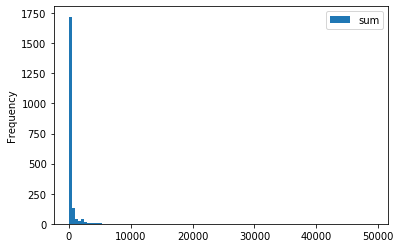

In [225]:
jjj=j_df[j_df["sum"]>4.4]
print(len(jjj))
plt.figure(figsize=(20,6))
jjj.plot(kind="hist", bins=100)
plt.show()

#### course-tfidf

In [129]:
cc=list(course["斷詞_feature"])
vectorizer = TfidfVectorizer()
c_ar = vectorizer.fit_transform(cc)
c_cloumns=vectorizer.get_feature_names()

In [130]:
print(len(c_cloumns))
print(c_ar.shape)

13907
(8647, 13907)


In [131]:
c_df=pd.DataFrame(c_ar.toarray(), columns=c_cloumns)
cs=c_df.sum()
c_df=pd.DataFrame(np.array(cs).reshape(1,13907), columns=c_cloumns, index=["sum"]).T

In [132]:
c_df=c_df.sort_values("sum", ascending=False)
c_df.to_csv("course_word_tfidf.csv", encoding="utf8")

In [142]:
c_df.head(10)

sum
管理  609.905641
專題  596.375857
研究  485.535475
設計  481.108015
實驗  425.478775
實習  324.175120
化學  314.113047
討論  305.085437
概論  281.811072
教育  280.991449

In [219]:
c_df.tail(10)

sum
呼吸法    0.003479
育體     0.003384
大一體    0.003384
靜態展    0.003361
揚琴絲竹樂  0.002916
科藝     0.002908
鋼琴家    0.002908
美聲     0.002908
文武場    0.002240
巴洛克長笛  0.001270

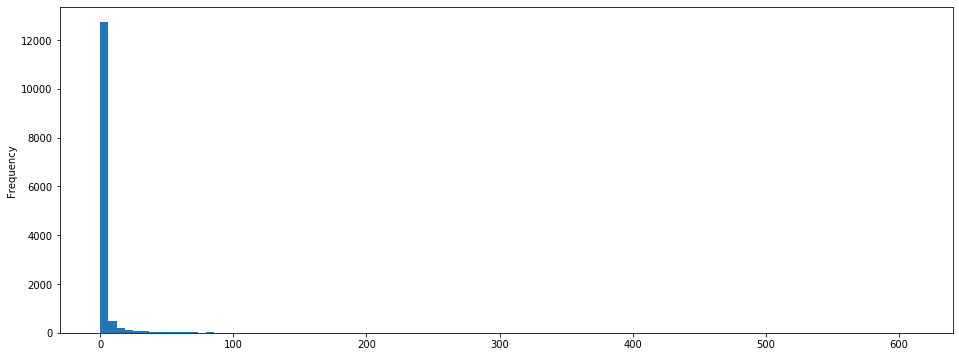

In [146]:
plt.figure(figsize=(16,6))
c_df["sum"].plot(kind="hist", bins=100)

<Figure size 1440x432 with 0 Axes>

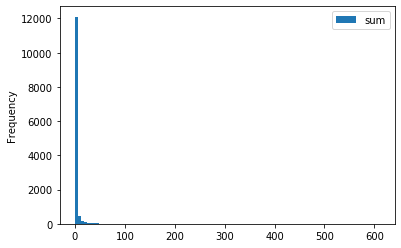

In [166]:
ccc=c_df[c_df["sum"]>0.015]
plt.figure(figsize=(20,6))
ccc.plot(kind="hist", bins=100)
plt.show()

## 歷年各工作關鍵字/重點字_job

In [2]:
job=pd.read_excel("job_info_split.xlsx")
job=job.drop("Unnamed: 0",axis=1)
job.head()

index  yyyymm     jobcat     industry      jobname  \
0    j0  201501    人力資源類人員    機械設備製造修配業         人資專員   
1    j1  201501   操作∕技術類人員          餐飲業  廚師領班(高雄澄清湖)   
2    j2  201501      行銷類人員     軟體及網路相關業       網路行銷主任   
3    j3  201501    製程規劃類人員         半導體業  LED生產工程師/組長   
4    j4  201501  財務∕會計∕稅務類  電腦及消費性電子製造業           會計   

                                          斷詞_feature  
0                           Excel PowerPoint Word 鼎新  
1                                       丙級 中餐 烹調 技術士  
2  行銷 製作物 規劃 與 執行 品牌 行銷 管理 異業 合作 規劃 與 執行 實體 活動 規劃...  
3                Excel PowerPoint Word AutoCAD 國際 認證  
4                    Excel Outlook Word 丙級 會計 事務 技術士

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
df=pd.DataFrame()

ys=list(set(job["yyyymm"]))
for y in ys:
    job2=job[job["yyyymm"]==y]
    jbcts=list(set(job2["jobcat"]))
    for jbct in jbcts:
        job3=job2[job2["jobcat"]==jbct]
        feature=list(job3["斷詞_feature"])
        
        #vectorizer = TfidfVectorizer()
        vectorizer = CountVectorizer()
        f_ar = vectorizer.fit_transform(feature)
        f_columns=vectorizer.get_feature_names()
        print(f_ar.shape)
        fs=np.sum(f_ar.T, axis=1).tolist()
        fs=list(map(lambda x: x[0], fs))   
        
        #dfs=pd.DataFrame({"year":[y]*len(fs),"cate":[jbct]*len(fs),"word":f_columns,"tfidf(sum)":fs})
        dfs=pd.DataFrame({"year":[y]*len(fs),"cate":[jbct]*len(fs),"word":f_columns,"count(sum)":fs})
        #dfs=dfs.sort_values("tfidf(sum)", ascending=False)
        dfs=dfs.sort_values("count(sum)", ascending=False)
        dfs=dfs.iloc[0:100,:]
        dfs["rank"]=list(range(1,101))
        df=pd.concat([df, dfs], axis=0, ignore_index=True)

(974, 546)
(1985, 453)
(1602, 680)
(482, 358)
(1113, 507)
(1025, 561)
(1140, 563)
(4500, 898)
(194, 336)
(429, 323)
(988, 464)
(5901, 901)
(190, 211)
(750, 398)
(281, 247)
(8602, 1019)
(1239, 476)
(615, 232)
(1554, 726)
(401, 277)
(31, 151)
(1084, 763)
(608, 576)
(91, 137)
(1239, 535)
(306, 256)
(353, 281)
(2590, 581)
(2274, 651)
(1815, 753)
(290, 386)
(3302, 636)
(1767, 556)
(2074, 598)
(3318, 452)
(940, 745)
(4231, 795)
(3654, 885)
(1229, 504)
(3133, 599)
(102, 207)
(1640, 293)
(749, 355)
(1427, 791)
(1138, 535)
(2925, 428)
(1572, 653)
(554, 301)
(1350, 487)
(1172, 545)
(1215, 571)
(5264, 902)
(220, 473)
(489, 350)
(1171, 475)
(6963, 894)
(178, 274)
(941, 388)
(321, 204)
(10175, 1004)
(1533, 482)
(750, 233)
(1911, 773)
(405, 367)
(44, 137)
(1541, 827)
(728, 563)
(144, 199)
(1273, 548)
(323, 294)
(334, 284)
(3683, 520)
(2380, 635)
(2021, 762)
(369, 370)
(4157, 639)
(1289, 603)
(5040, 799)
(3786, 428)
(4320, 921)
(1022, 752)
(1629, 526)
(2384, 608)
(4036, 579)
(107, 182)
(2072, 282)
(8

In [32]:
df.head()

year     cate        word  count(sum)  rank
0  201801  生產管理類人員       excel         692     1
1  201801  生產管理類人員          生產         629     2
2  201801  生產管理類人員        word         628     3
3  201801  生產管理類人員  powerpoint         423     4
4  201801  生產管理類人員          管理         401     5

In [33]:
df.to_excel("歷年各工作類別重點字.xlsx")

## 歷年大專院校關鍵/重點字

In [34]:
course=pd.read_excel("course_info_split.xlsx")
course=course.drop("Unnamed: 0",axis=1)
course.head()

index  year  school   department  student_count  graduated_count  \
0    c0   103  國立嘉義大學  微生物免疫與生物藥學系            214               65   
1    c1   104  國立嘉義大學  微生物免疫與生物藥學系            220               52   
2    c2   105  國立嘉義大學  微生物免疫與生物藥學系            217               51   
3    c3   106  國立嘉義大學  微生物免疫與生物藥學系            216               54   
4    c4   107  國立嘉義大學  微生物免疫與生物藥學系            205               47   

                                          斷詞_feature  
0  生物 化學   ( Ⅰ ) 生物 化學 實驗   ( Ⅰ ) 實驗 動物 學 細菌 學 實驗...  
1  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
2  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
3  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
4  細菌 學 分析 化學 生物 化學 實驗   ( Ⅰ ) 細菌 學 實驗 微生物 與 生物 科...

In [36]:
len(set(course["department"]))

1414

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
df=pd.DataFrame()
year=[]
word=[]
tfidf=[]
ys=list(set(course["year"]))
for y in ys:
    print(y)
    course2=course[course["year"]==y]
    schs=list(set(course2["school"]))
    for sch in schs:
        course3=course2[course2["school"]==sch]
        feature=list(course3["斷詞_feature"])
        
        #vectorizer = TfidfVectorizer()
        vectorizer = CountVectorizer()
        f_ar = vectorizer.fit_transform(feature)
        f_columns=vectorizer.get_feature_names()
        #print(f_ar.shape)
        fs=np.sum(f_ar.T, axis=1).tolist()
        fs=list(map(lambda x: x[0], fs))
        
#         dfs=pd.DataFrame({"year":[y]*len(fs), "school":[sch]*len(fs),"word":f_columns,"tfidf(sum)":fs})
#         dfs=dfs.sort_values("tfidf(sum)", ascending=False)
        dfs=pd.DataFrame({"year":[y]*len(fs), "school":[sch]*len(fs),"word":f_columns,"count(sum)":fs})
        dfs=dfs.sort_values("count(sum)", ascending=False)
        dfs=dfs.iloc[0:100,:]
        dfs["rank"]=list(range(1,len(dfs)+1))
        df=pd.concat([df, dfs], axis=0, ignore_index=True)

103
104
105
106
107
108


In [35]:
df["year"]=list(map(lambda x: int(str(x+1911)+"01"), list(df["year"])))

In [36]:
df.tail()

year  school word  count(sum)  rank
37941  201901  國立宜蘭大學   會計          23    96
37942  201901  國立宜蘭大學  生物學          23    97
37943  201901  國立宜蘭大學   法文          23    98
37944  201901  國立宜蘭大學  電磁學          22    99
37945  201901  國立宜蘭大學   工業          22   100

In [37]:
df.to_excel("歷年各學校重點字.xlsx")

## feature table

In [2]:
ft=pd.read_csv("feature_tfidf_table.csv")

In [3]:
print(ft.shape)
# c="c38,c39,c40,c199,c200,c201,c8570,c8571,c8572,c8573,c8574,c8575,c8515,c8516,c8517,c8567,c8568,c8569,c245,c246,c247,c248,c249,c250"
# c=c.split(",")

# ftc=list(map(lambda x: 1 if "j" in x or x in c else 0, list(ft["index"])))
# ft["choiced"]=ftc
# ft2=ft[ft["choiced"]==1]

(208647, 5001)


In [23]:
df=pd.DataFrame()
for i in range(len(ft)):
    ind=ft.iloc[i,0]
    li=ft.iloc[i,1:].T.reset_index(drop=False).sort_values(i,ascending=False)
    li.columns=["word","tfidf"]
    li=li[li["tfidf"]!=0]
    li["index"]=ind
    li["rank"]=list(range(1,len(li)+1))
    df=pd.concat([df, li], axis=0, ignore_index=True)

In [25]:
df.to_csv("feature_tfidf.csv")

In [27]:
cate=list(map(lambda x : "j" if "j" in x else "c",list(df["index"])))

In [30]:
df["cate"]=cate
dfc=df[df["cate"]=="c"]
dfj=df[df["cate"]=="j"]

In [32]:
dfj.to_csv("words_job.csv")

In [33]:
dfc.to_csv("words_course.csv")

## 歷年關鍵字

### job

In [37]:
job=pd.read_excel("job_info_split.xlsx")
job=job.drop("Unnamed: 0",axis=1)

In [38]:
job.head()

index  yyyymm     jobcat     industry      jobname  \
0    j0  201501    人力資源類人員    機械設備製造修配業         人資專員   
1    j1  201501   操作∕技術類人員          餐飲業  廚師領班(高雄澄清湖)   
2    j2  201501      行銷類人員     軟體及網路相關業       網路行銷主任   
3    j3  201501    製程規劃類人員         半導體業  LED生產工程師/組長   
4    j4  201501  財務∕會計∕稅務類  電腦及消費性電子製造業           會計   

                                          斷詞_feature  
0                           Excel PowerPoint Word 鼎新  
1                                       丙級 中餐 烹調 技術士  
2  行銷 製作物 規劃 與 執行 品牌 行銷 管理 異業 合作 規劃 與 執行 實體 活動 規劃...  
3                Excel PowerPoint Word AutoCAD 國際 認證  
4                    Excel Outlook Word 丙級 會計 事務 技術士

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
df=pd.DataFrame()
year=[]
word=[]
tfidf=[]
ys=list(set(job["yyyymm"]))
for y in ys:
    job2=job[job["yyyymm"]==y]
    feature=list(job2["斷詞_feature"])
    vectorizer = CountVectorizer()
    f_ar = vectorizer.fit_transform(feature)
    f_columns=vectorizer.get_feature_names()
    print(f_ar.shape)
    fs=np.sum(f_ar.T, axis=1).tolist()
    fs=list(map(lambda x: x[0], fs))
    dfs=pd.DataFrame({"year":[y]*len(fs),"word":f_columns,"count(sum)":fs})
    dfs=dfs.sort_values("count(sum)", ascending=False)
    dfs=dfs.iloc[0:100,:]
    df=pd.concat([df, dfs], axis=0, ignore_index=True)

(72212, 2529)
(85549, 2554)
(87756, 2602)
(82327, 2551)


In [40]:
df.to_excel("歷年重點字_job.xlsx")

In [13]:
del job

### course

In [14]:
course=pd.read_excel("course_info_split.xlsx")
course=course.drop("Unnamed: 0",axis=1)
course.head()

index  year  school   department  student_count  graduated_count  \
0    c0   103  國立嘉義大學  微生物免疫與生物藥學系            214               65   
1    c1   104  國立嘉義大學  微生物免疫與生物藥學系            220               52   
2    c2   105  國立嘉義大學  微生物免疫與生物藥學系            217               51   
3    c3   106  國立嘉義大學  微生物免疫與生物藥學系            216               54   
4    c4   107  國立嘉義大學  微生物免疫與生物藥學系            205               47   

                                          斷詞_feature  
0  生物 化學   ( Ⅰ ) 生物 化學 實驗   ( Ⅰ ) 實驗 動物 學 細菌 學 實驗...  
1  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
2  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
3  細菌 學 分析 化學 分析 化學 實驗 遺傳 學 生物 化學   ( Ⅰ ) 生物 化學 實...  
4  細菌 學 分析 化學 生物 化學 實驗   ( Ⅰ ) 細菌 學 實驗 微生物 與 生物 科...

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.DataFrame()
year=[]
word=[]
tfidf=[]
ys=list(set(course["year"]))
for y in ys:
    course2=course[course["year"]==y]
    feature=list(course2["斷詞_feature"])
    vectorizer = TfidfVectorizer()
    f_ar = vectorizer.fit_transform(feature)
    f_columns=vectorizer.get_feature_names()
    print(f_ar.shape)
    fs=np.sum(f_ar.T, axis=1).tolist()
    fs=list(map(lambda x: x[0], fs))
    dfs=pd.DataFrame({"year":[y]*len(fs),"word":f_columns,"tfidf(sum)":fs})
    dfs=dfs.sort_values("tfidf(sum)", ascending=False)
    dfs=dfs.iloc[0:100,:]
    df=pd.concat([df, dfs], axis=0, ignore_index=True)

(1118, 8781)
(1099, 8668)
(1110, 8816)
(1851, 10815)
(1555, 10668)
(1914, 11336)


In [46]:
df.head()

year word  tfidf(sum)
0   103   管理   76.657351
1   103   專題   74.481856
2   103   設計   63.951816
3   103   研究   62.690943
4   103   實驗   62.007952

In [47]:
df.to_excel("歷年關鍵字_course.xlsx")

In [19]:
del course

### mix

In [48]:
dfc=pd.read_excel("歷年重點字_course.xlsx")
dfj=pd.read_excel("歷年重點字_job.xlsx")
dfc=dfc.drop("Unnamed: 0", axis=1)
dfj=dfj.drop("Unnamed: 0", axis=1)

In [49]:
dfc["year"]=list(map(lambda x: int(str(x+1911)+"01"), list(dfc["year"])))

In [50]:
dfcx=pd.DataFrame()
yrs=list(set(dfc["year"]))
for yr in yrs:
    dfcs=dfc[dfc["year"]==yr]
    dfcs=dfcs.sort_values("count(sum)",ascending=False)
    dfcs["rank"]=list(range(1,len(dfcs)+1))
    dfcx=pd.concat([dfcx, dfcs], axis=0, ignore_index=True)

In [51]:
dfcx["cate"]="course"

In [52]:
dfcx.head()

year word  count(sum)  rank    cate
0  201601   專題       27202     1  course
1  201601   管理       20467     2  course
2  201601   研究       19759     3  course
3  201601   設計       18482     4  course
4  201601   實習       15441     5  course

In [53]:
dfjx=pd.DataFrame()
yrs=list(set(dfj["year"]))
for yr in yrs:
    dfjs=dfj[dfj["year"]==yr]
    dfjs=dfjs.sort_values("count(sum)",ascending=False)
    dfjs["rank"]=list(range(1,len(dfjs)+1))
    dfjx=pd.concat([dfjx, dfjs], axis=0, ignore_index=True)

In [54]:
dfjx["cate"]="job"

In [55]:
dfjx.tail()

year word  count(sum)  rank cate
395  201501   簡報        1819    96  job
396  201501   財務        1816    97  job
397  201501   ms        1810    98  job
398  201501   需求        1802    99  job
399  201501   基本        1776   100  job

In [56]:
dfmix=pd.concat([dfcx, dfjx], axis=0, ignore_index=True)

In [57]:
dfmix.to_excel("歷年重點字.xlsx")

## method 3_LLR

In [ ]:
with open("各職缺LLR關鍵字.txt", "r", encoding="utf8") as x:
    job_llr=x.read()
job_llr=job_llr.split("\n")

In [ ]:
df=pd.DataFrame()
for li in job_llr:
    a=li.split("\t")[0]
    #print(a)
    b=li.split("\t")[1]
    #print(b)
    dfs=pd.DataFrame({"cate":[a],"content":[b]})
    df=pd.concat([df, dfs], axis=0, ignore_index=True)

In [ ]:
df3=pd.DataFrame()
cate=list(set(df["cate"]))
for ct in cate:
    df2=df[df["cate"]==ct]
    content=" ".join(list(df2["content"]))
    content=content.replace("C+ +", "C++")
    content=content.replace("ISO 9000", "ISO9000")
    content=content.replace("6 Sigma", "6Sigma")
    content=content.replace("Guilds & City", "Guilds&City")
    dfs=pd.DataFrame({"cate":[ct],"content":[content]})
    df3=pd.concat([df3, dfs], axis=0, ignore_index=True)    

In [ ]:
df3.head()

In [ ]:
kw=" ".join(list(df3["content"]))
#print(kw)
kw=kw.split()
print(len(kw))
print(len(set(kw)))

In [ ]:
with open("各學系LLR關鍵字.txt", "r", encoding="utf8") as x:
    course_llr=x.read()
course_llr=course_llr.split("\n")

In [ ]:
df=pd.DataFrame()
for li in course_llr:
    a=li.split("\t")[0]
    #print(a)
    b=li.split("\t")[1]
    #print(b)
    dfs=pd.DataFrame({"cate":[a],"content":[b]})
    df=pd.concat([df, dfs], axis=0, ignore_index=True)

In [ ]:
df4=pd.DataFrame()
cate=list(set(df["cate"]))
for ct in cate:
    df2=df[df["cate"]==ct]
    content=" ".join(list(df2["content"]))
    dfs=pd.DataFrame({"cate":[ct],"content":[content]})
    df4=pd.concat([df4, dfs], axis=0, ignore_index=True)

In [ ]:
df4.head(100)

In [ ]:
kw2=" ".join(list(df4["content"]))
#print(kw)
kw2=kw2.split()
print(len(kw2))
print(len(set(kw2)))
kw_llr=list(set(kw))+list(set(kw2))

In [ ]:
with open("關鍵字C_llr.txt", "w", encoding="utf8") as x:
    x.write(" ".join(kw_llr))